# *Desarrollo notebook 2* 

### Valores missing, outlier y correlaciones

##### En este notebook se realizara el estudio y preprocesamiento de las variables categóricas, continuas y booleanas, de acuerdo con la siguiente estrcutura:

1. Asignación del tipo de variable
    - Conversión de tipo de datos

2. Separación en train y test estratificado
3. Visualización descriptiva de los datos
4. Gráficos de distribución de las variables
5. Tratamiento de variables continuas 
    - Gráfico de correlación
    - Tratamiento de valores nulos
    - Imputar valores nulos
    
6. Tratamiento de variables categóricas y booleanas
    - Tratamiento de valores nulos
    - Imputar valores nulos

### **Importar librerías**

In [6]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import sklearn
from sklearn.impute import KNNImputer
import scipy.stats as ss
import warnings
from sklearn.model_selection import train_test_split

import sys
sys.path.append('/Users/nicolasantondelavilla/Desktop/p1_aautomatico/practica1')
from funciones import funciones_auxiliares as f_aux

semilla = 42

pd.set_option("display.max_rows", 10000)
pd.set_option("display.max_columns", 10000)
pd.set_option("display.width", 10000)

### **Lectura de datos del preprocesado inicial**

In [7]:
df = pd.read_csv('/Users/nicolasantondelavilla/Desktop/data_practica_EDA/pd_data_initial_preprocessing.csv').set_index('SK_ID_CURR')
df

TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI FONDKAPREMONT_MODE  HOUSETYPE_MODE  TOTALAREA_MODE WALLSMATERIAL_MODE  EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  NWEEKDAY_PROCESS_START
SK_ID_CURR                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

## **Asignación de tipo de variable (Categórica, Continua y Booleana)**

#### A continuación, como previamente se había visualizado en el *notebook 1*, se realizará una categorización por cada tipo de variable, introduciendolas a listas, para posteriormente asignar el tipo de estas.

In [8]:
f_aux.clasificar_variables(df)

Variables Booleanas: 36 ['TARGET', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EMERGENCYSTATE_MODE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
Variables Categóricas: 14 ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'OR

(['TARGET',
  'FLAG_OWN_CAR',
  'FLAG_OWN_REALTY',
  'FLAG_MOBIL',
  'FLAG_EMP_PHONE',
  'FLAG_WORK_PHONE',
  'FLAG_CONT_MOBILE',
  'FLAG_PHONE',
  'FLAG_EMAIL',
  'REG_REGION_NOT_LIVE_REGION',
  'REG_REGION_NOT_WORK_REGION',
  'LIVE_REGION_NOT_WORK_REGION',
  'REG_CITY_NOT_LIVE_CITY',
  'REG_CITY_NOT_WORK_CITY',
  'LIVE_CITY_NOT_WORK_CITY',
  'EMERGENCYSTATE_MODE',
  'FLAG_DOCUMENT_2',
  'FLAG_DOCUMENT_3',
  'FLAG_DOCUMENT_4',
  'FLAG_DOCUMENT_5',
  'FLAG_DOCUMENT_6',
  'FLAG_DOCUMENT_7',
  'FLAG_DOCUMENT_8',
  'FLAG_DOCUMENT_9',
  'FLAG_DOCUMENT_10',
  'FLAG_DOCUMENT_11',
  'FLAG_DOCUMENT_12',
  'FLAG_DOCUMENT_13',
  'FLAG_DOCUMENT_14',
  'FLAG_DOCUMENT_15',
  'FLAG_DOCUMENT_16',
  'FLAG_DOCUMENT_17',
  'FLAG_DOCUMENT_18',
  'FLAG_DOCUMENT_19',
  'FLAG_DOCUMENT_20',
  'FLAG_DOCUMENT_21'],
 ['NAME_CONTRACT_TYPE',
  'CODE_GENDER',
  'NAME_TYPE_SUITE',
  'NAME_INCOME_TYPE',
  'NAME_EDUCATION_TYPE',
  'NAME_FAMILY_STATUS',
  'NAME_HOUSING_TYPE',
  'OCCUPATION_TYPE',
  'REGION_RATING_CLIE

In [9]:
f_aux.nueva_clasificar_variables(df)

Variables Booleanas: 36 ['TARGET', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EMERGENCYSTATE_MODE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
Variables Categóricas: 16 ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'OR

(['TARGET',
  'FLAG_OWN_CAR',
  'FLAG_OWN_REALTY',
  'FLAG_MOBIL',
  'FLAG_EMP_PHONE',
  'FLAG_WORK_PHONE',
  'FLAG_CONT_MOBILE',
  'FLAG_PHONE',
  'FLAG_EMAIL',
  'REG_REGION_NOT_LIVE_REGION',
  'REG_REGION_NOT_WORK_REGION',
  'LIVE_REGION_NOT_WORK_REGION',
  'REG_CITY_NOT_LIVE_CITY',
  'REG_CITY_NOT_WORK_CITY',
  'LIVE_CITY_NOT_WORK_CITY',
  'EMERGENCYSTATE_MODE',
  'FLAG_DOCUMENT_2',
  'FLAG_DOCUMENT_3',
  'FLAG_DOCUMENT_4',
  'FLAG_DOCUMENT_5',
  'FLAG_DOCUMENT_6',
  'FLAG_DOCUMENT_7',
  'FLAG_DOCUMENT_8',
  'FLAG_DOCUMENT_9',
  'FLAG_DOCUMENT_10',
  'FLAG_DOCUMENT_11',
  'FLAG_DOCUMENT_12',
  'FLAG_DOCUMENT_13',
  'FLAG_DOCUMENT_14',
  'FLAG_DOCUMENT_15',
  'FLAG_DOCUMENT_16',
  'FLAG_DOCUMENT_17',
  'FLAG_DOCUMENT_18',
  'FLAG_DOCUMENT_19',
  'FLAG_DOCUMENT_20',
  'FLAG_DOCUMENT_21'],
 ['NAME_CONTRACT_TYPE',
  'CODE_GENDER',
  'NAME_TYPE_SUITE',
  'NAME_INCOME_TYPE',
  'NAME_EDUCATION_TYPE',
  'NAME_FAMILY_STATUS',
  'NAME_HOUSING_TYPE',
  'OCCUPATION_TYPE',
  'REGION_RATING_CLIE

In [10]:
lista_var_bool, lista_var_cat, lista_var_con, lista_var_no_clasificadas = f_aux.nueva_clasificar_variables(df)

Variables Booleanas: 36 ['TARGET', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EMERGENCYSTATE_MODE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
Variables Categóricas: 16 ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'OR

## **Conversión de tipo de datos**

In [11]:
df[lista_var_cat] = df[lista_var_cat].astype("category")
df[lista_var_con] = df[lista_var_con].astype(float)
df[lista_var_con] = df[lista_var_con].apply(pd.to_numeric, errors='coerce')
df['TARGET'] = df['TARGET'].astype(int)
df.dtypes

TARGET                             int64
NAME_CONTRACT_TYPE              category
CODE_GENDER                     category
FLAG_OWN_CAR                       int64
FLAG_OWN_REALTY                    int64
CNT_CHILDREN                    category
AMT_INCOME_TOTAL                 float64
AMT_CREDIT                       float64
AMT_ANNUITY                      float64
AMT_GOODS_PRICE                  float64
NAME_TYPE_SUITE                 category
NAME_INCOME_TYPE                category
NAME_EDUCATION_TYPE             category
NAME_FAMILY_STATUS              category
NAME_HOUSING_TYPE               category
REGION_POPULATION_RELATIVE       float64
DAYS_BIRTH                       float64
DAYS_EMPLOYED                    float64
DAYS_REGISTRATION                float64
DAYS_ID_PUBLISH                  float64
OWN_CAR_AGE                      float64
FLAG_MOBIL                         int64
FLAG_EMP_PHONE                     int64
FLAG_WORK_PHONE                    int64
FLAG_CONT_MOBILE

## **Separación en train y test estratificado**

#### El propósito de este paso, es asegurar que las proporciones se mantengan equilibradas entre el conjunto de entrenamiento y el de prueba. Debido a que con esto se genera una mejor representatividad de los datos, permitiendo una evaluación más precisa del modelo.

In [12]:
X = df.drop('TARGET', axis=1)  # Eliminar la columna 'TARGET' del conjunto de características
y = df['TARGET']               # Guardar la columna 'TARGET' como variable objetivo

In [13]:
X_pd_loan, X_pd_loan_test, y_pd_loan, y_pd_loan_test = train_test_split(X, y, 
                                                                     stratify=df['TARGET'], 
                                                                     test_size=0.2, random_state = semilla)
df_train = pd.concat([X_pd_loan, y_pd_loan],axis=1)
df_test = pd.concat([X_pd_loan_test, y_pd_loan_test],axis=1)

print('== Train\n', df_train['TARGET'].value_counts(normalize=True))
print('== Test\n', df_test['TARGET'].value_counts(normalize=True))

== Train
 TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64
== Test
 TARGET
0    0.919272
1    0.080728
Name: proportion, dtype: float64


#### En esta sección, se utiliza una **semilla** definida al inicio del notebook para garantizar la reproducibilidad y consistencia en el proceso de división de los datos en conjuntos de entrenamiento y prueba. Esto asegura que los resultados obtenidos sean replicables en futuras ejecuciones del mismo código."

## **Visualización descriptiva de los datos**


#### Por medio de las funciones nulos_columna( ) y nulos_filas( ), podemos analizar la consistencia de los datos, al identificar la cantidad de valores nulos por variable. Lo cual nos permite evaluar qué variables podrían aportar más al modelo y cuáles podrían tener un impacto limitado debido a su alto porcentaje de valores nulos.

In [14]:
f_aux.nulos_columna(df)

nulos_columnas  porcentaje_columnas
COMMONAREA_AVG                        214865            69.872297
COMMONAREA_MEDI                       214865            69.872297
COMMONAREA_MODE                       214865            69.872297
NONLIVINGAPARTMENTS_AVG               213514            69.432963
NONLIVINGAPARTMENTS_MEDI              213514            69.432963
NONLIVINGAPARTMENTS_MODE              213514            69.432963
LIVINGAPARTMENTS_AVG                  210199            68.354953
LIVINGAPARTMENTS_MEDI                 210199            68.354953
LIVINGAPARTMENTS_MODE                 210199            68.354953
FLOORSMIN_MODE                        208642            67.848630
FLOORSMIN_MEDI                        208642            67.848630
FLOORSMIN_AVG                         208642            67.848630
YEARS_BUILD_AVG                       204488            66.497784
YEARS_BUILD_MEDI                      204488            66.497784
YEARS_BUILD_MODE                      204488            66.497784
OWN_CAR_AGE                           202929            65.990810
LANDAREA_MEDI                         182590            59.376738
LANDAREA_MODE                         182590            59.376738
LANDAREA_AVG                          182590            59.376738
BASEMENTAREA_MODE                     179943            58.515956
BASEMENTAREA_MEDI                     179943            58.515956
BASEMENTAREA_AVG                      179943            58.515956
EXT_SOURCE_1                          173378            56.381073
NONLIVINGAREA_AVG                     169682            55.179164
NONLIVINGAREA_MODE                    169682            55.179164
NONLIVINGAREA_MEDI                    169682            55.179164
ELEVATORS_AVG                         163891            53.295980
ELEVATORS_MEDI                        163891            53.295980
ELEVATORS_MODE                        163891            53.295980
APARTMENTS_AVG                        156061            50.749729
APARTMENTS_MEDI                       156061            50.749729
APARTMENTS_MODE                       156061            50.749729
ENTRANCES_AVG                         154828            50.348768
ENTRANCES_MEDI                        154828            50.348768
ENTRANCES_MODE                        154828            50.348768
LIVINGAREA_MEDI                       154350            50.193326
LIVINGAREA_MODE                       154350            50.193326
LIVINGAREA_AVG                        154350            50.193326
FLOORSMAX_MODE                        153020            49.760822
FLOORSMAX_AVG                         153020            49.760822
FLOORSMAX_MEDI                        153020            49.760822
YEARS_BEGINEXPLUATATION_MODE          150007            48.781019
YEARS_BEGINEXPLUATATION_MEDI          150007            48.781019
YEARS_BEGINEXPLUATATION_AVG           150007            48.781019
TOTALAREA_MODE                        148431            48.268517
EXT_SOURCE_3                           60965            19.825307
AMT_REQ_CREDIT_BUREAU_QRT              41519            13.501631
AMT_REQ_CREDIT_BUREAU_HOUR             41519            13.501631
AMT_REQ_CREDIT_BUREAU_DAY              41519            13.501631
AMT_REQ_CREDIT_BUREAU_YEAR             41519            13.501631
AMT_REQ_CREDIT_BUREAU_WEEK             41519            13.501631
AMT_REQ_CREDIT_BUREAU_MON              41519            13.501631
OBS_30_CNT_SOCIAL_CIRCLE                1021             0.332021
DEF_30_CNT_SOCIAL_CIRCLE                1021             0.332021
OBS_60_CNT_SOCIAL_CIRCLE                1021             0.332021
DEF_60_CNT_SOCIAL_CIRCLE                1021             0.332021
EXT_SOURCE_2                             660             0.214626
AMT_GOODS_PRICE                          278             0.090403
AMT_ANNUITY                               12             0.003902
CNT_FAM_MEMBERS                            2             0.000650
DAYS

In [15]:
f_aux.nulos_filas(df)

nulos_filas  porcentaje_filas
SK_ID_CURR                               
233761               56           0.46281
235599               56           0.46281
201436               56           0.46281
248389               56           0.46281
315294               56           0.46281
...                 ...               ...
337971                0           0.00000
456195                0           0.00000
273009                0           0.00000
235635                0           0.00000
235631                0           0.00000

[307511 rows x 2 columns]

## **Gráficos con distribibución de las variables**

#### En la siguiente línea de código, se utiliza un bucle que itera sobre el tipo de variable. Dependiendo de si la variable es continua o categórica/booleana, se llama a la función plot_feature( ). Si la variable es continua, se generara un histograma y un boxplot en relación con la variable objetivo. Si la varaible es categórica o booleana, se mostrarán dos diagramas de barras: uno para la distribución general de la variable y otro en relación con la variable objetivo.

Graficos de la variable: NAME_CONTRACT_TYPE


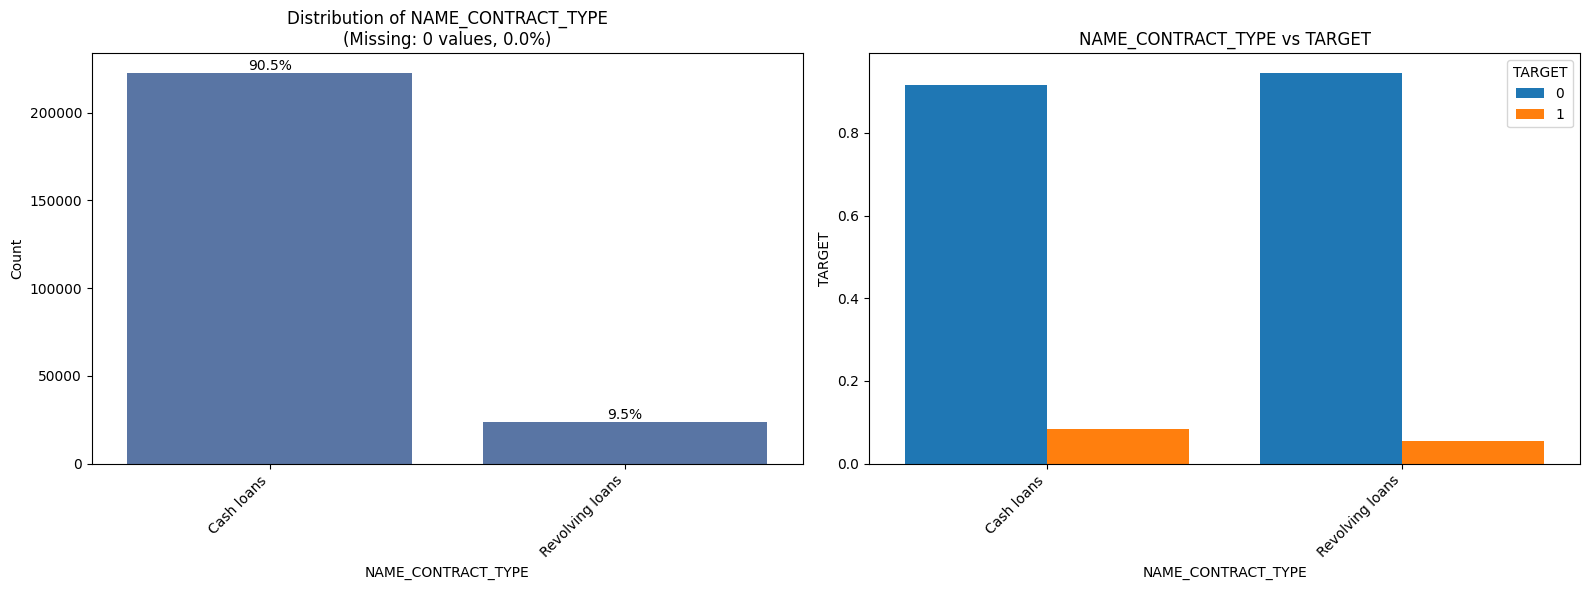

Graficos de la variable: CODE_GENDER


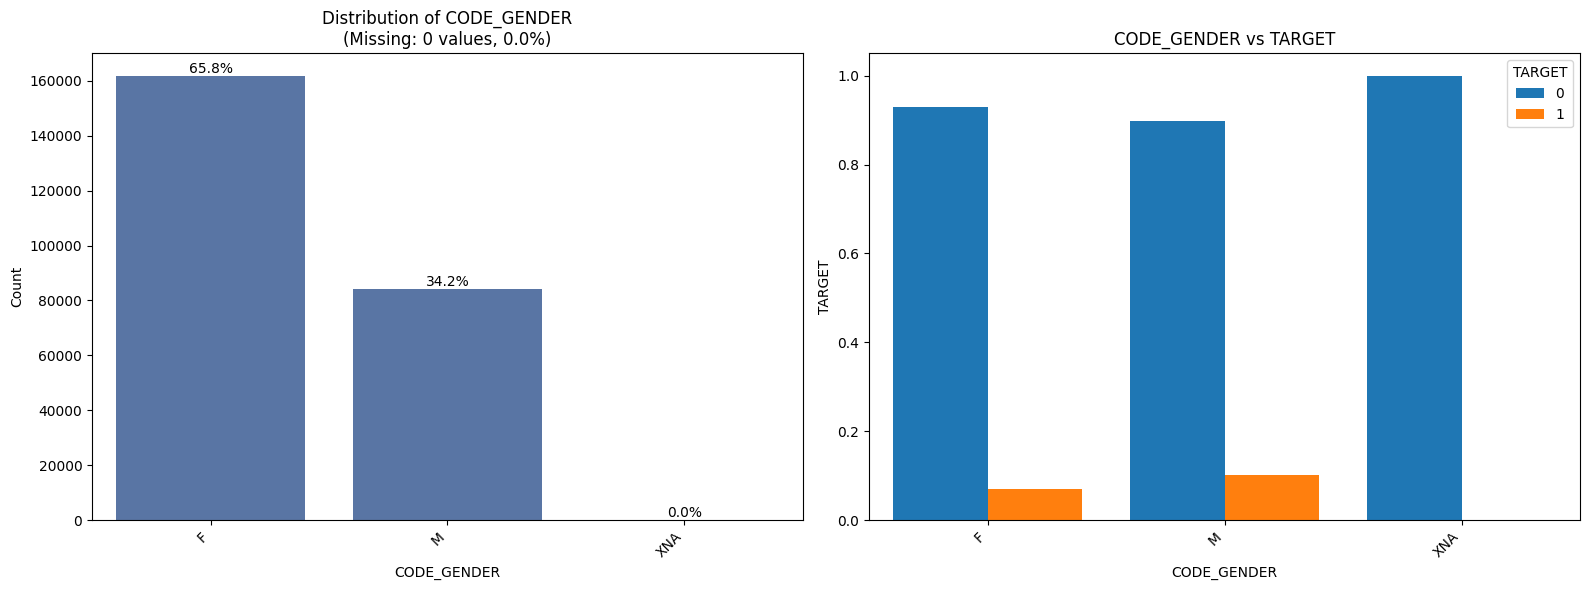

Graficos de la variable: FLAG_OWN_CAR


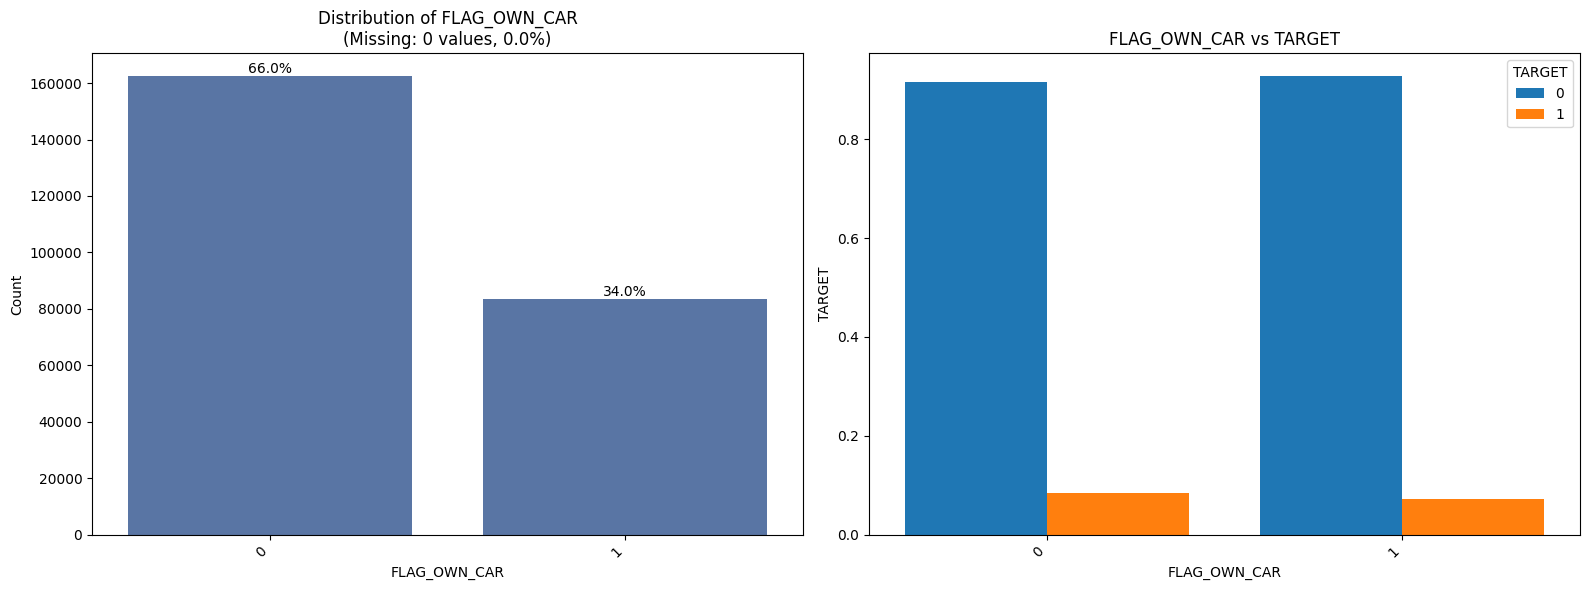

Graficos de la variable: FLAG_OWN_REALTY


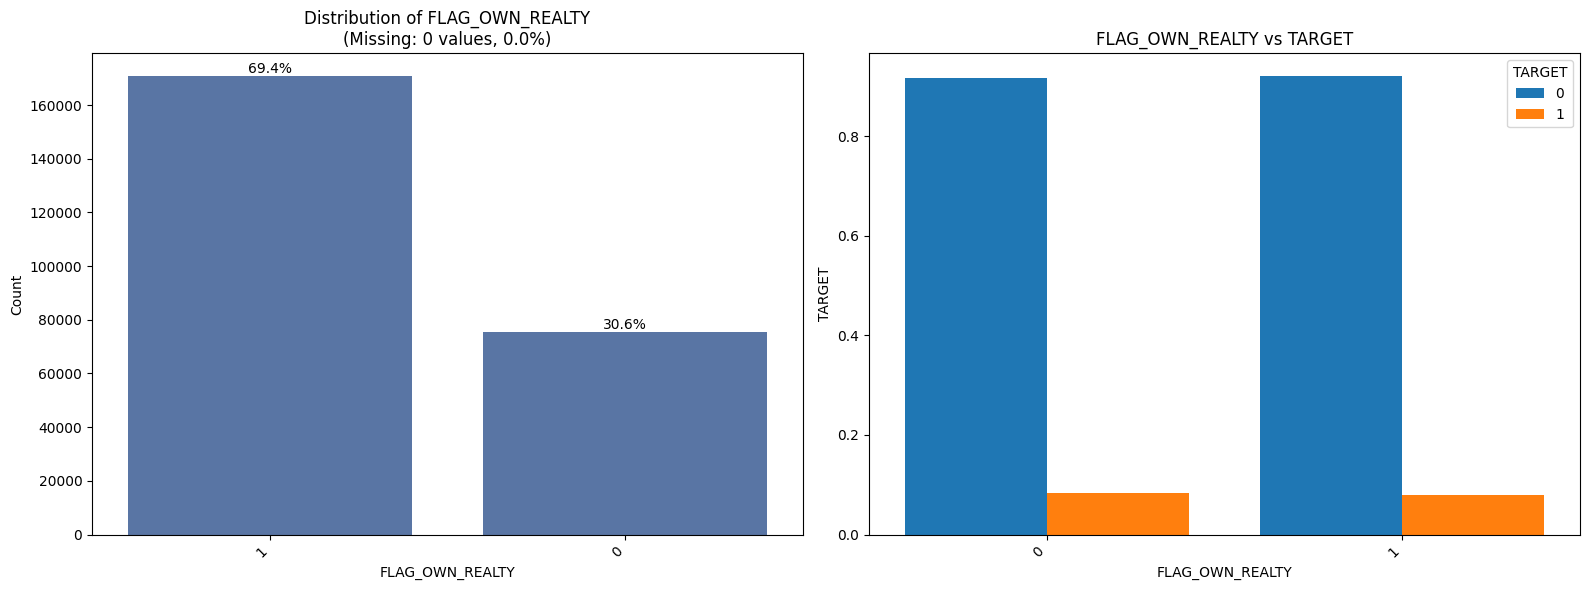

Graficos de la variable: CNT_CHILDREN


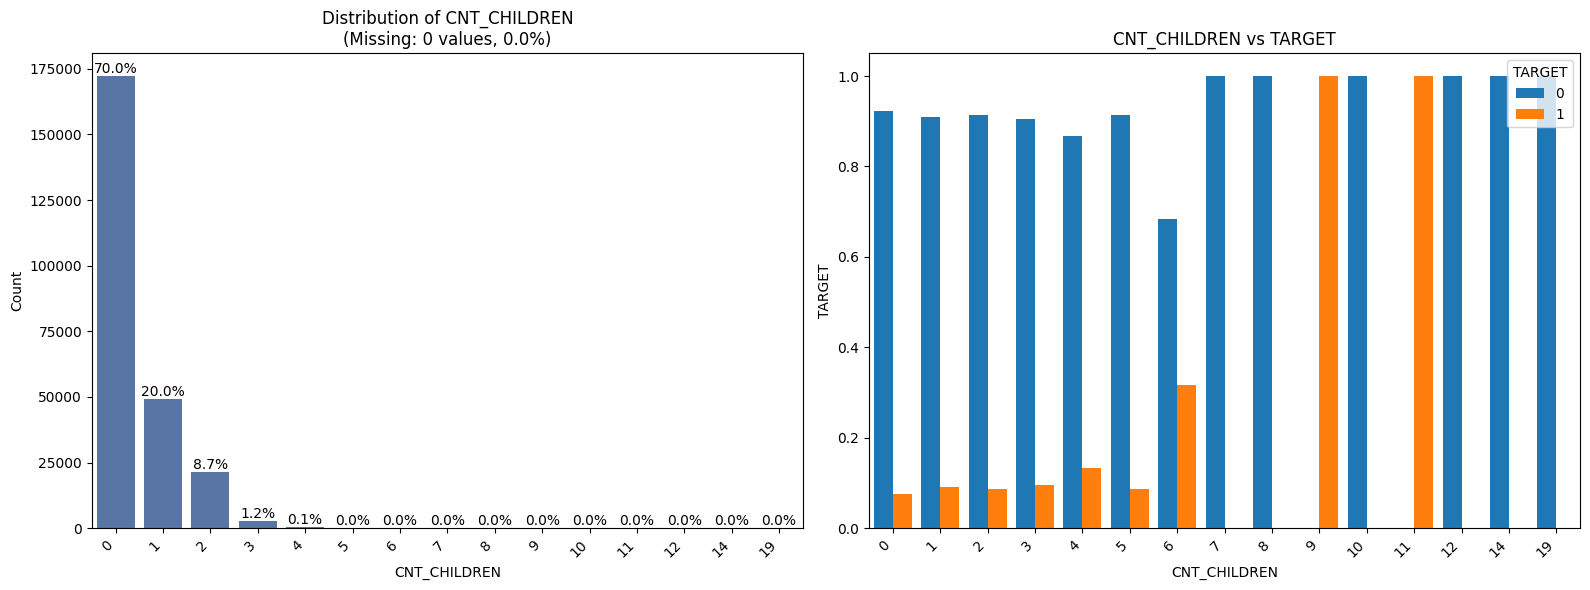

Graficos de la variable: AMT_INCOME_TOTAL


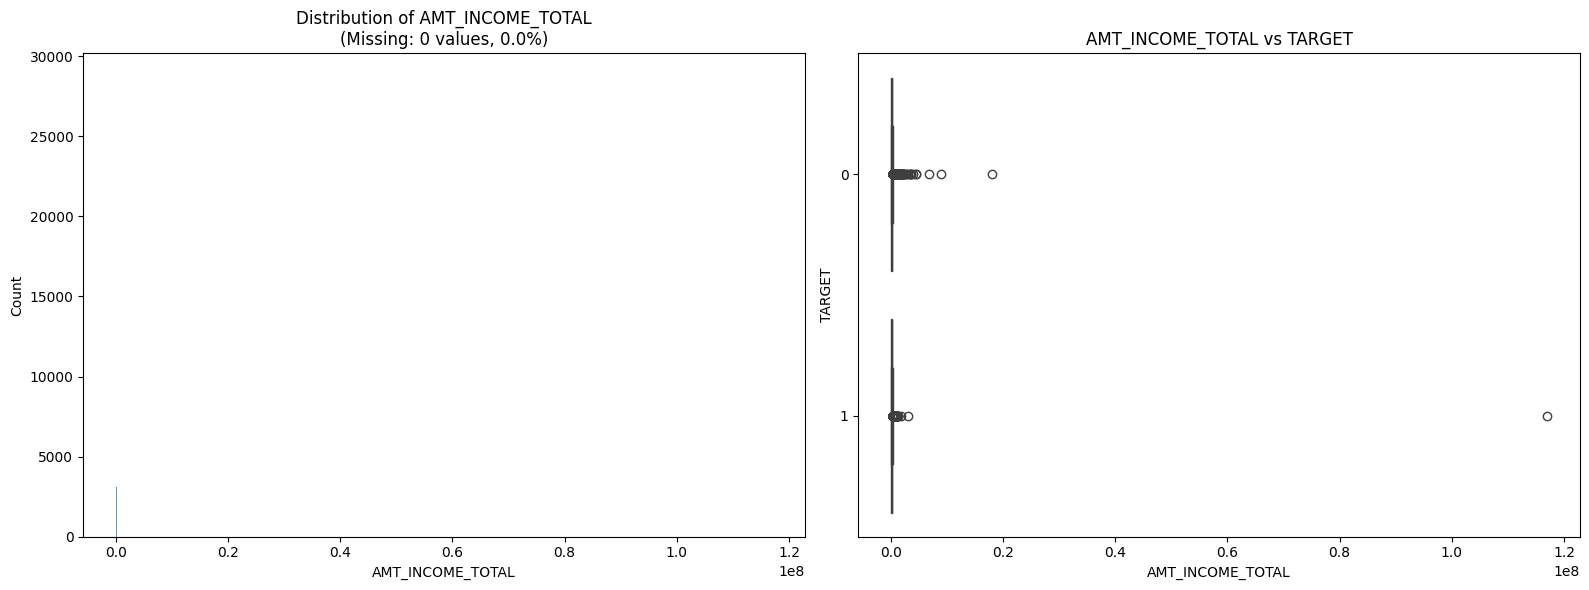

Graficos de la variable: AMT_CREDIT


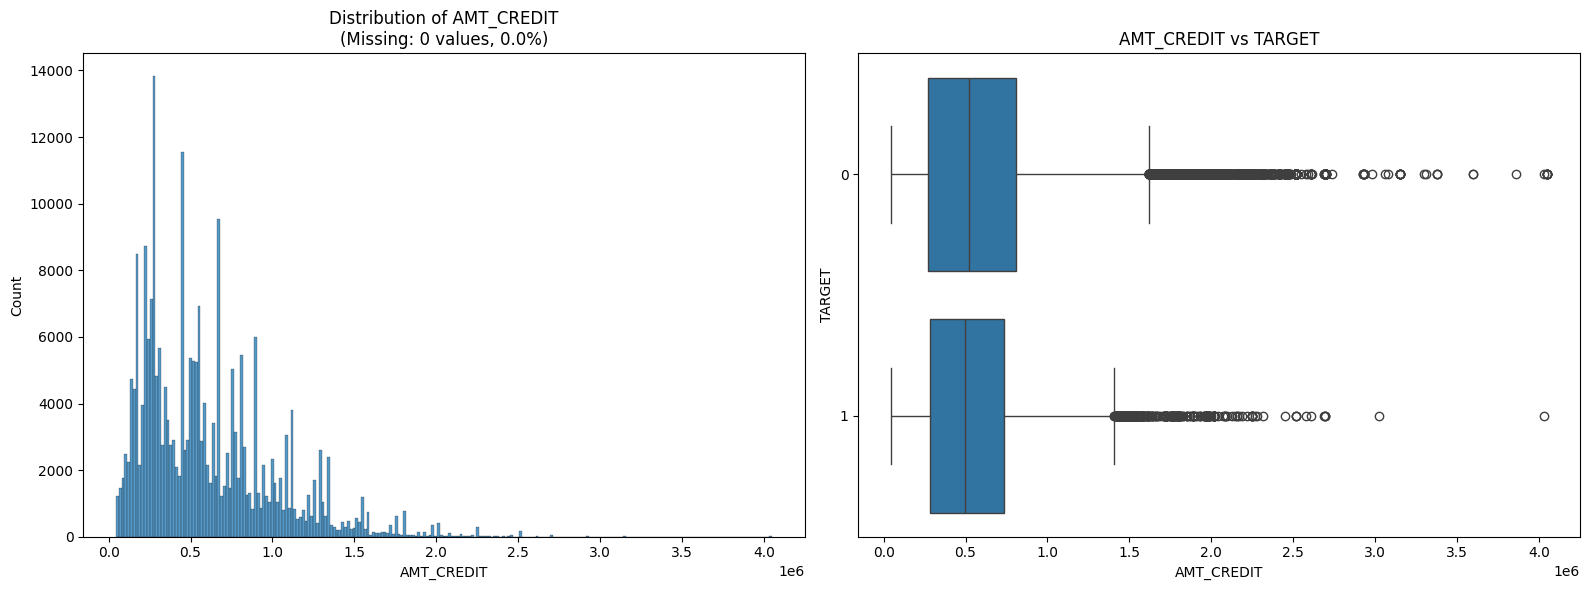

Graficos de la variable: AMT_ANNUITY


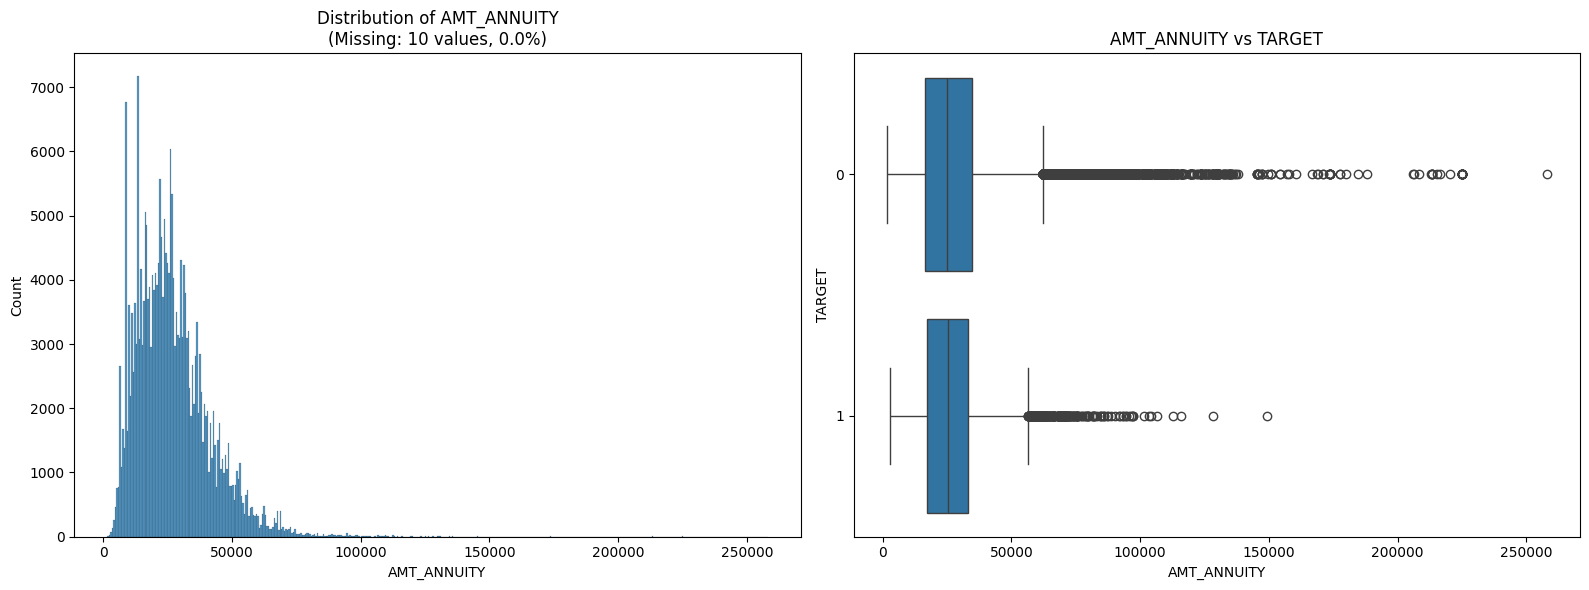

Graficos de la variable: AMT_GOODS_PRICE


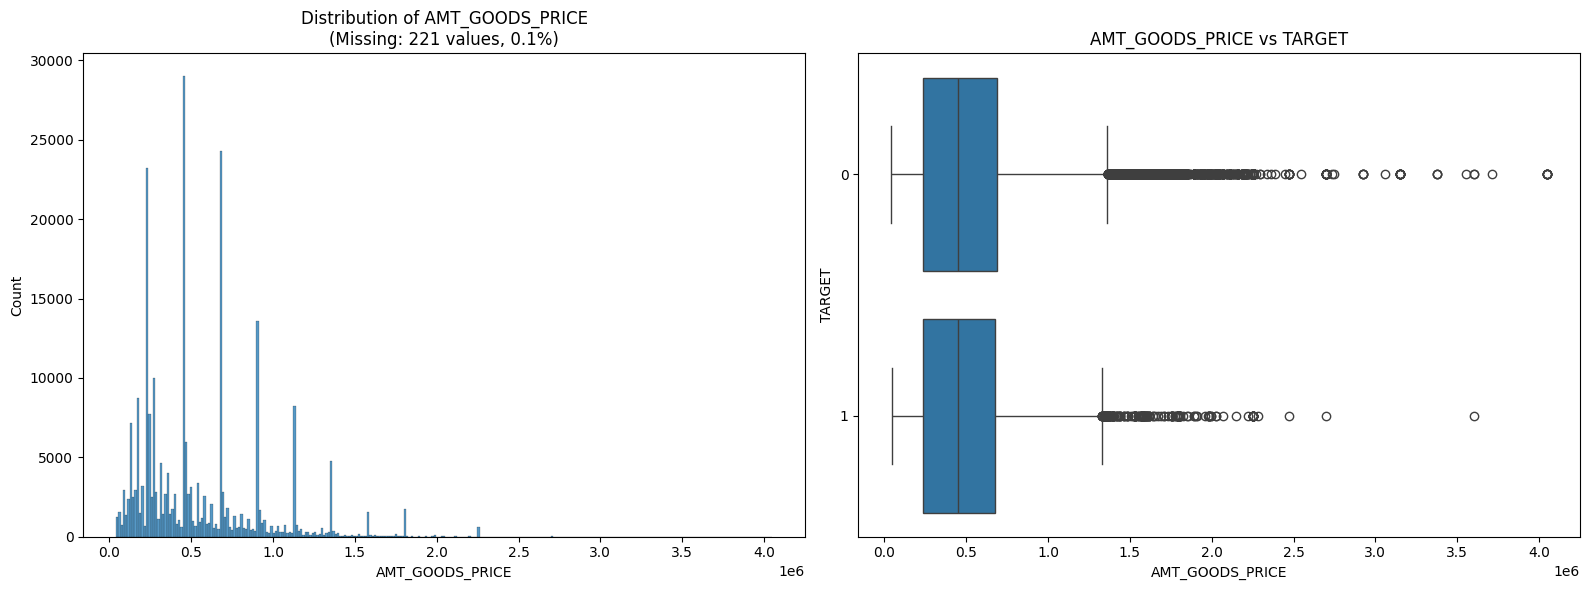

Graficos de la variable: NAME_TYPE_SUITE


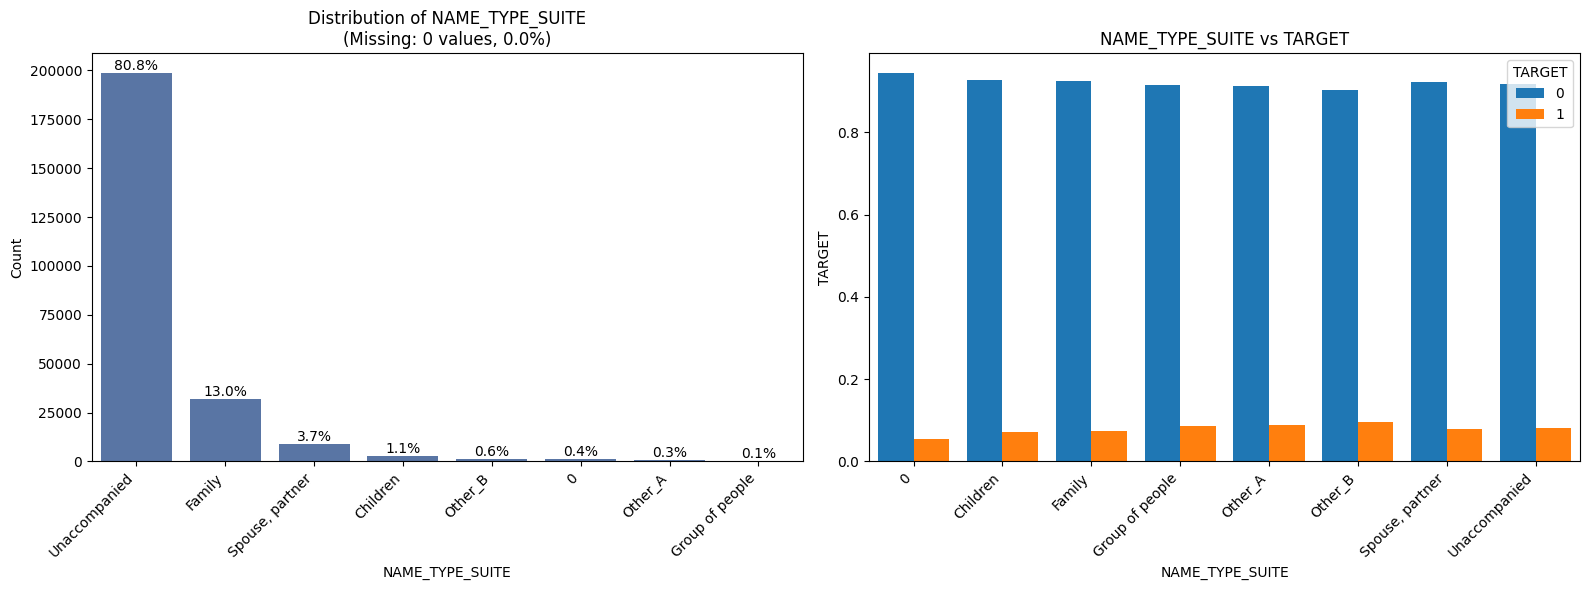

Graficos de la variable: NAME_INCOME_TYPE


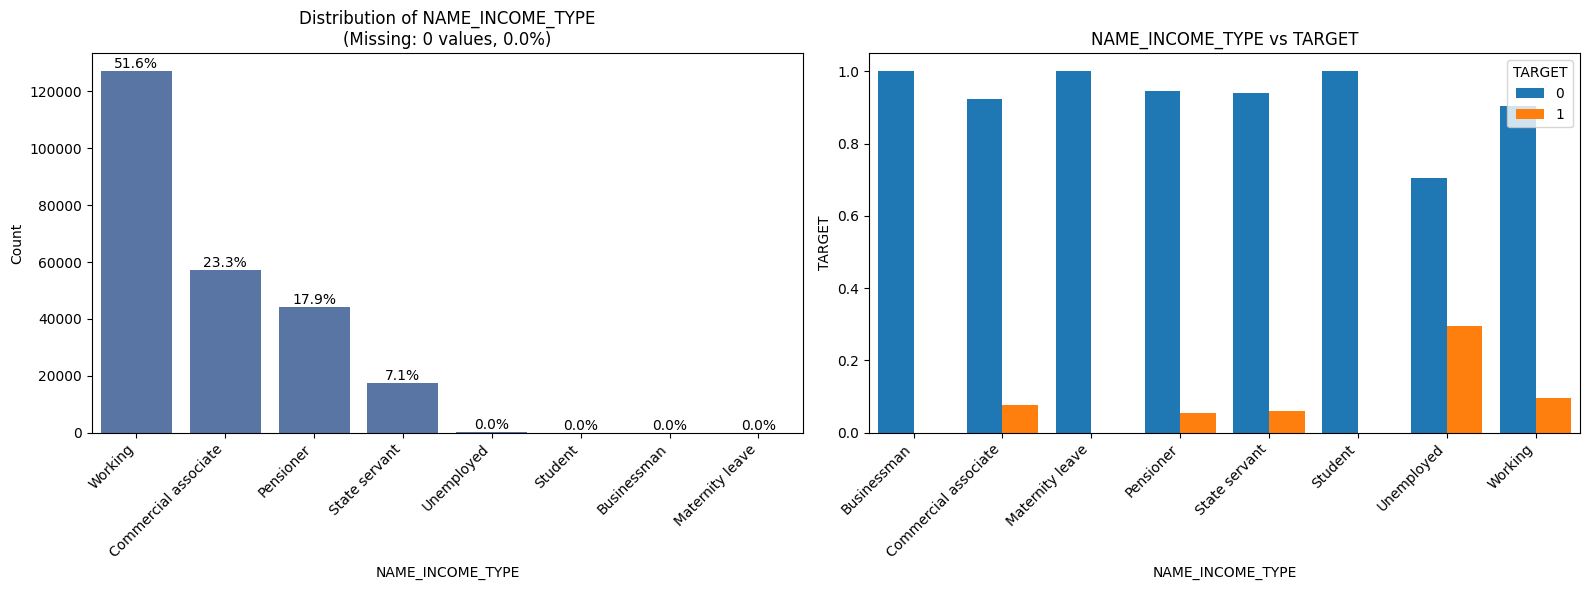

Graficos de la variable: NAME_EDUCATION_TYPE


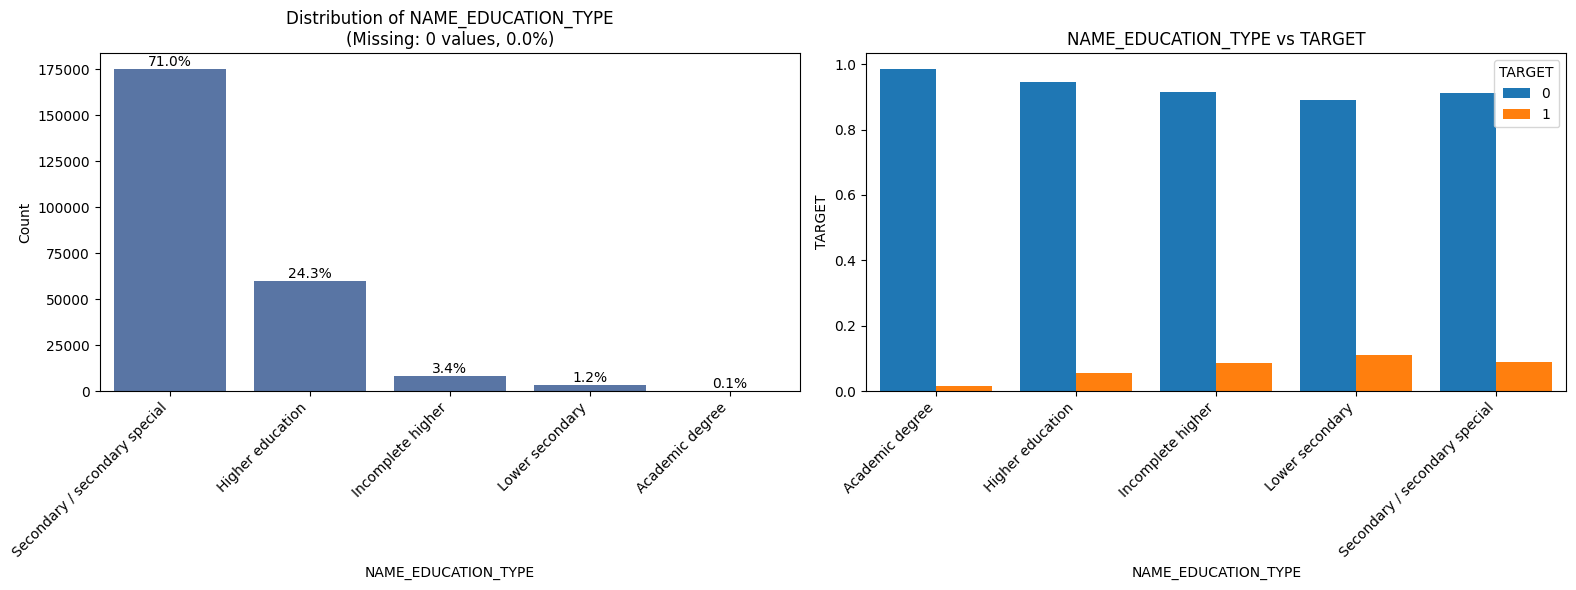

Graficos de la variable: NAME_FAMILY_STATUS


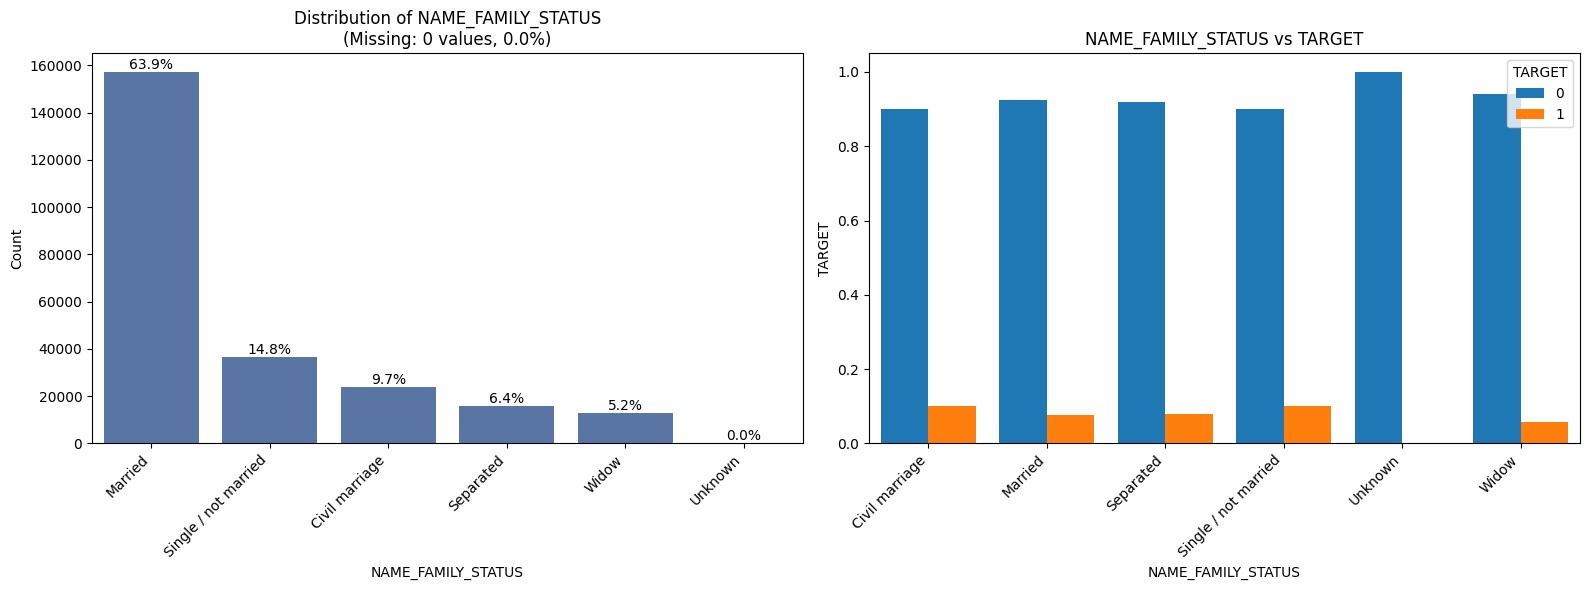

Graficos de la variable: NAME_HOUSING_TYPE


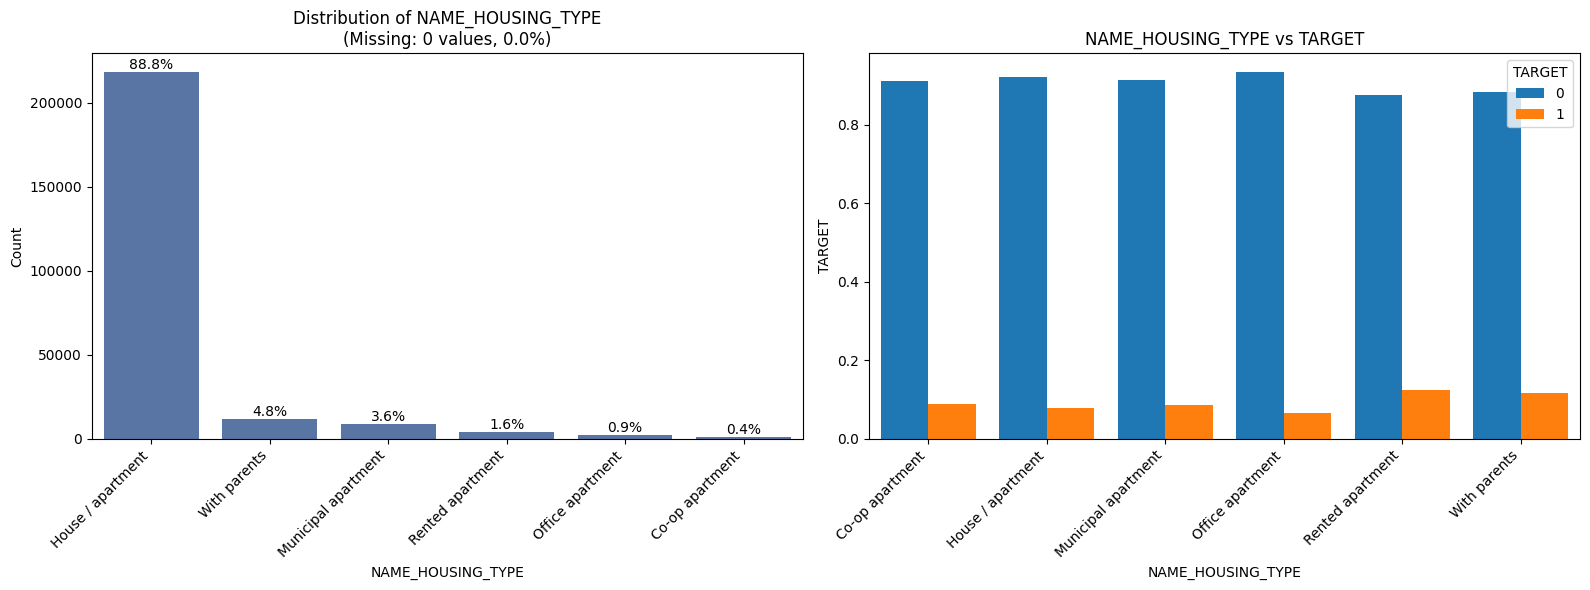

Graficos de la variable: REGION_POPULATION_RELATIVE


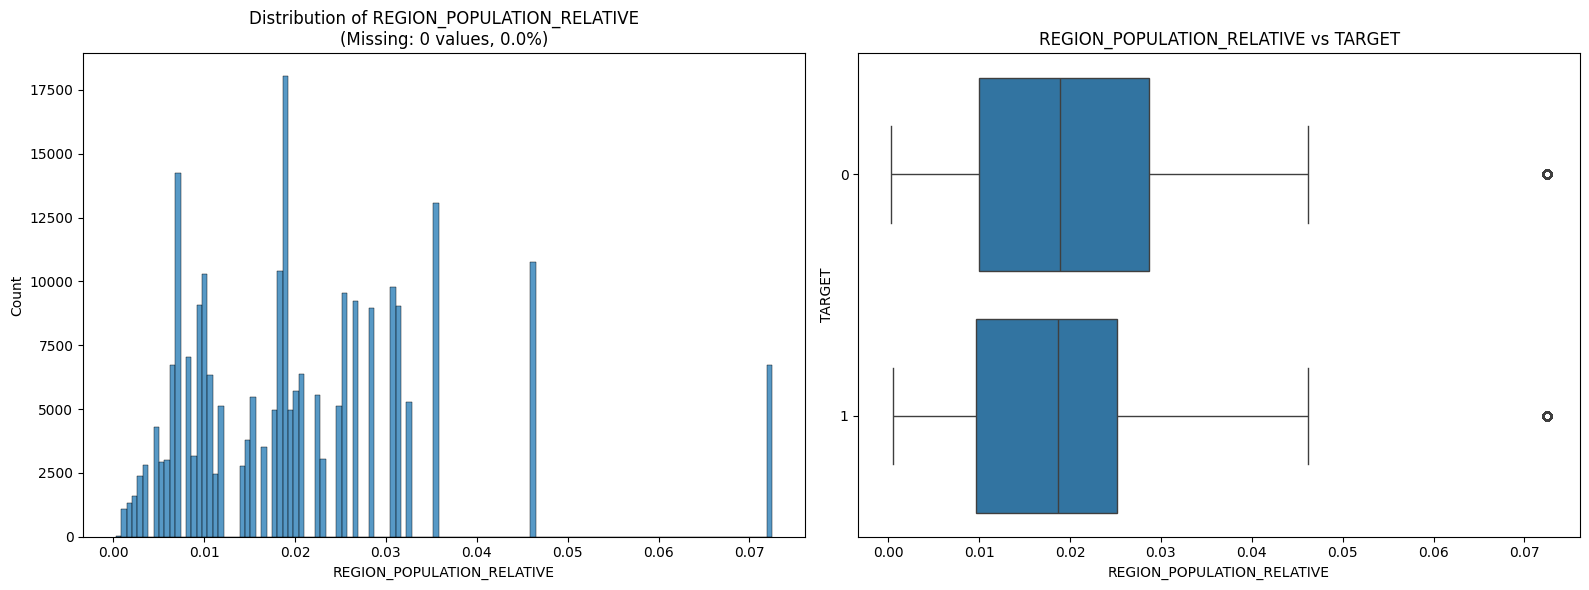

Graficos de la variable: DAYS_BIRTH


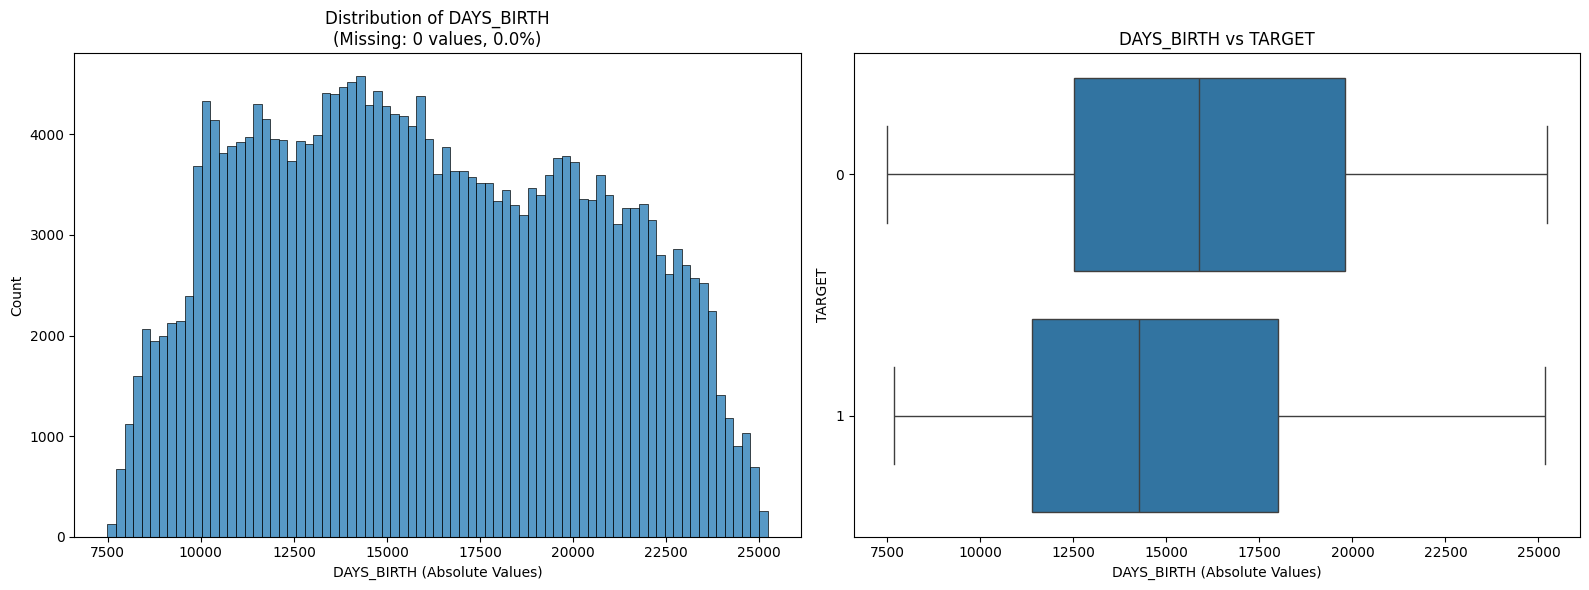

Graficos de la variable: DAYS_EMPLOYED


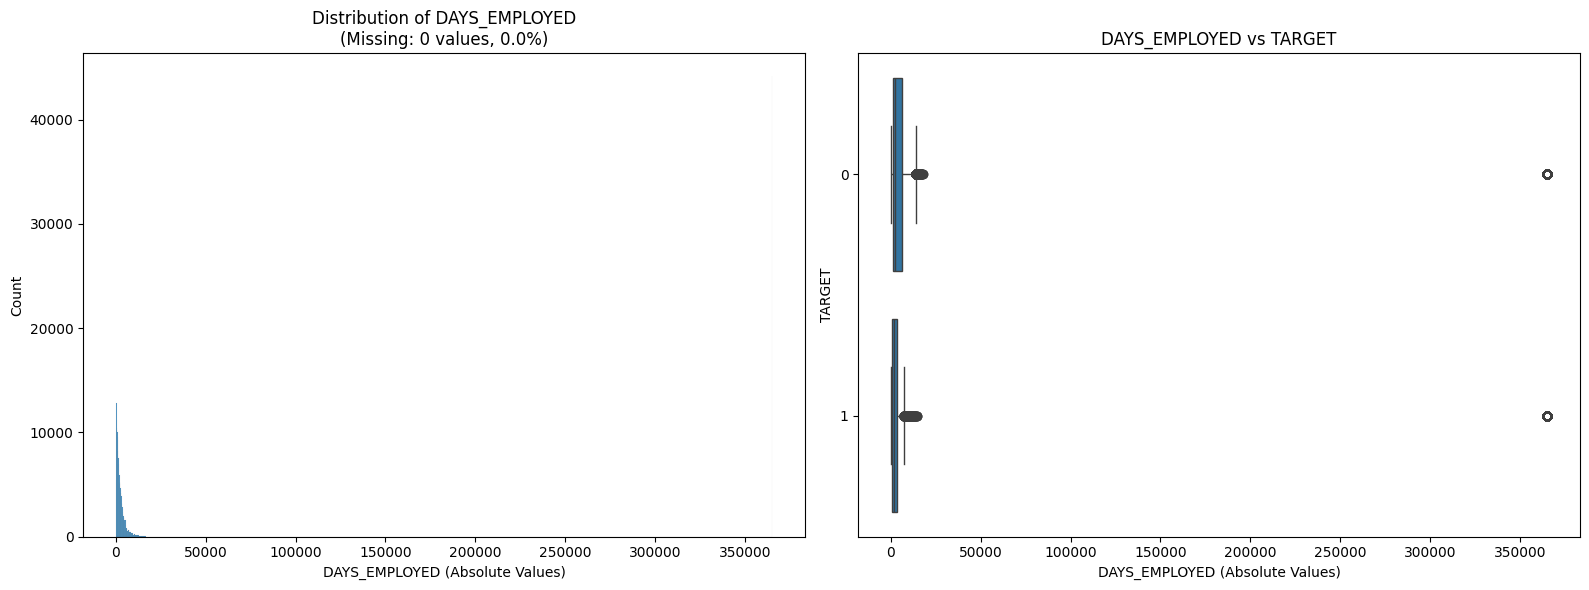

Graficos de la variable: DAYS_REGISTRATION


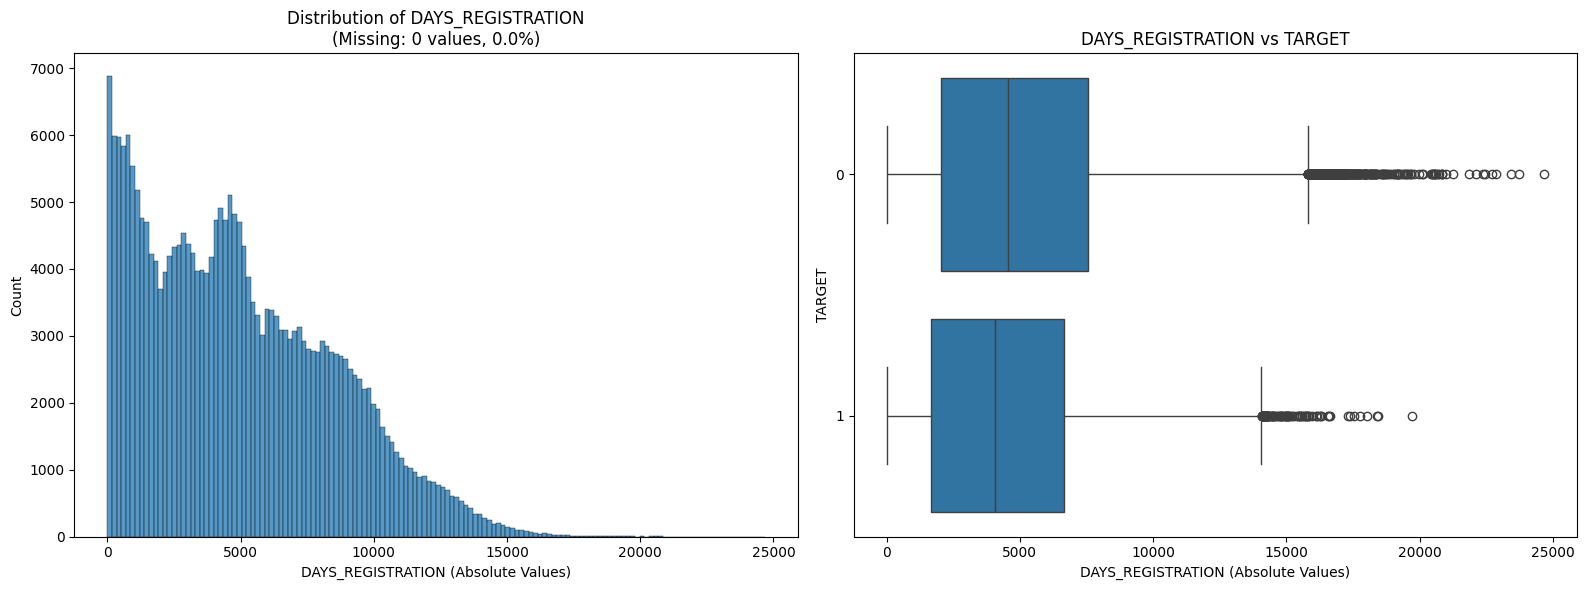

Graficos de la variable: DAYS_ID_PUBLISH


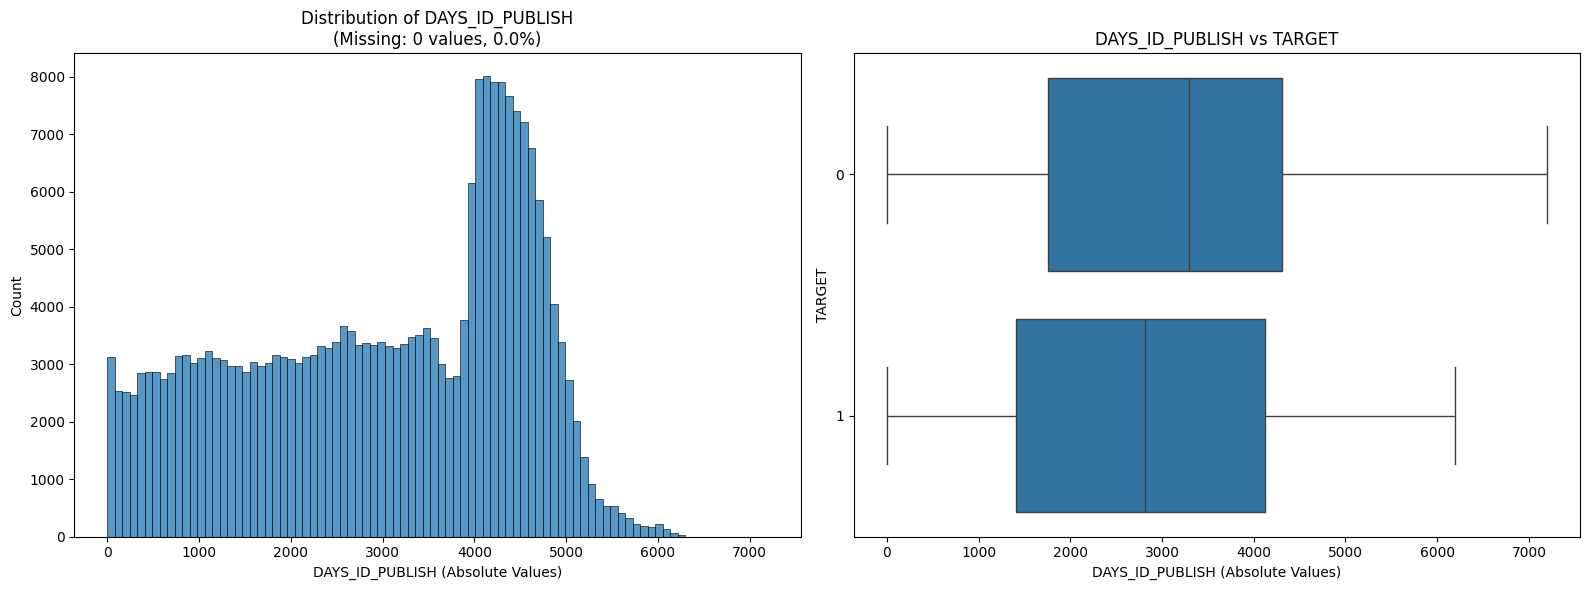

Graficos de la variable: OWN_CAR_AGE


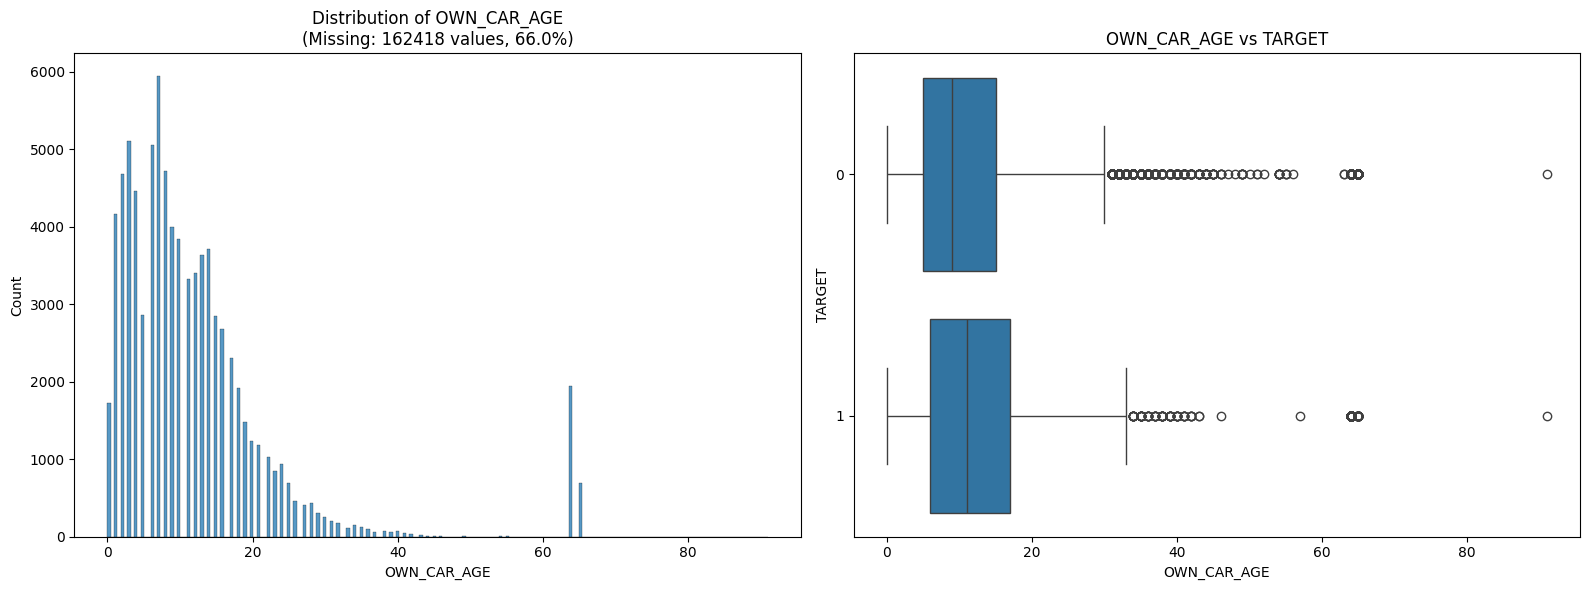

Graficos de la variable: FLAG_MOBIL


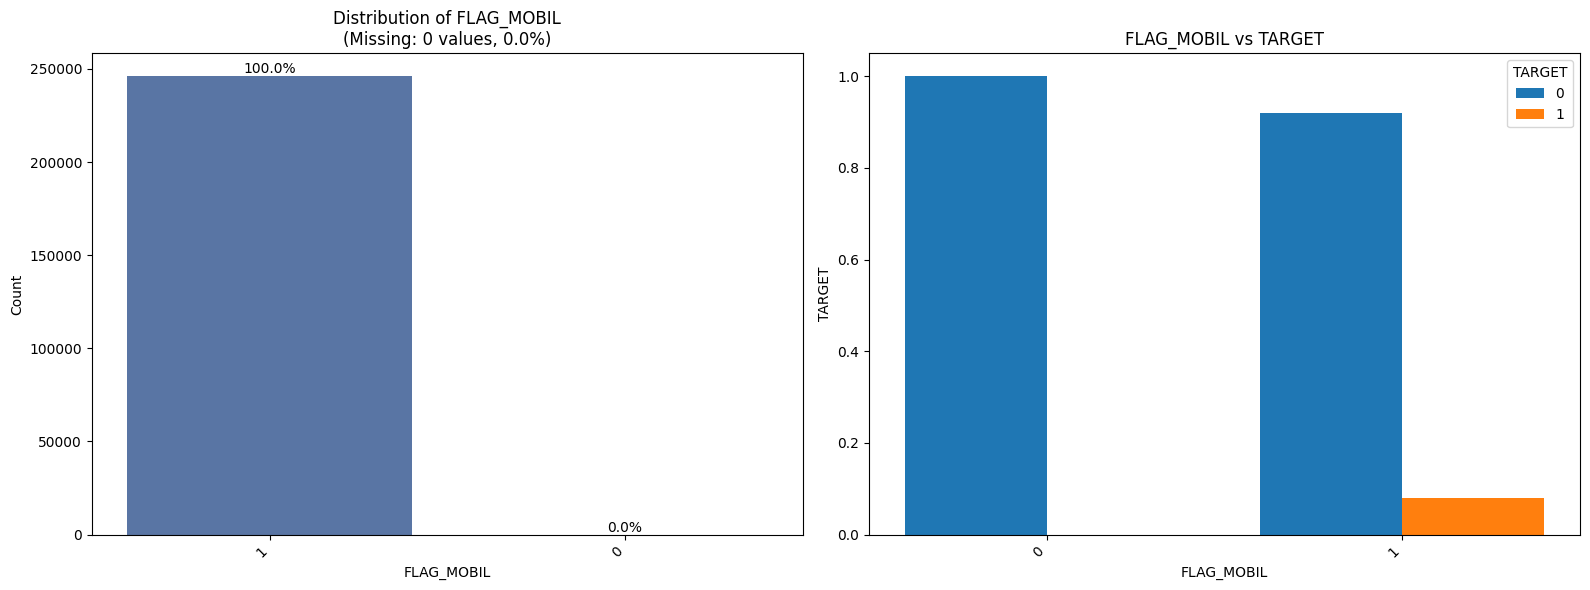

Graficos de la variable: FLAG_EMP_PHONE


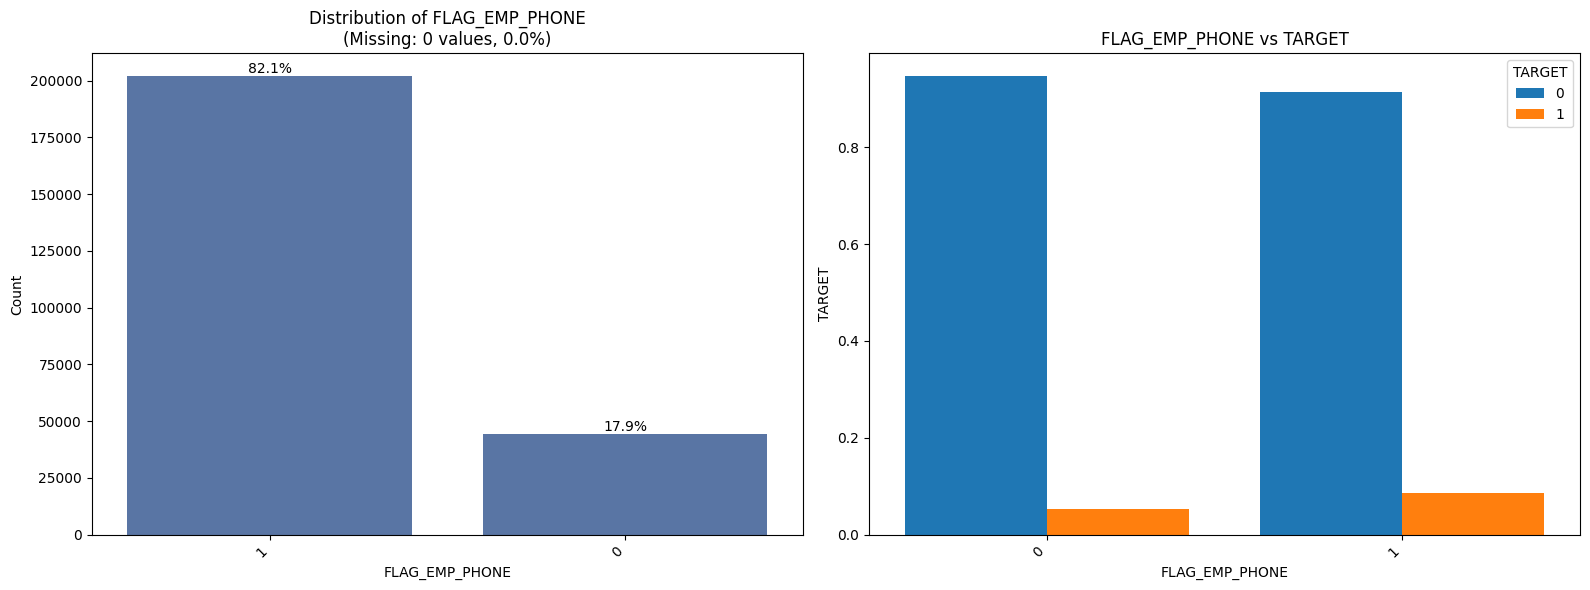

Graficos de la variable: FLAG_WORK_PHONE


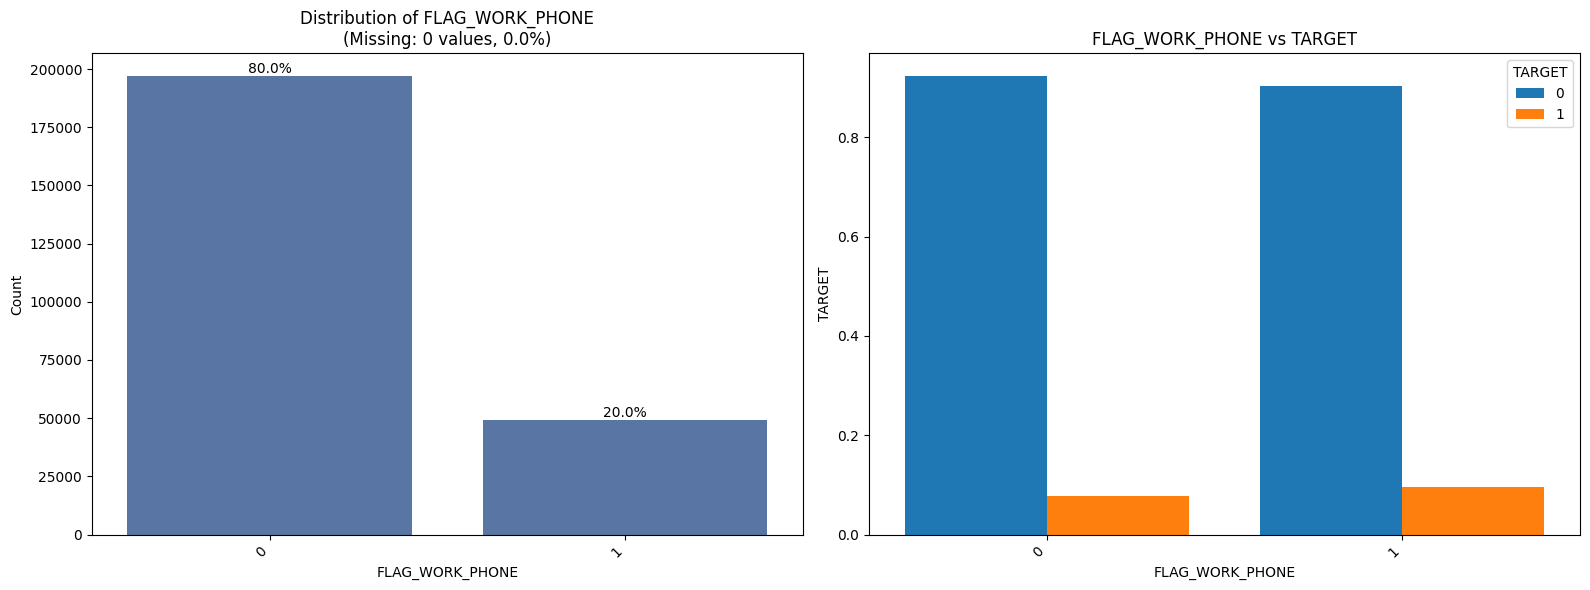

Graficos de la variable: FLAG_CONT_MOBILE


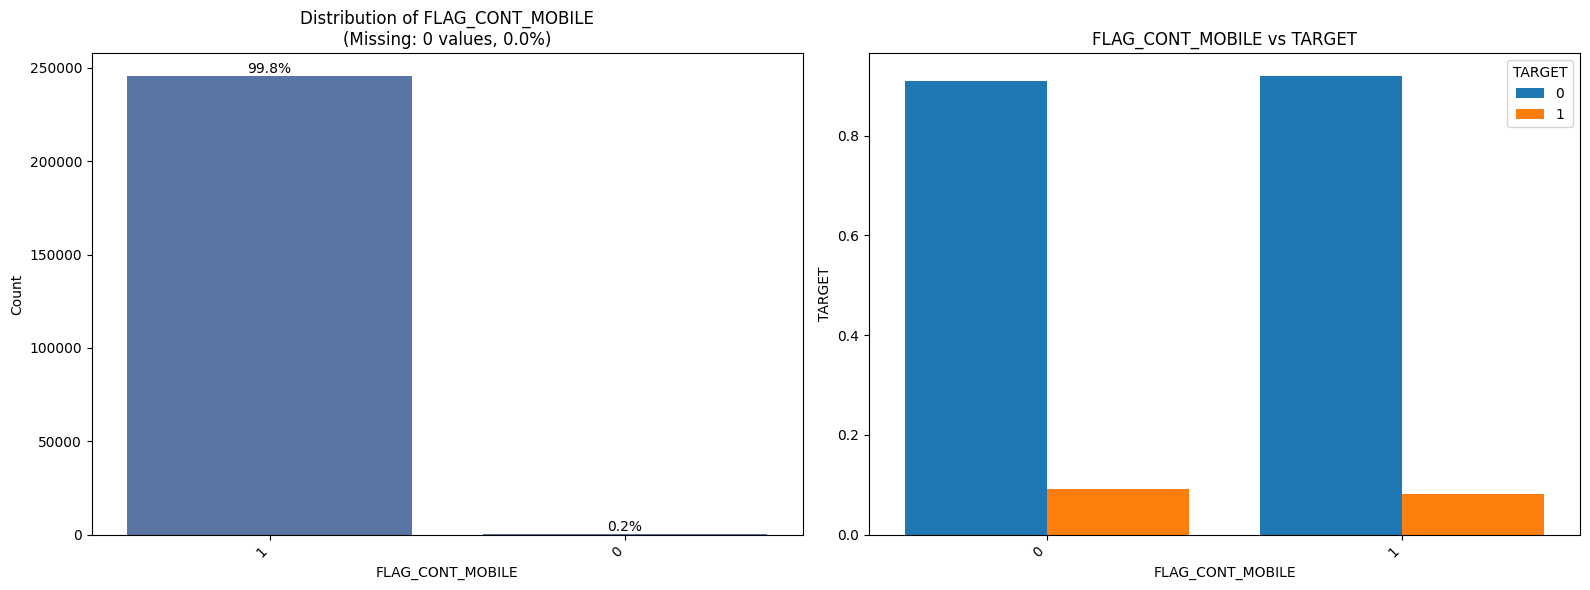

Graficos de la variable: FLAG_PHONE


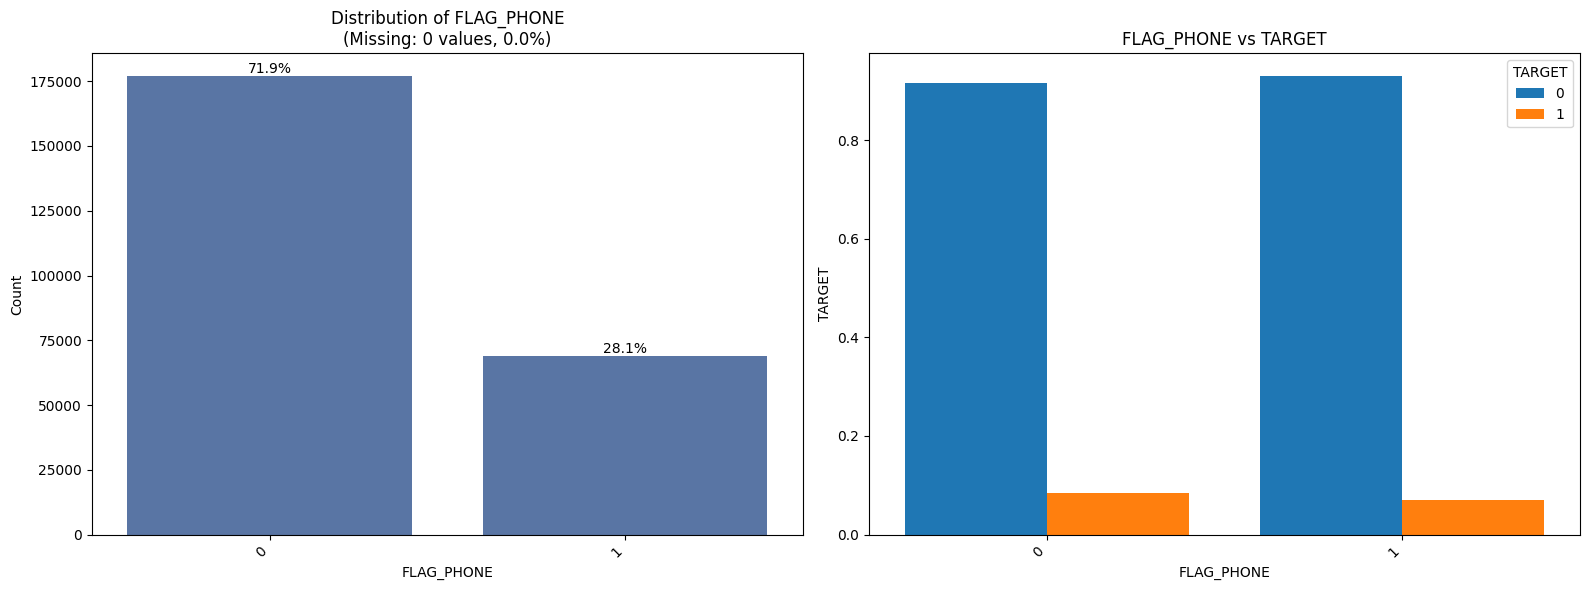

Graficos de la variable: FLAG_EMAIL


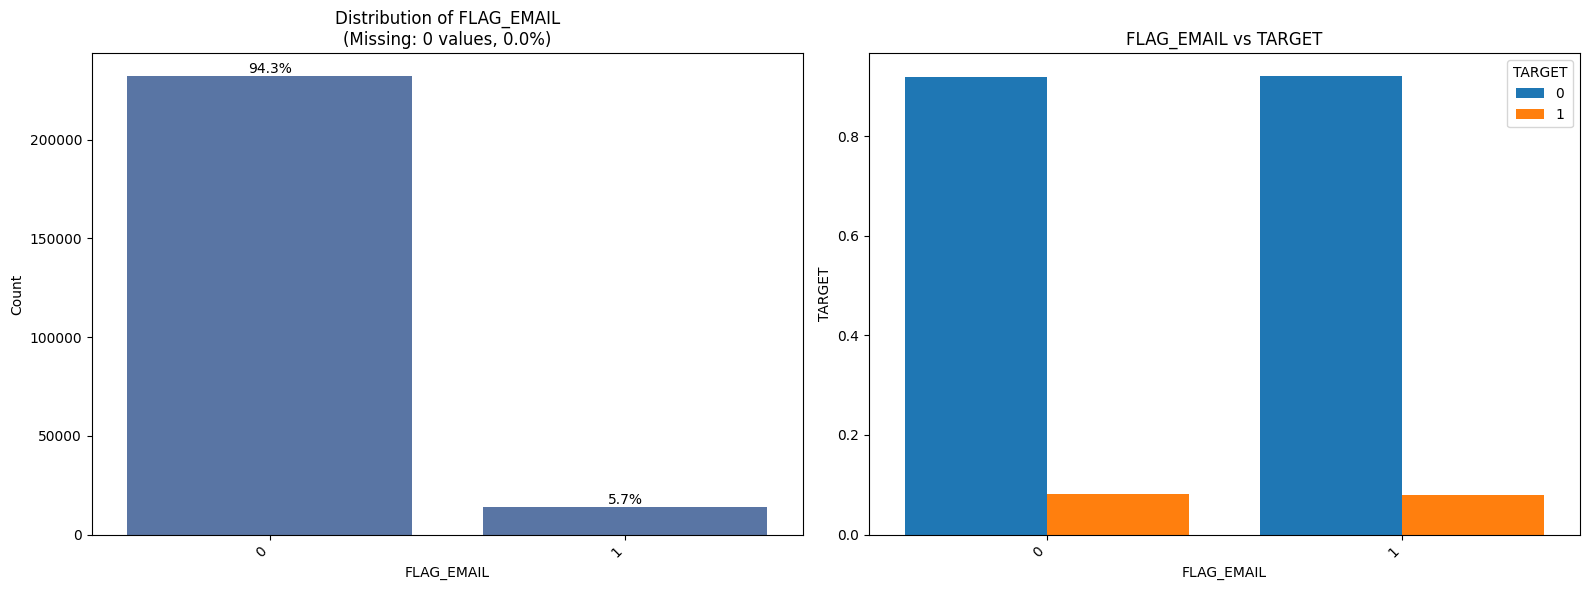

Graficos de la variable: OCCUPATION_TYPE


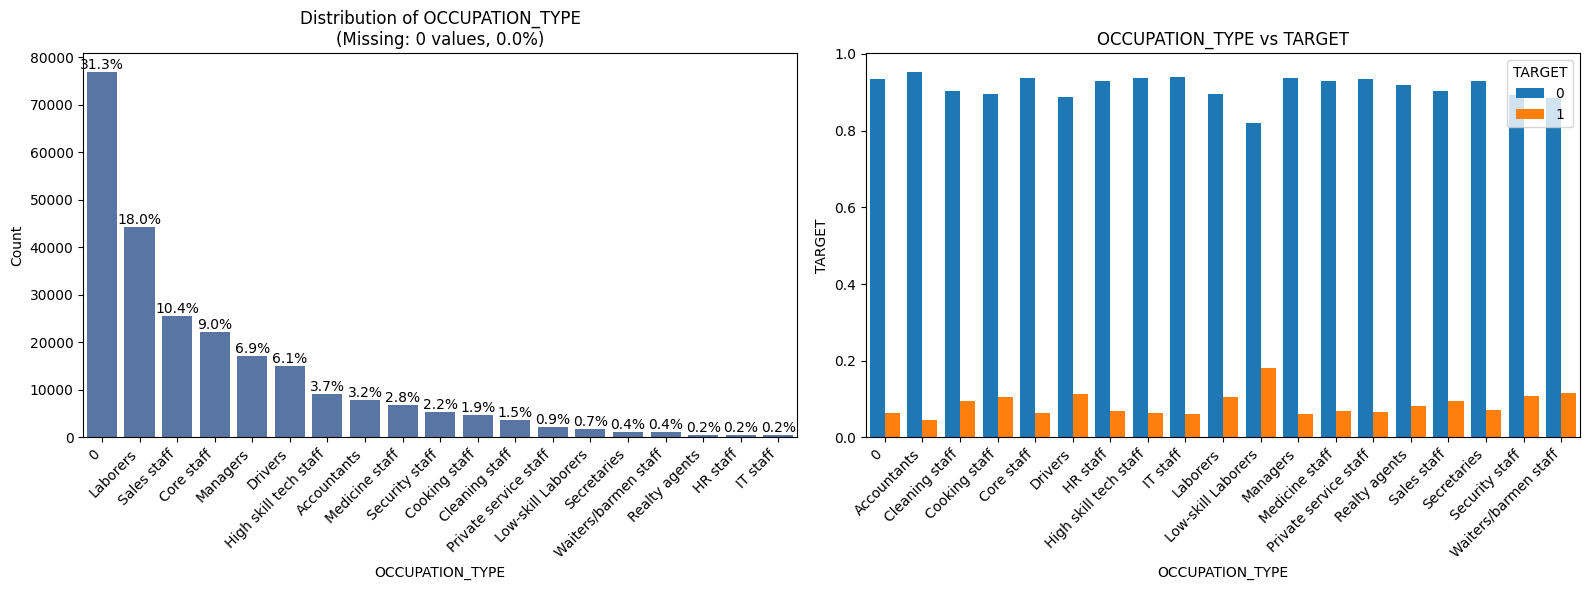

Graficos de la variable: CNT_FAM_MEMBERS


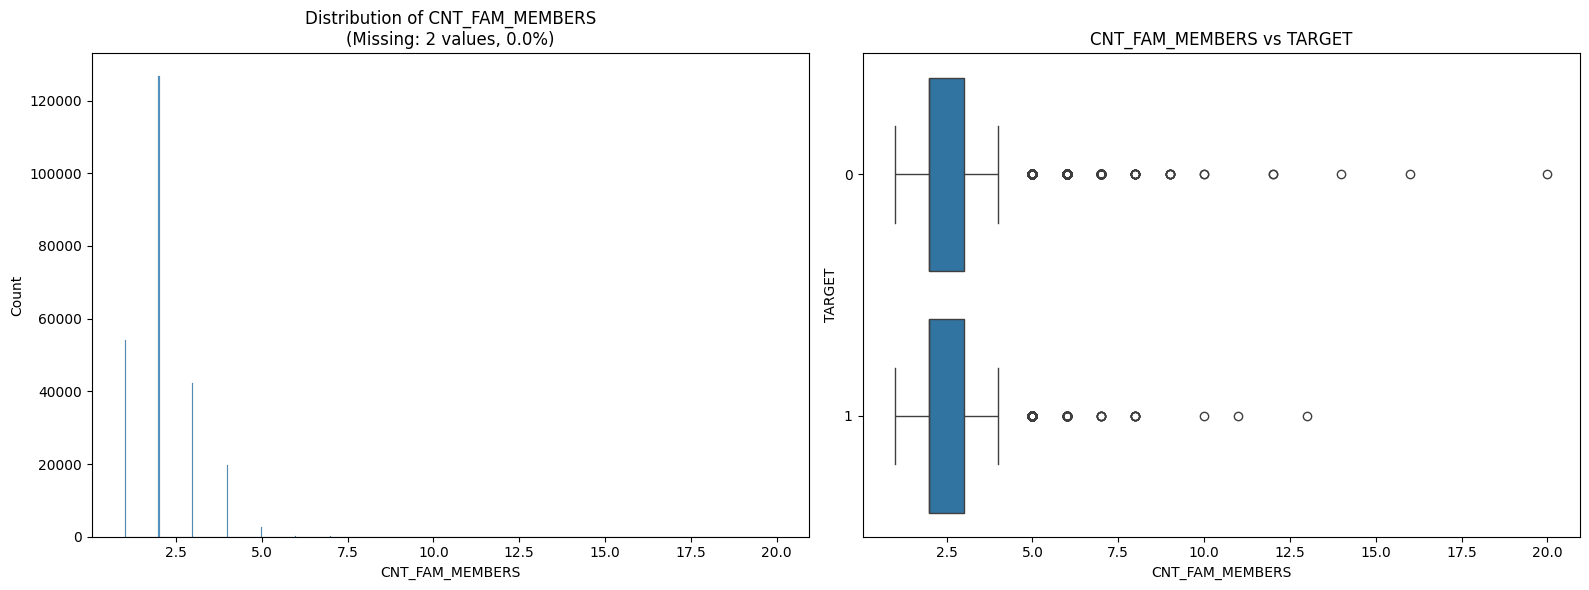

Graficos de la variable: REGION_RATING_CLIENT


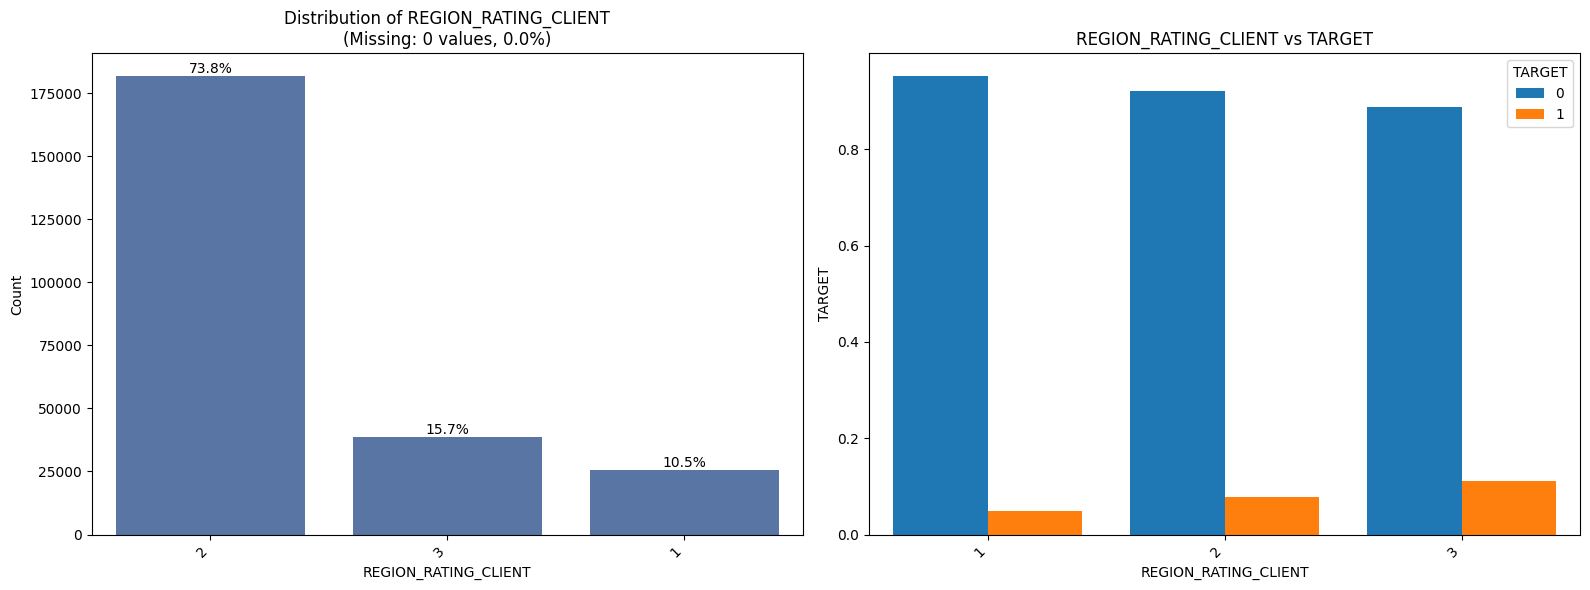

Graficos de la variable: REGION_RATING_CLIENT_W_CITY


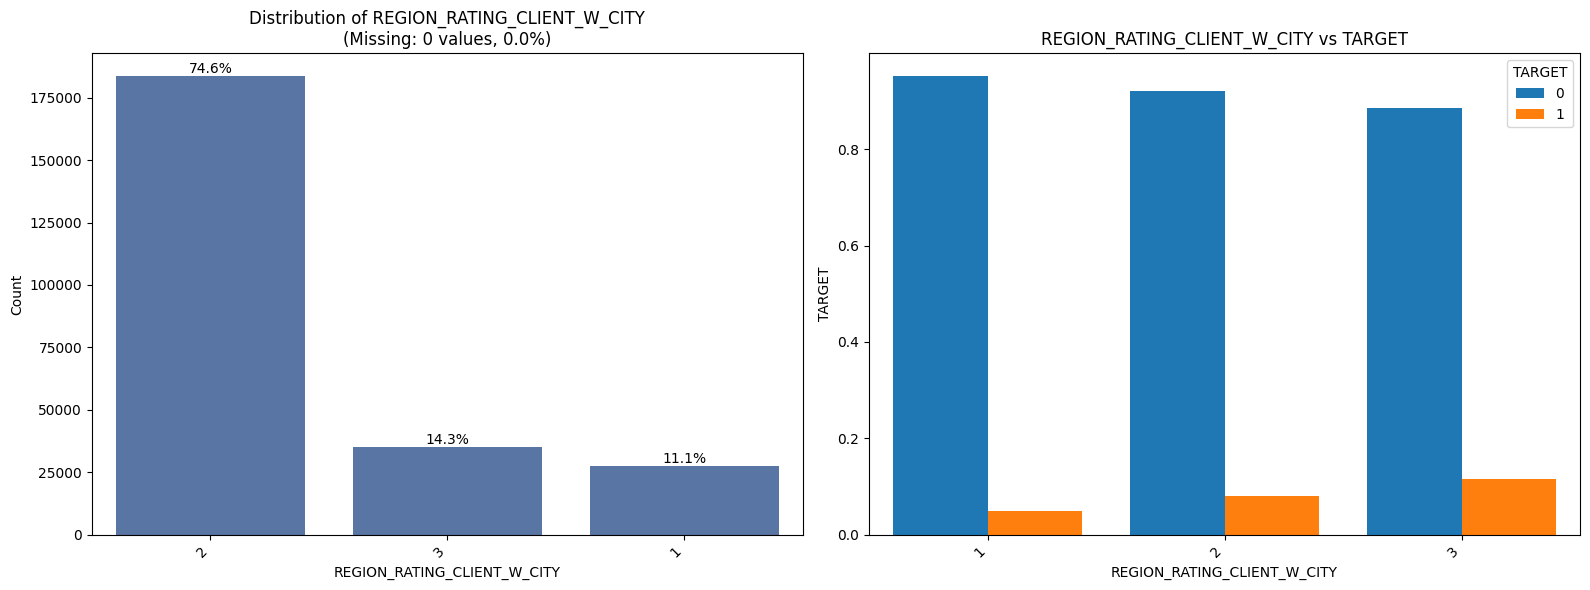

Graficos de la variable: HOUR_APPR_PROCESS_START


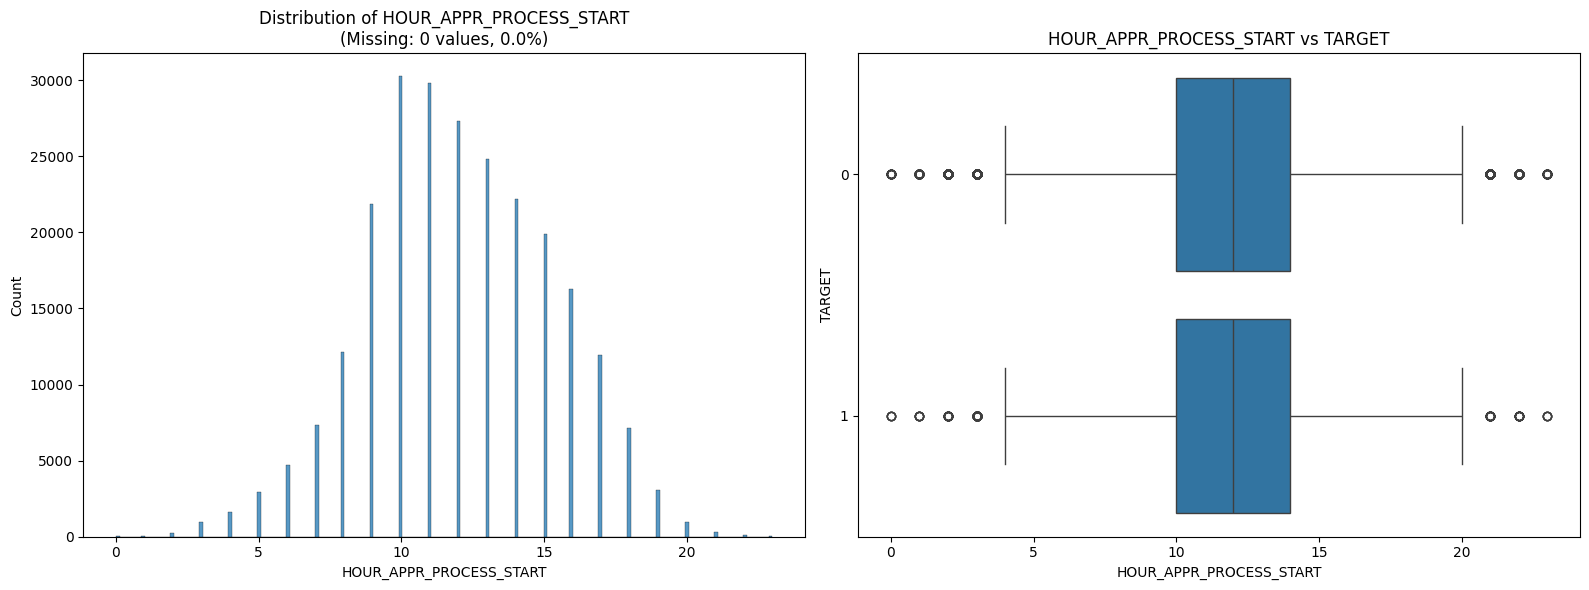

Graficos de la variable: REG_REGION_NOT_LIVE_REGION


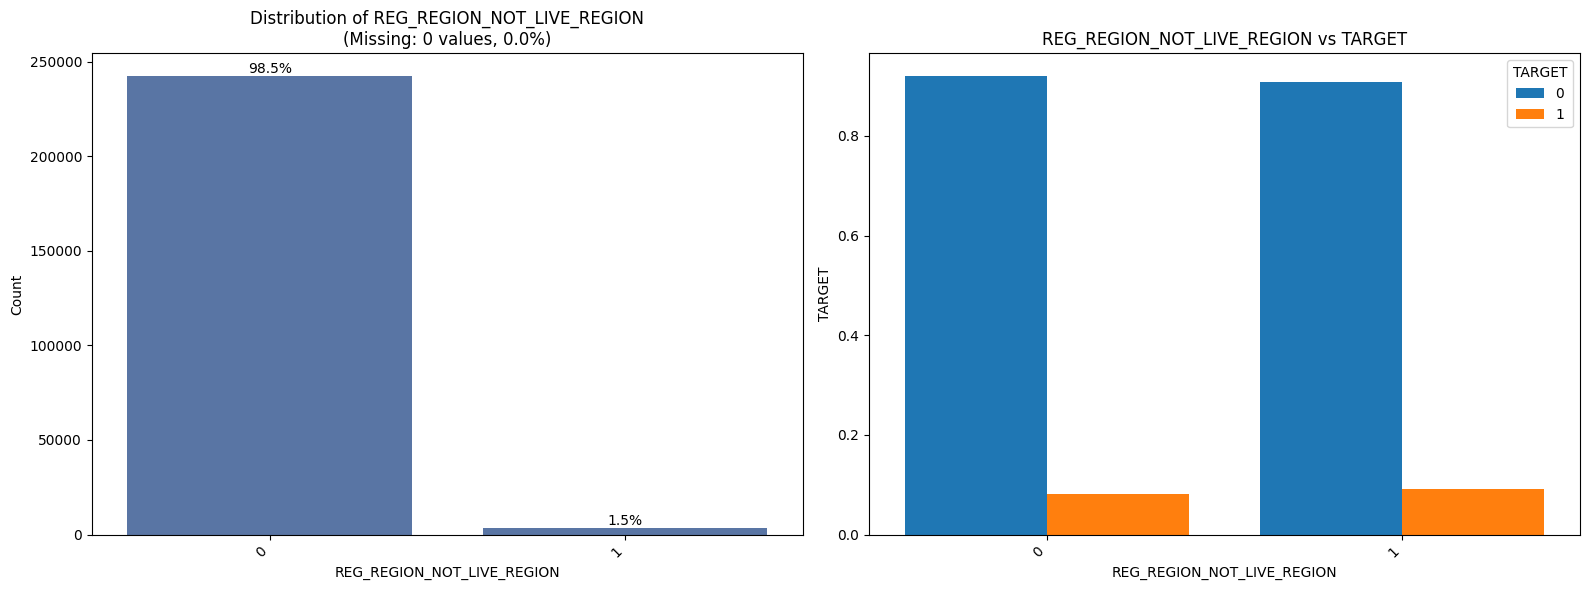

Graficos de la variable: REG_REGION_NOT_WORK_REGION


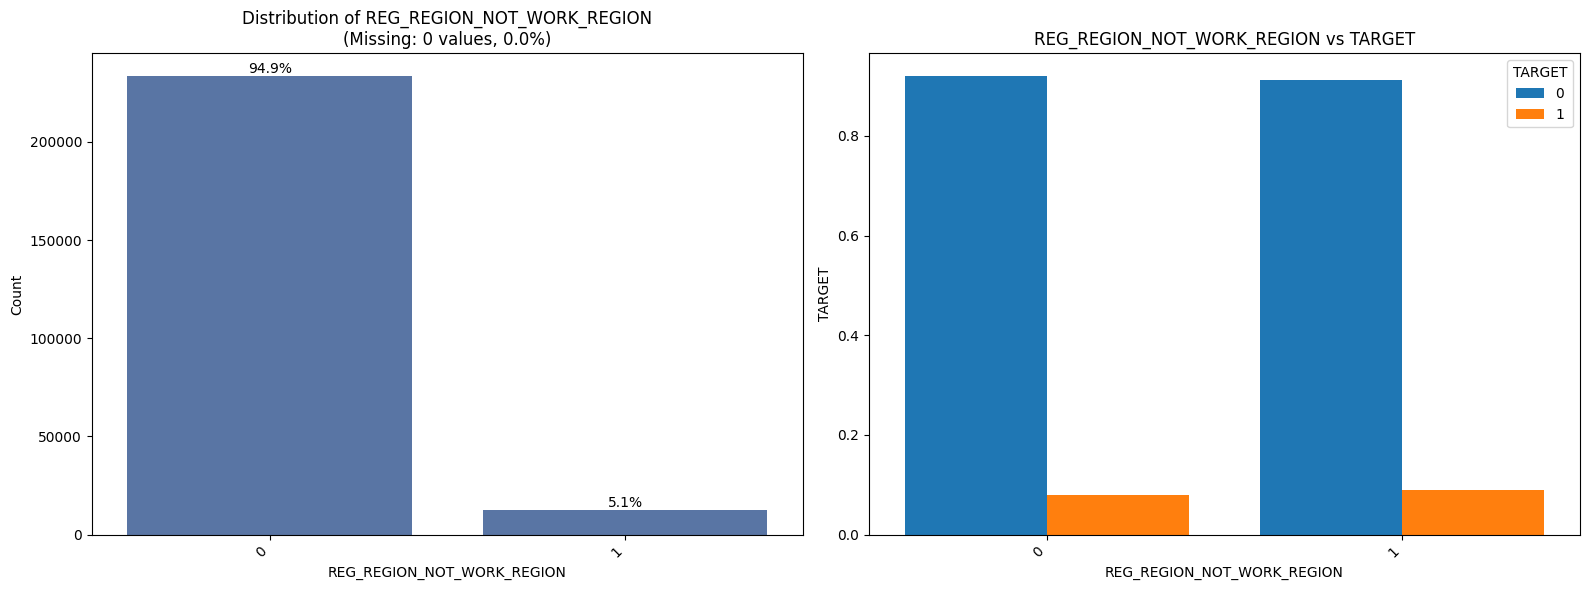

Graficos de la variable: LIVE_REGION_NOT_WORK_REGION


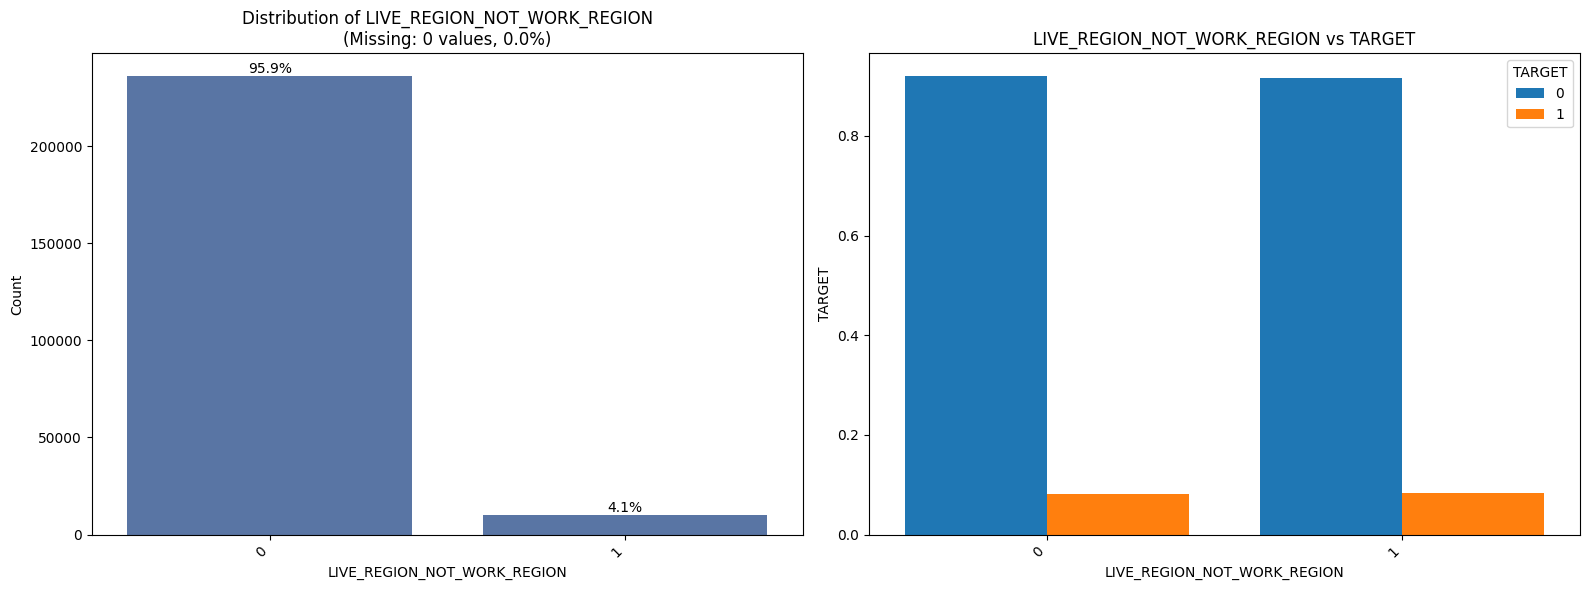

Graficos de la variable: REG_CITY_NOT_LIVE_CITY


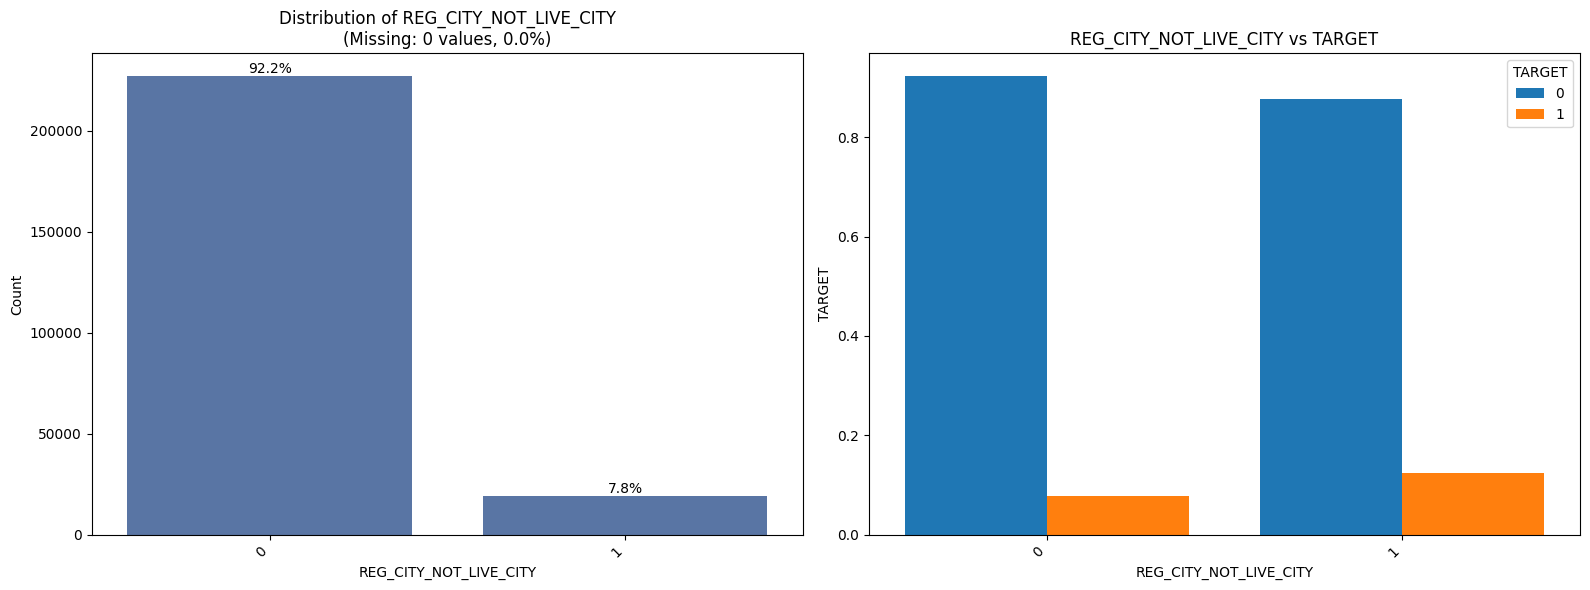

Graficos de la variable: REG_CITY_NOT_WORK_CITY


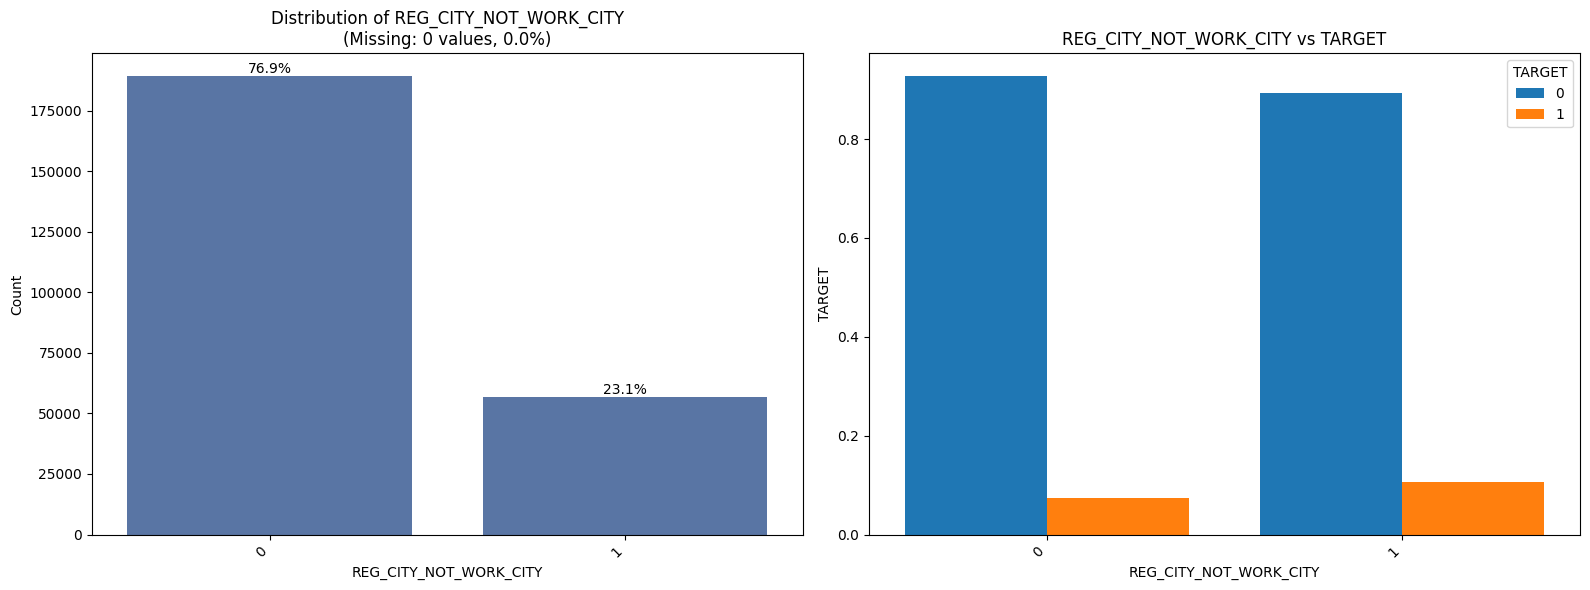

Graficos de la variable: LIVE_CITY_NOT_WORK_CITY


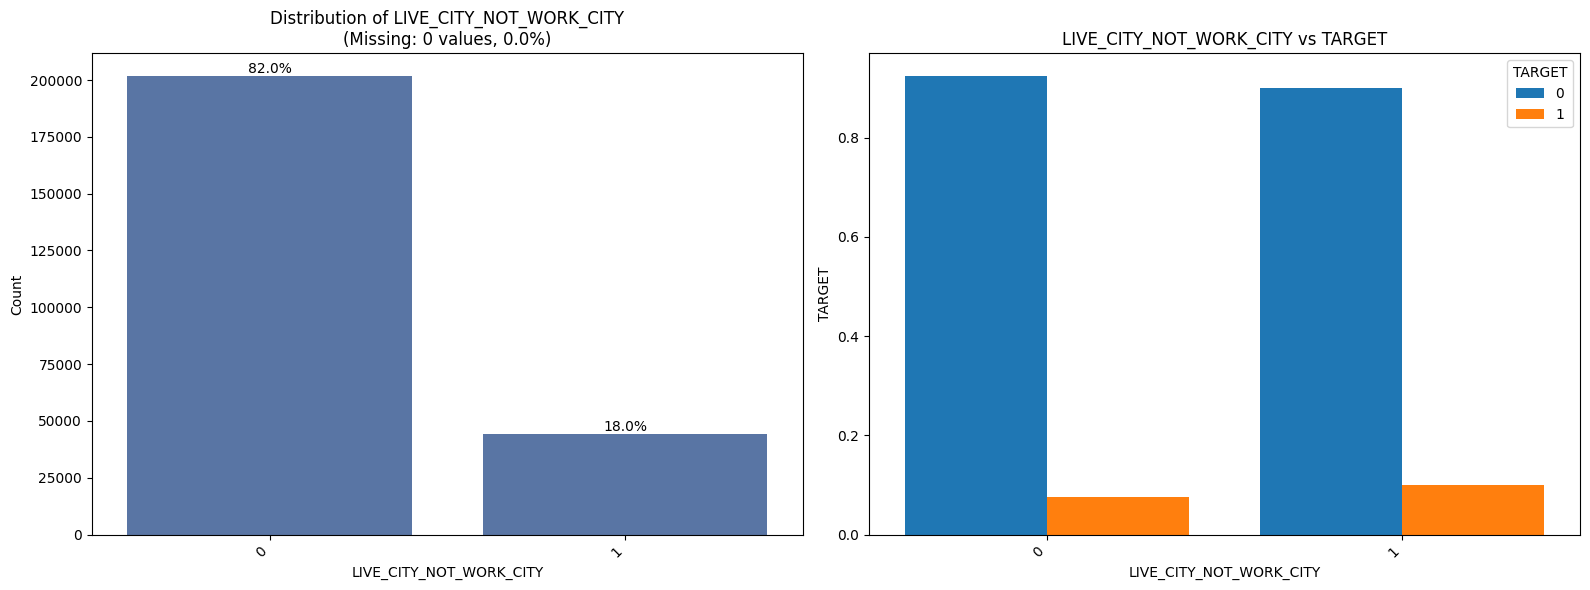

Graficos de la variable: ORGANIZATION_TYPE


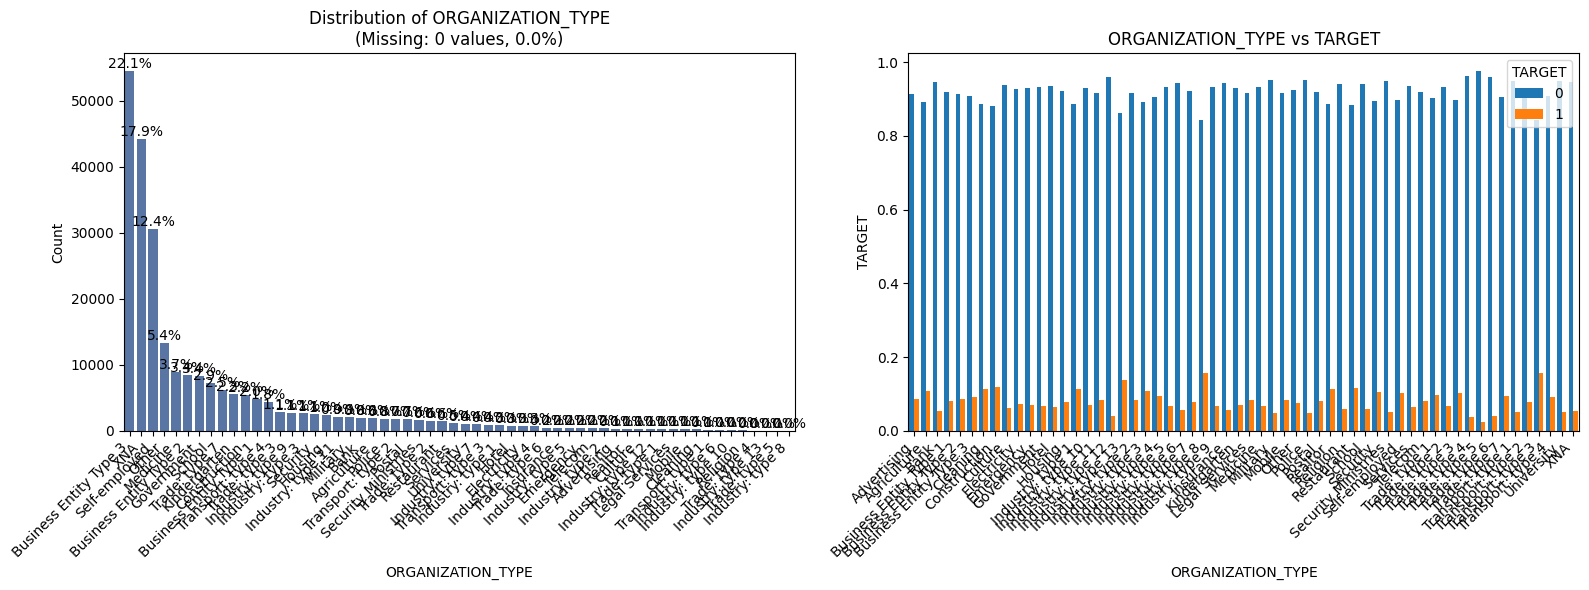

Graficos de la variable: EXT_SOURCE_1


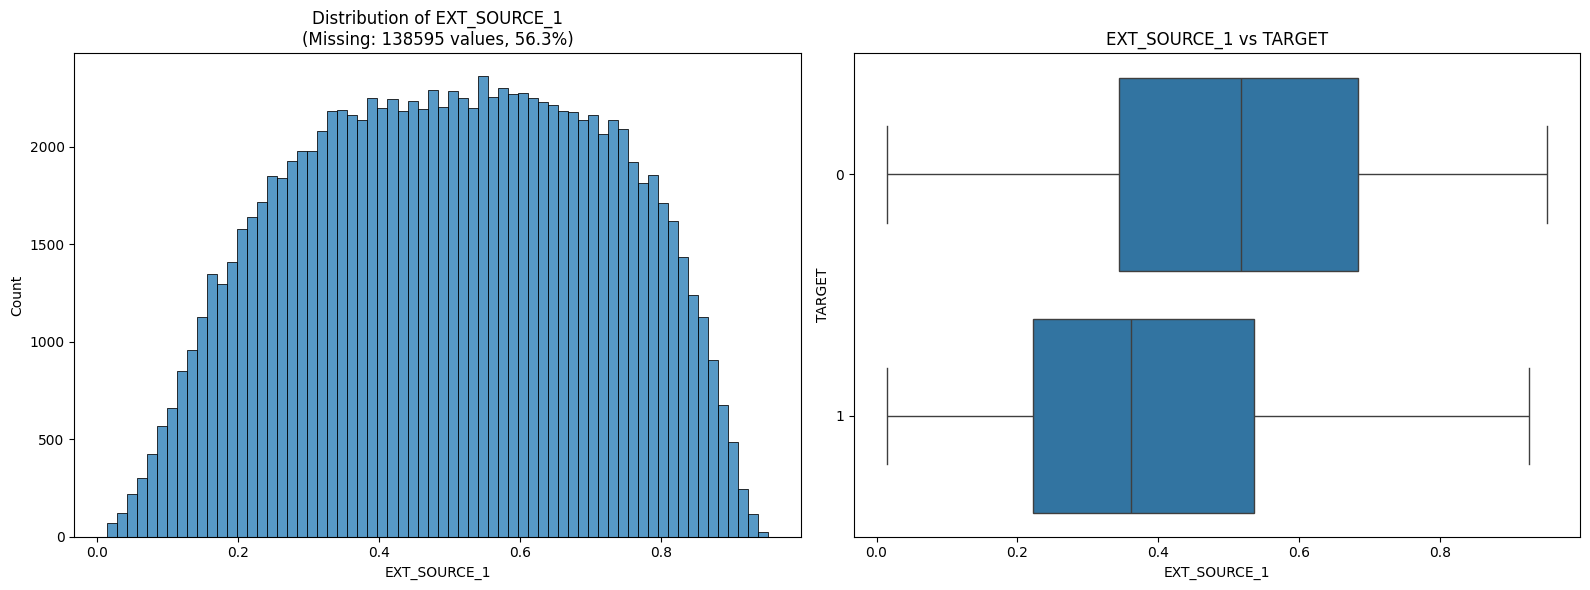

Graficos de la variable: EXT_SOURCE_2


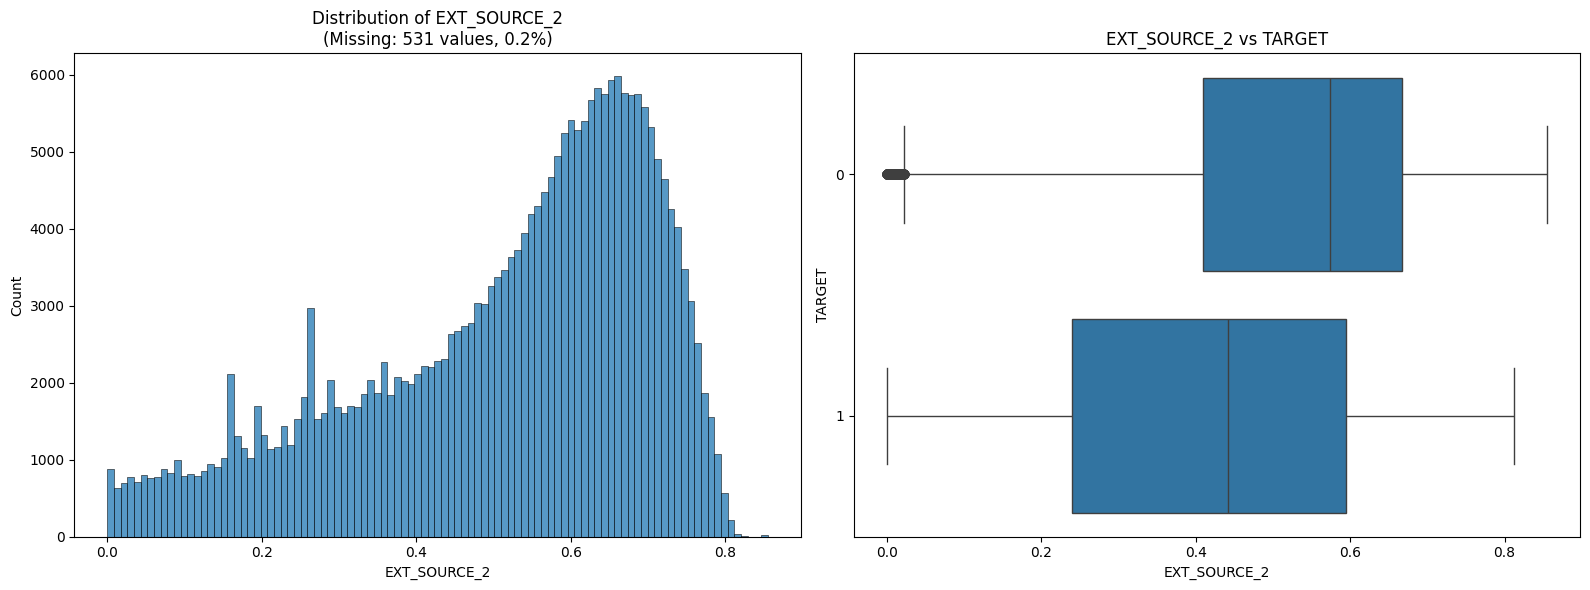

Graficos de la variable: EXT_SOURCE_3


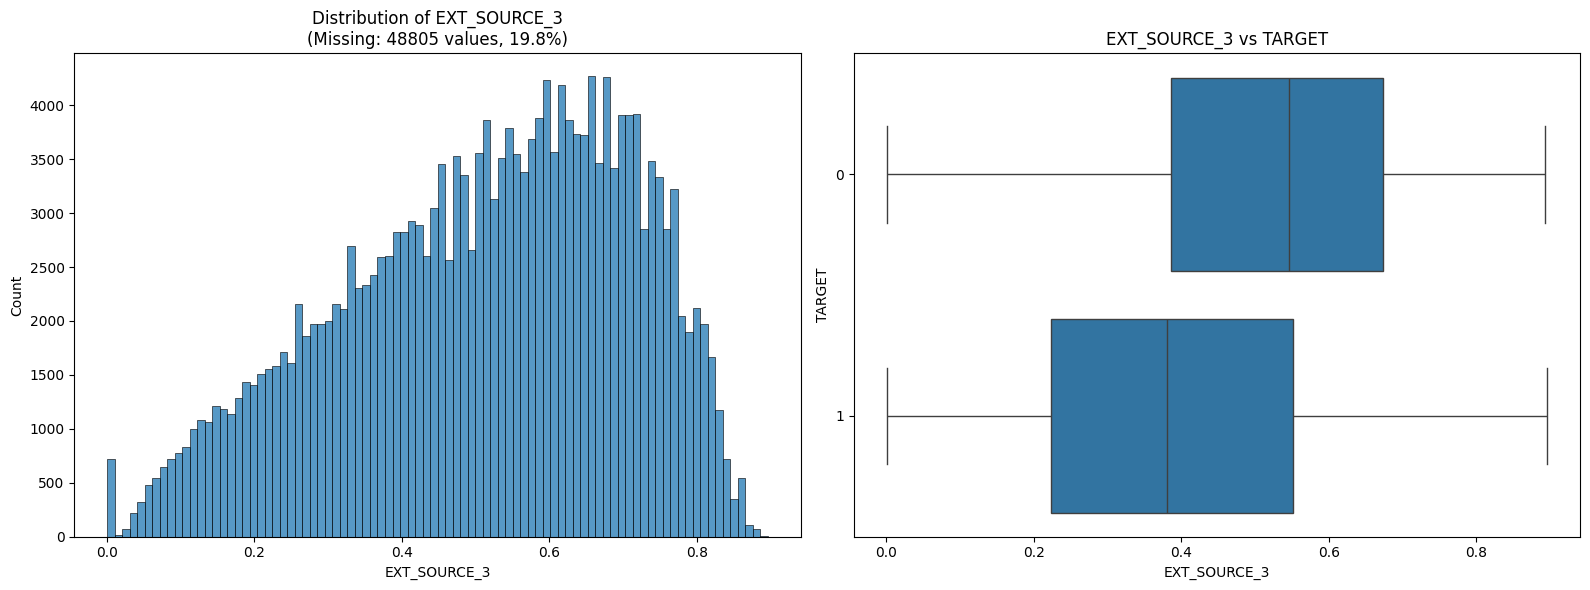

Graficos de la variable: APARTMENTS_AVG


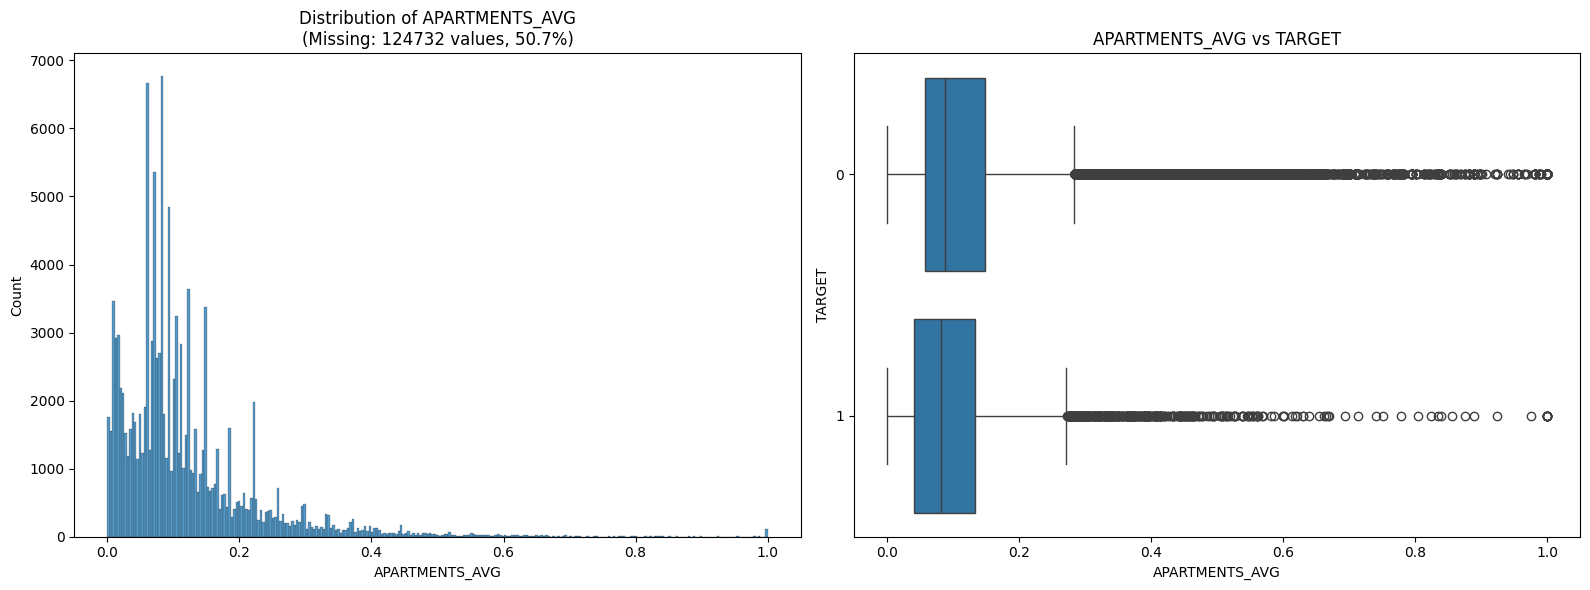

Graficos de la variable: BASEMENTAREA_AVG


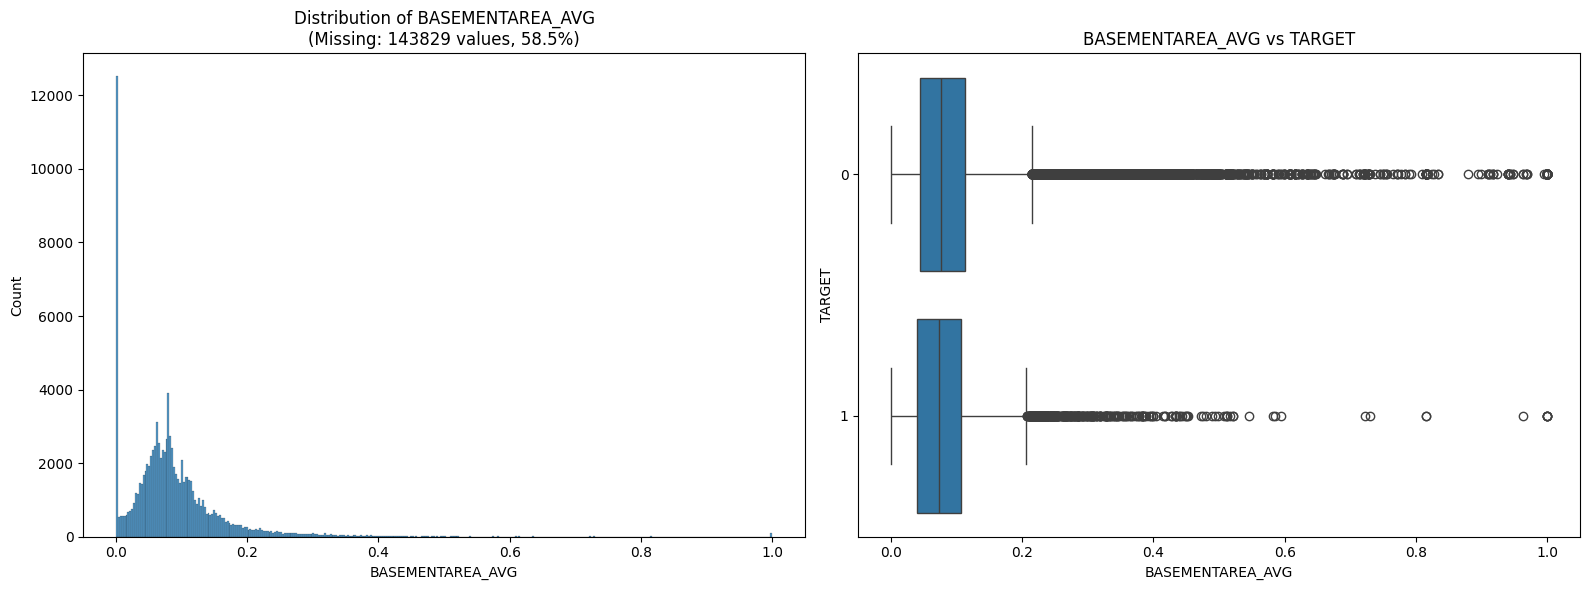

Graficos de la variable: YEARS_BEGINEXPLUATATION_AVG


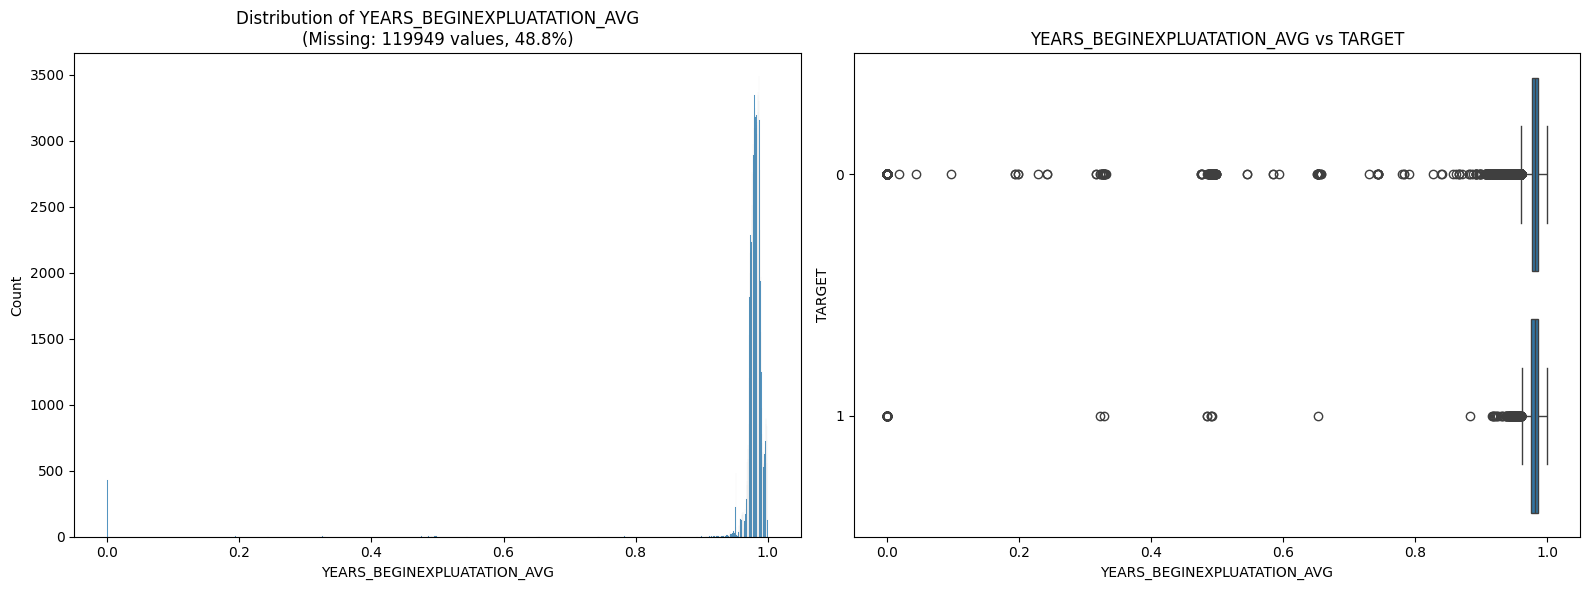

Graficos de la variable: YEARS_BUILD_AVG


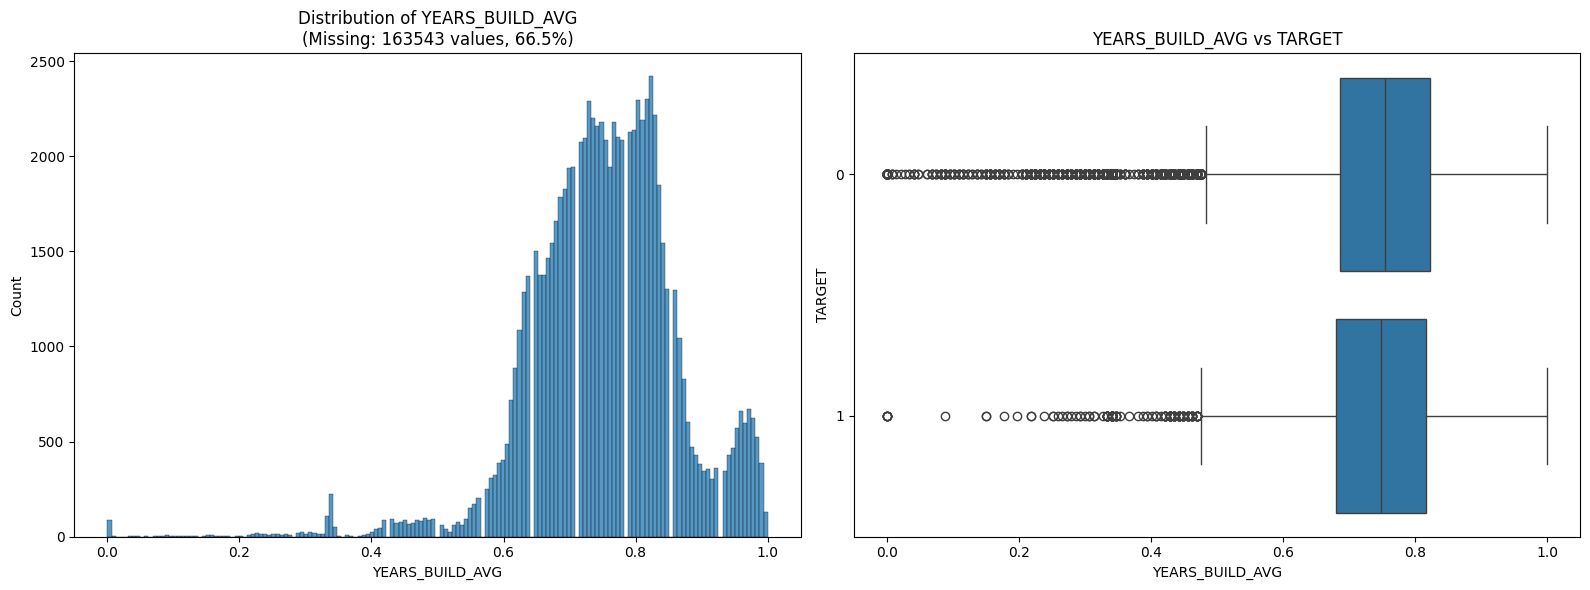

Graficos de la variable: COMMONAREA_AVG


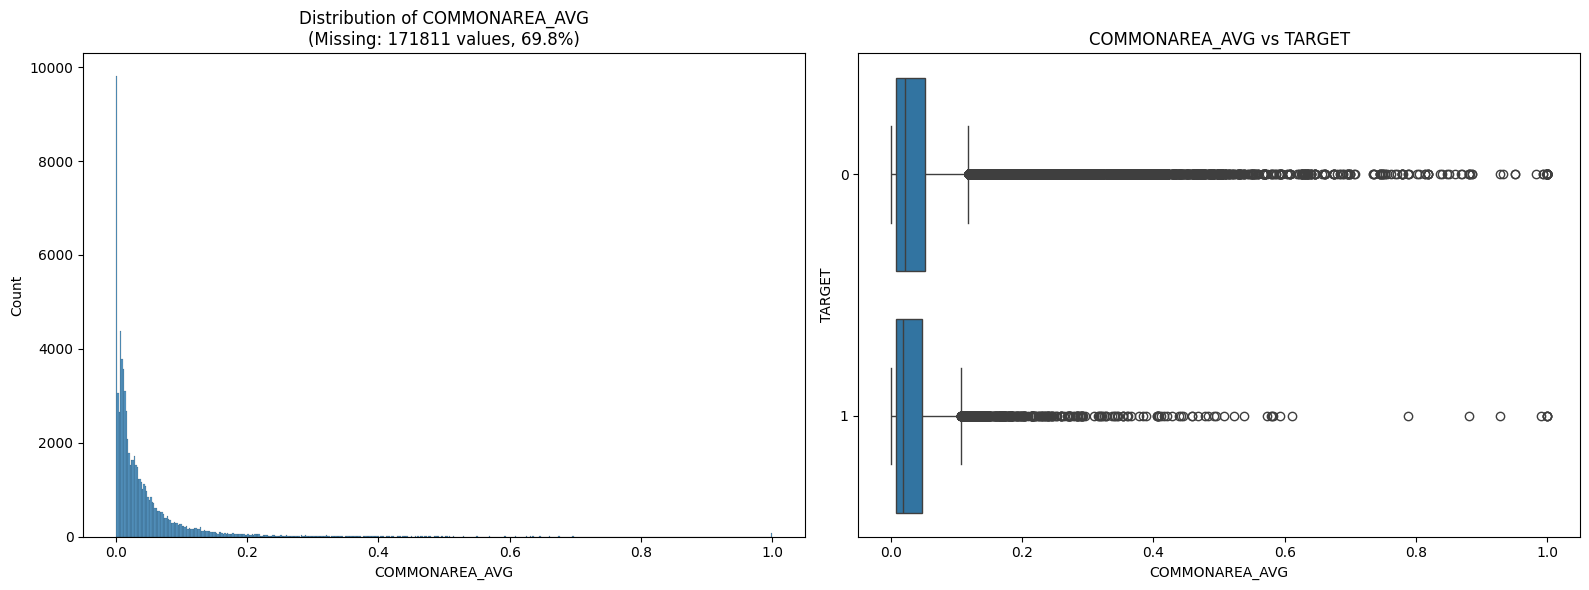

Graficos de la variable: ELEVATORS_AVG


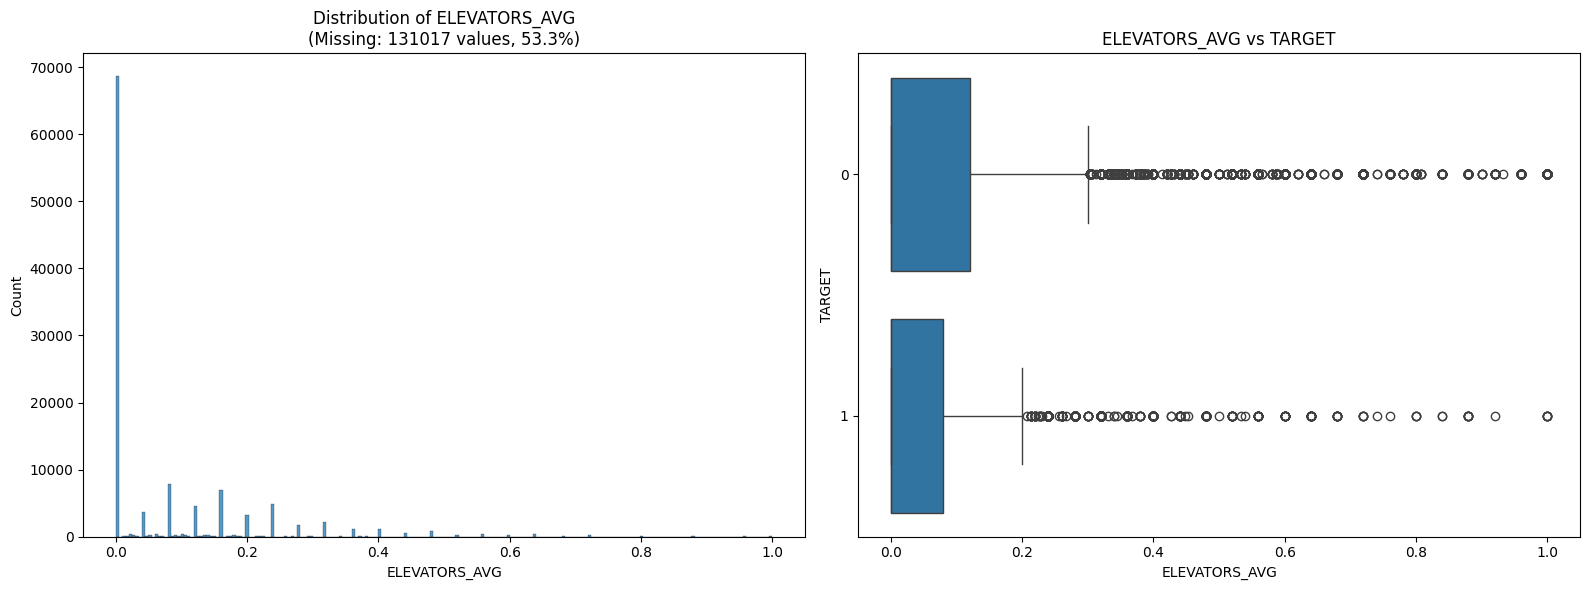

Graficos de la variable: ENTRANCES_AVG


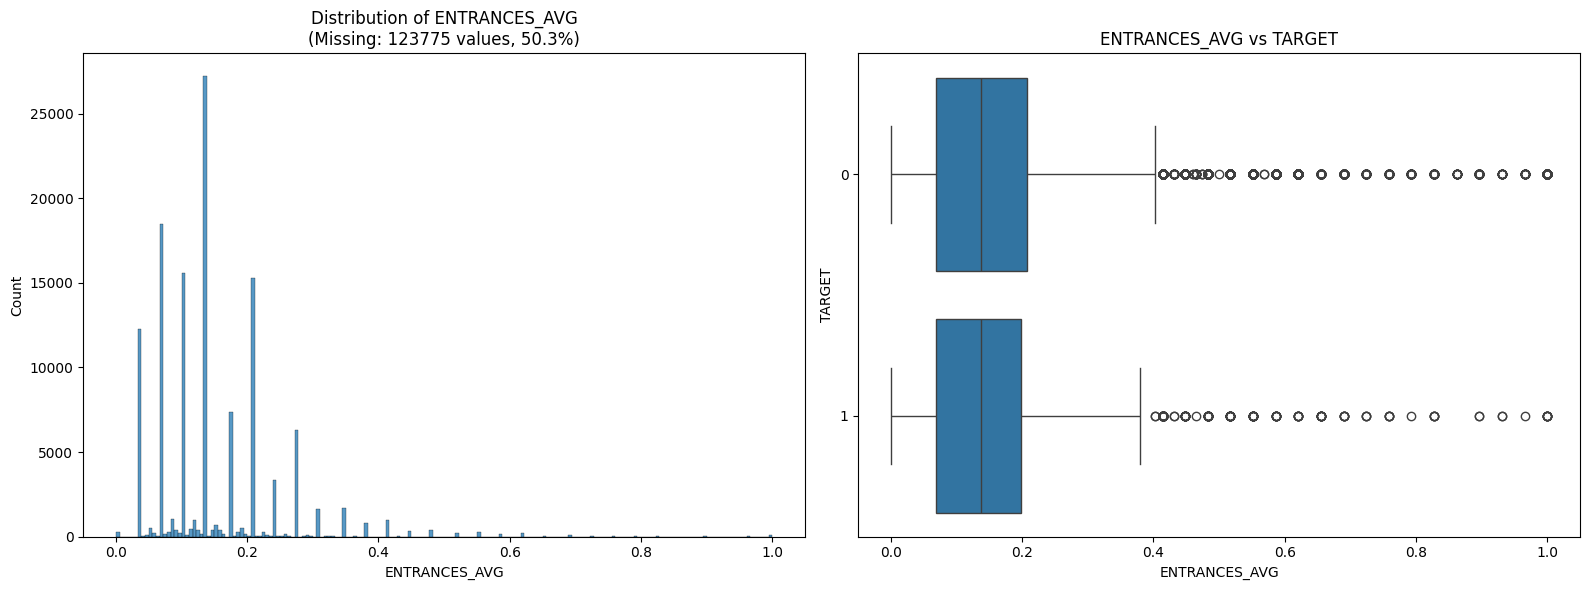

Graficos de la variable: FLOORSMAX_AVG


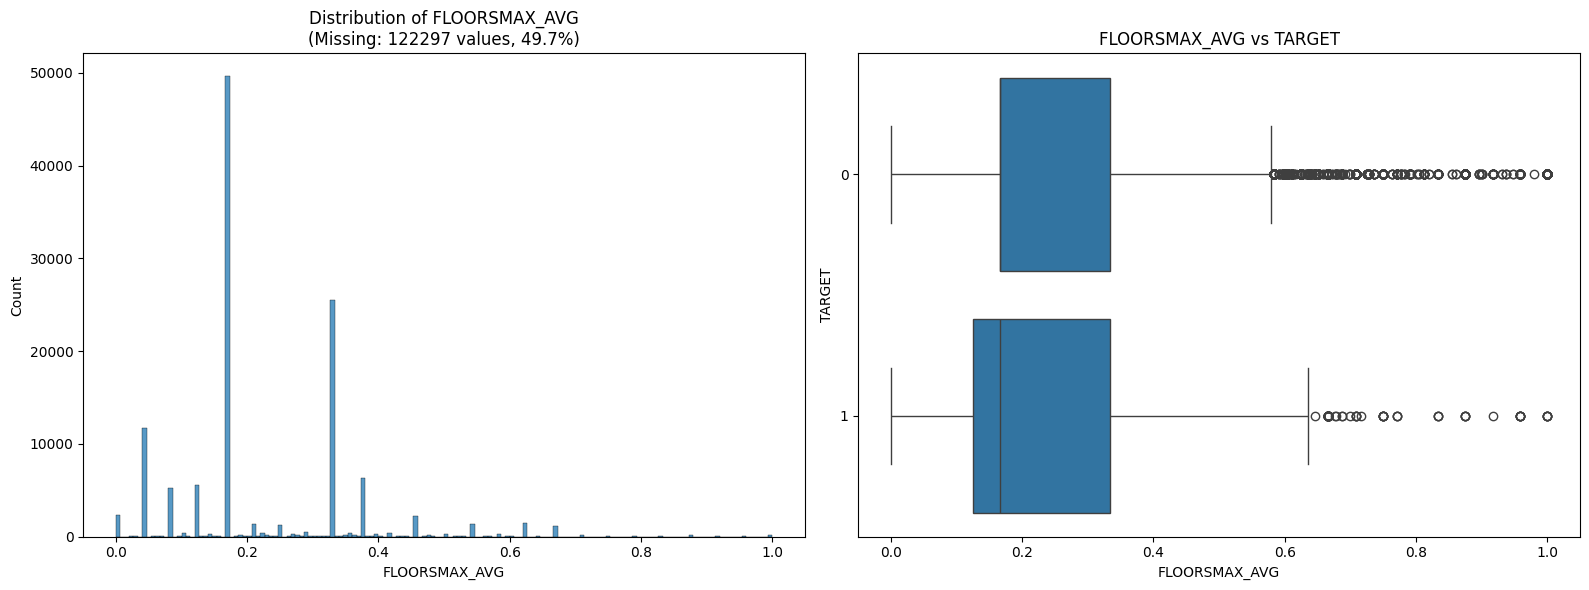

Graficos de la variable: FLOORSMIN_AVG


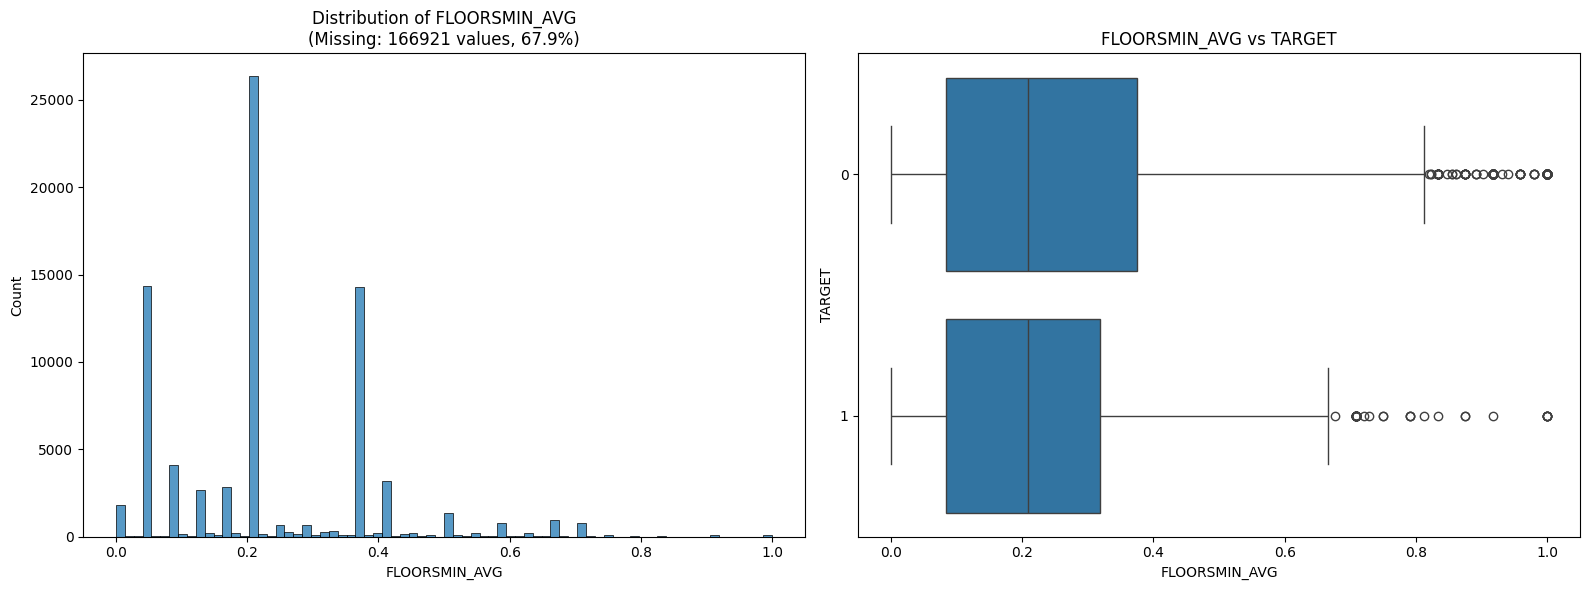

Graficos de la variable: LANDAREA_AVG


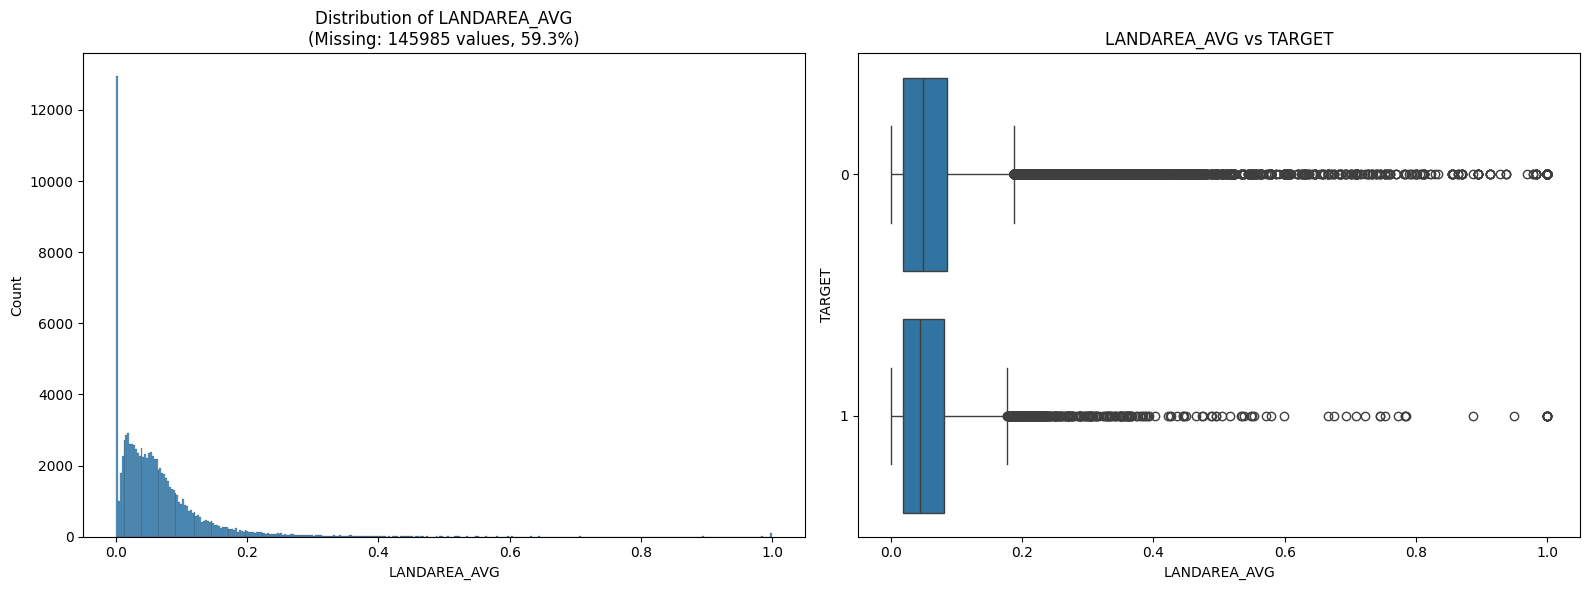

Graficos de la variable: LIVINGAPARTMENTS_AVG


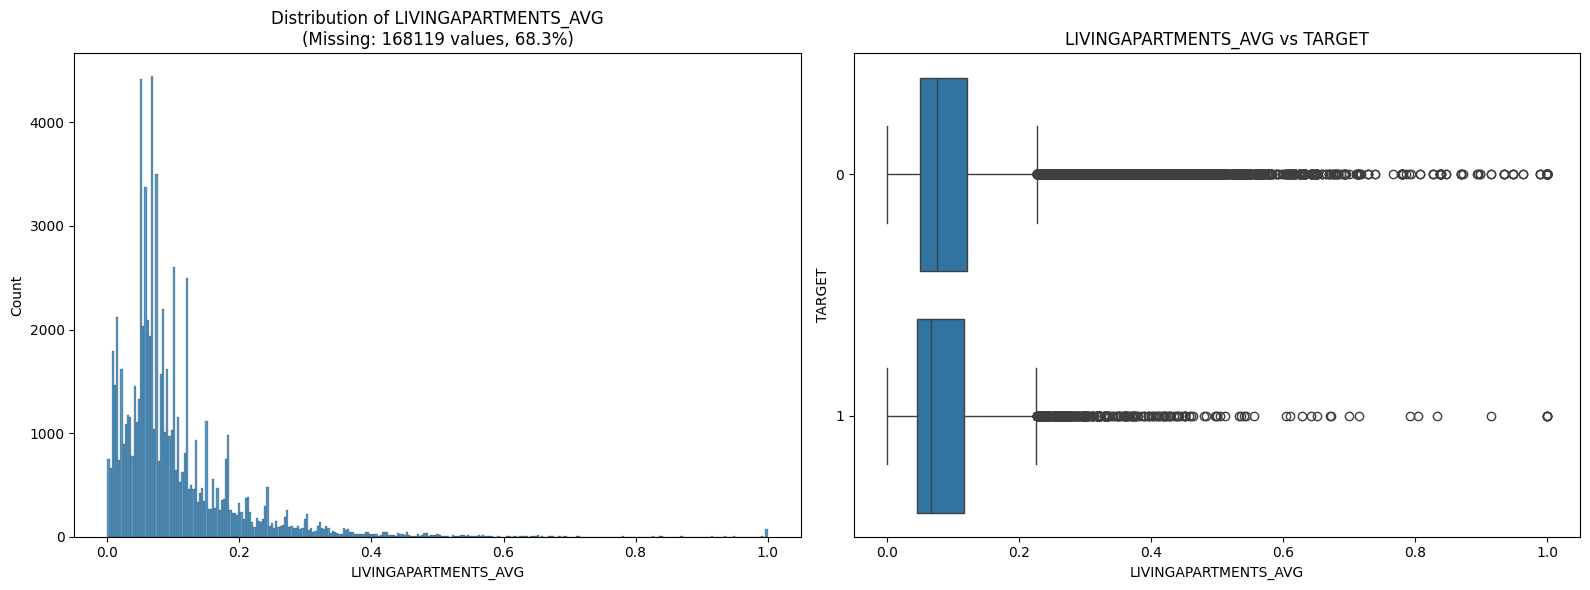

Graficos de la variable: LIVINGAREA_AVG


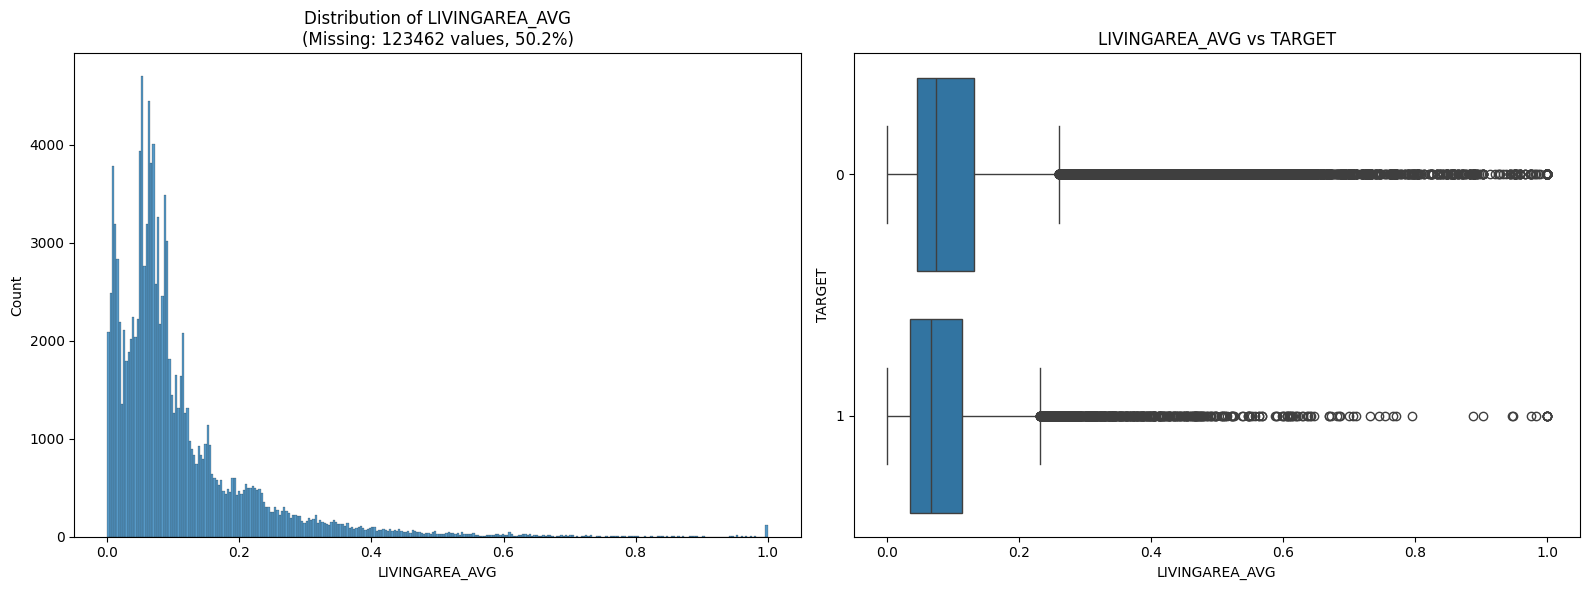

Graficos de la variable: NONLIVINGAPARTMENTS_AVG


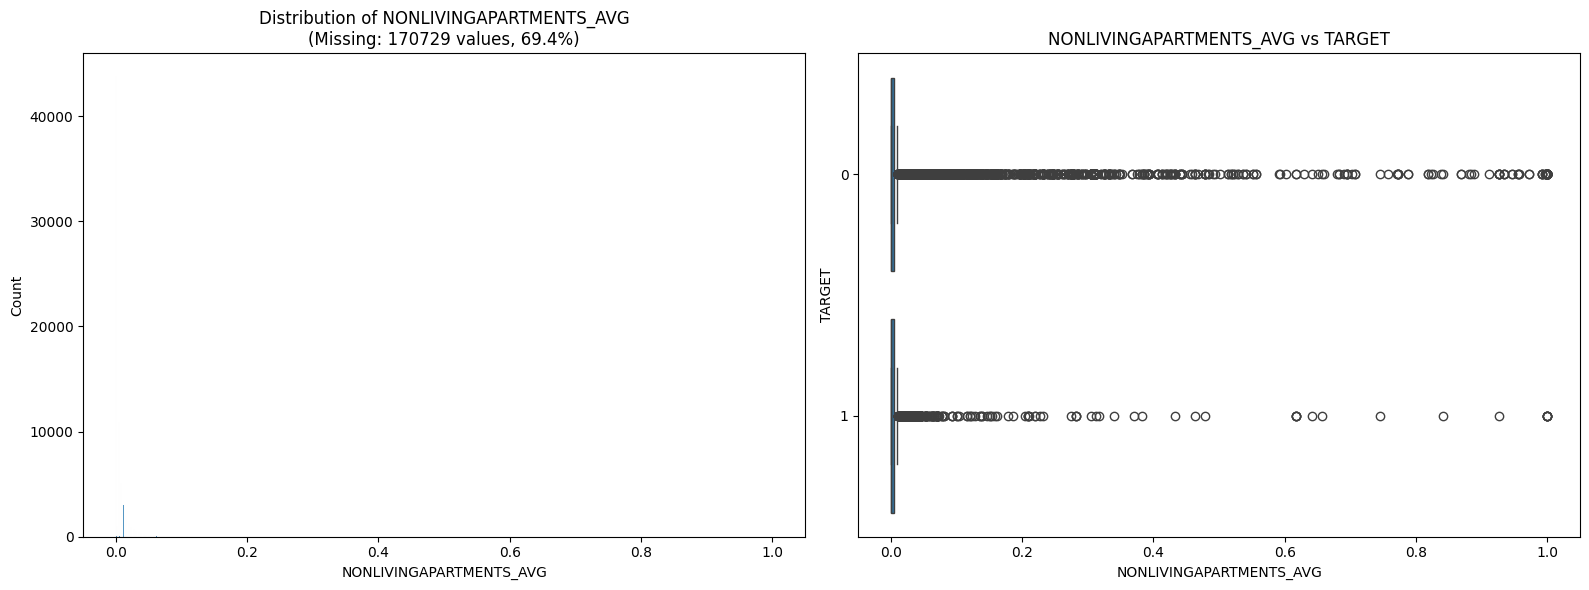

Graficos de la variable: NONLIVINGAREA_AVG


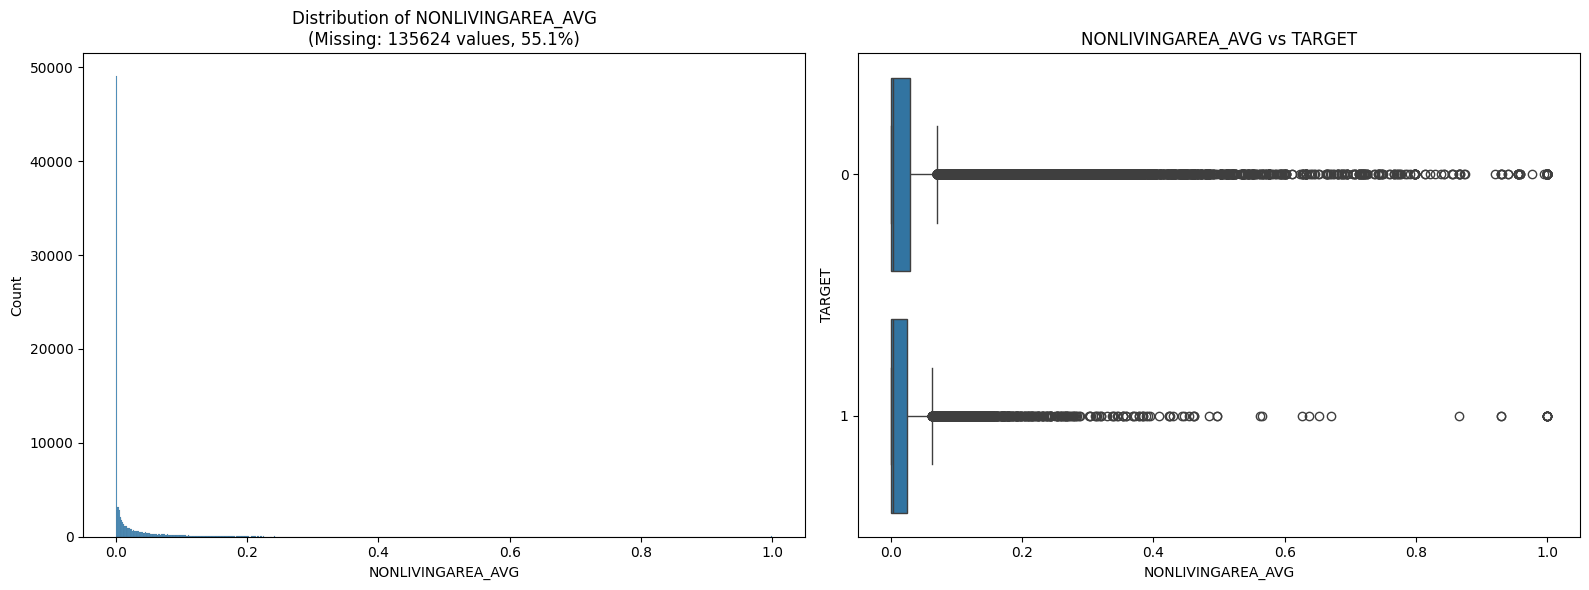

Graficos de la variable: APARTMENTS_MODE


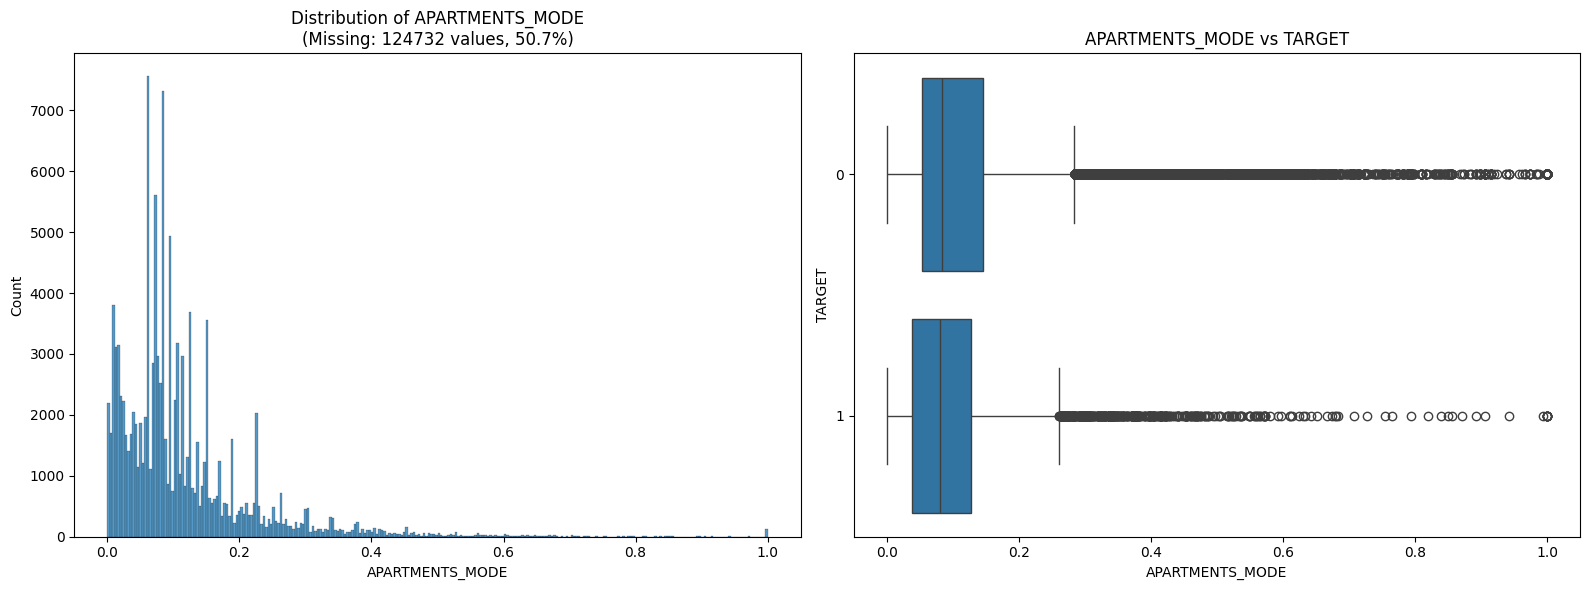

Graficos de la variable: BASEMENTAREA_MODE


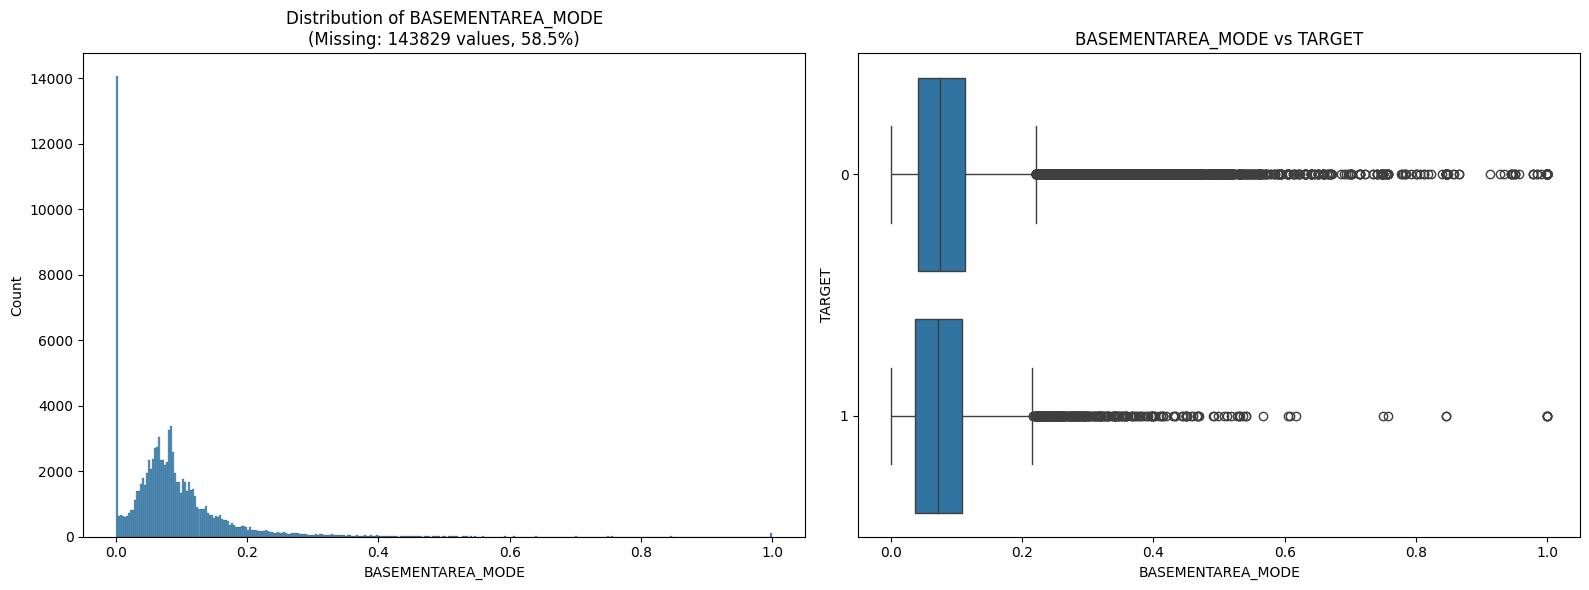

Graficos de la variable: YEARS_BEGINEXPLUATATION_MODE


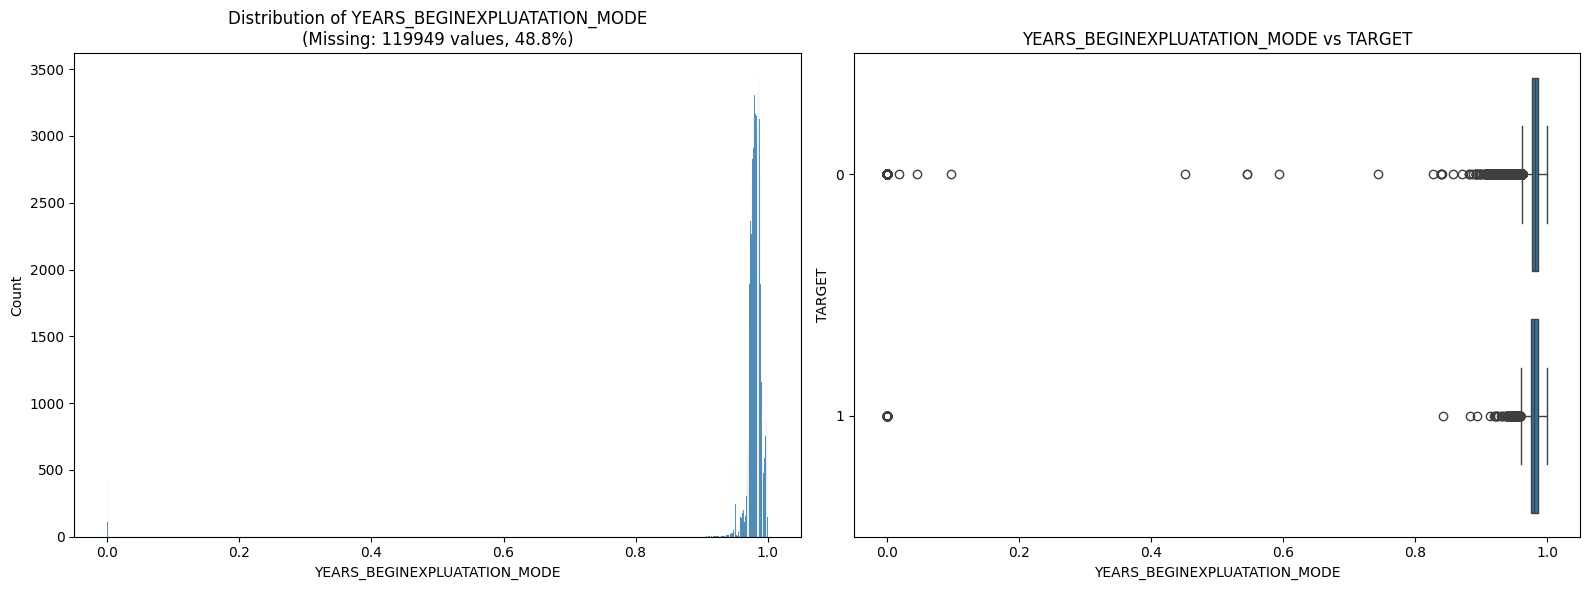

Graficos de la variable: YEARS_BUILD_MODE


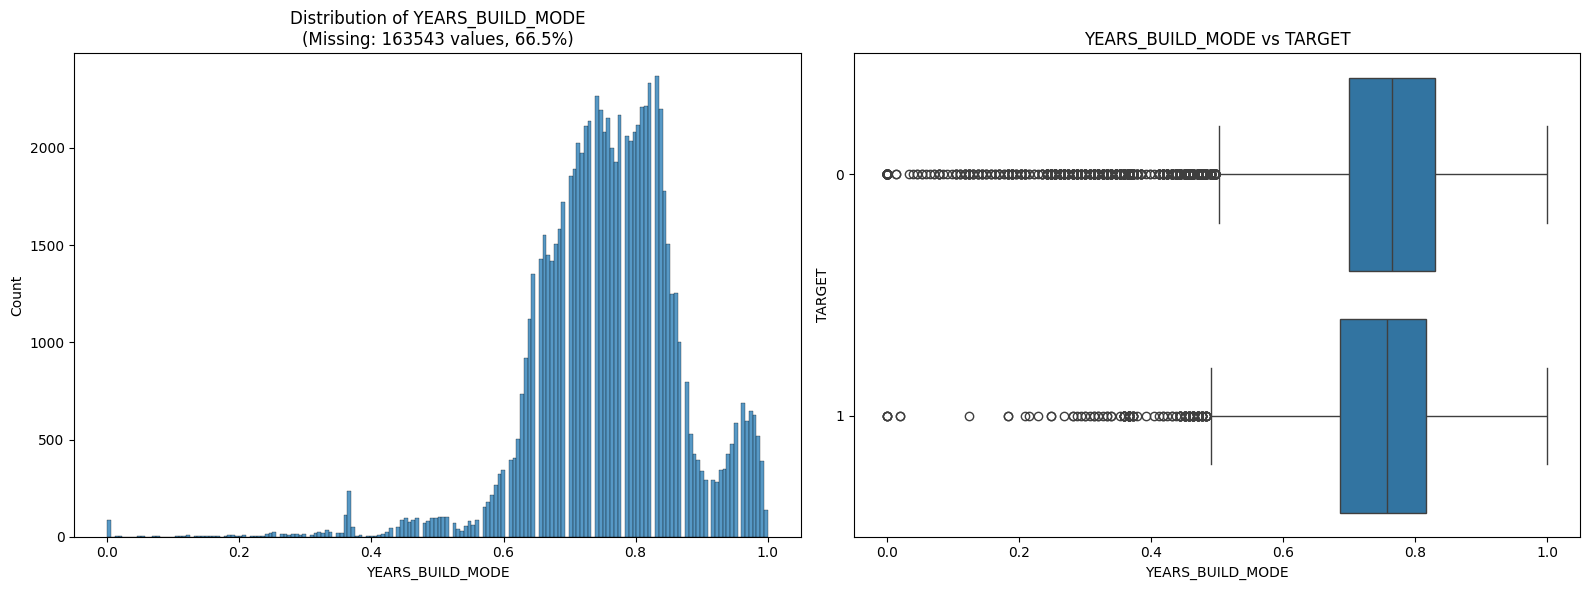

Graficos de la variable: COMMONAREA_MODE


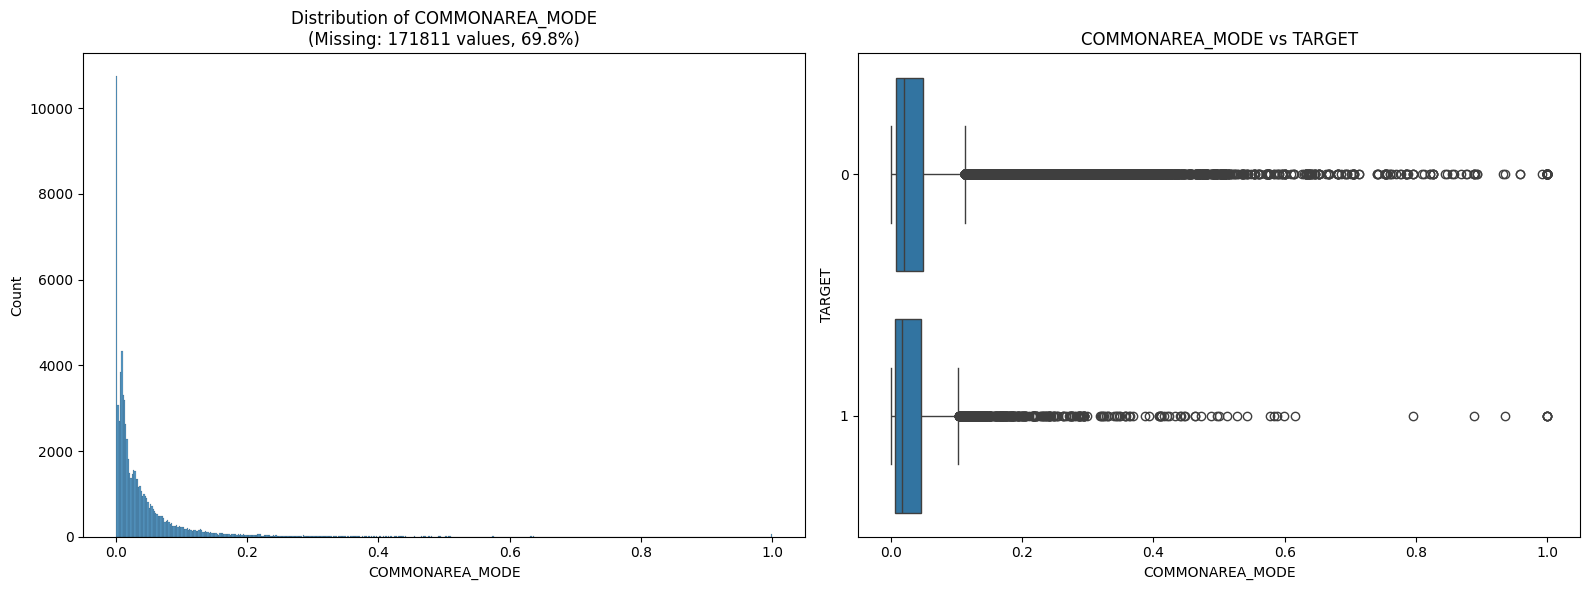

Graficos de la variable: ELEVATORS_MODE


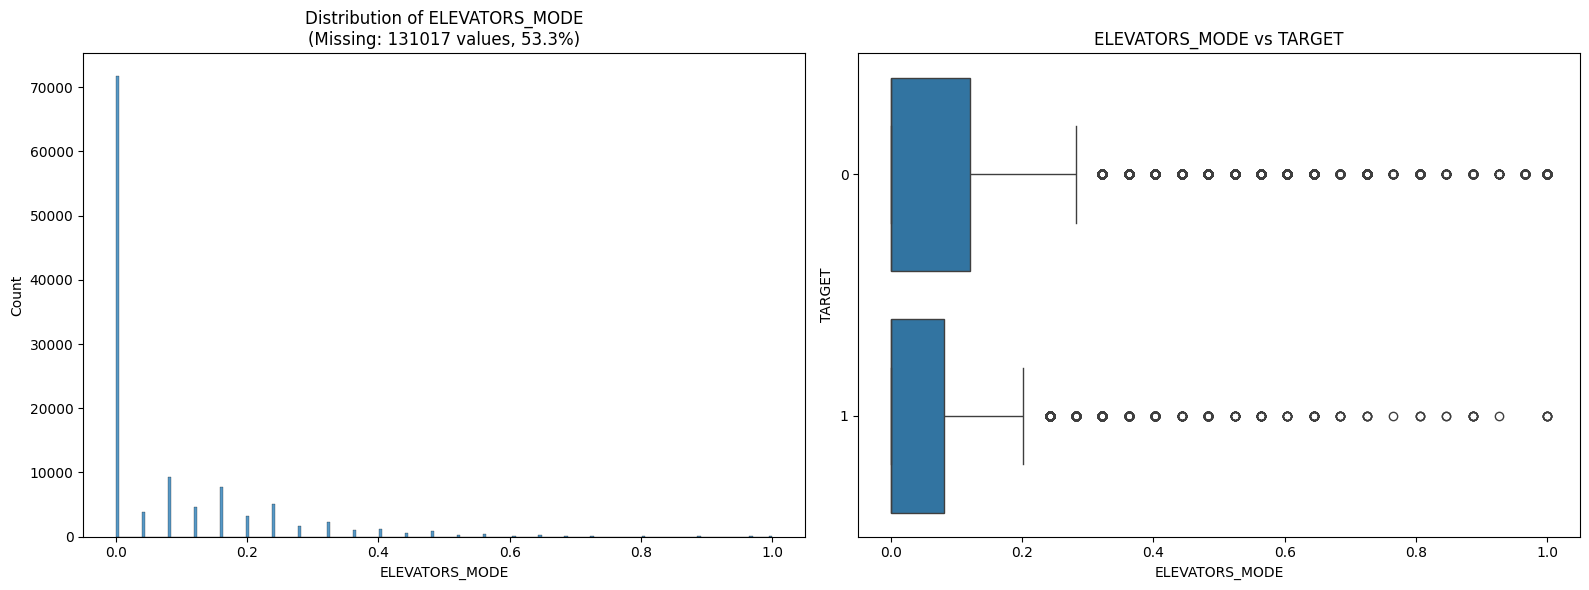

Graficos de la variable: ENTRANCES_MODE


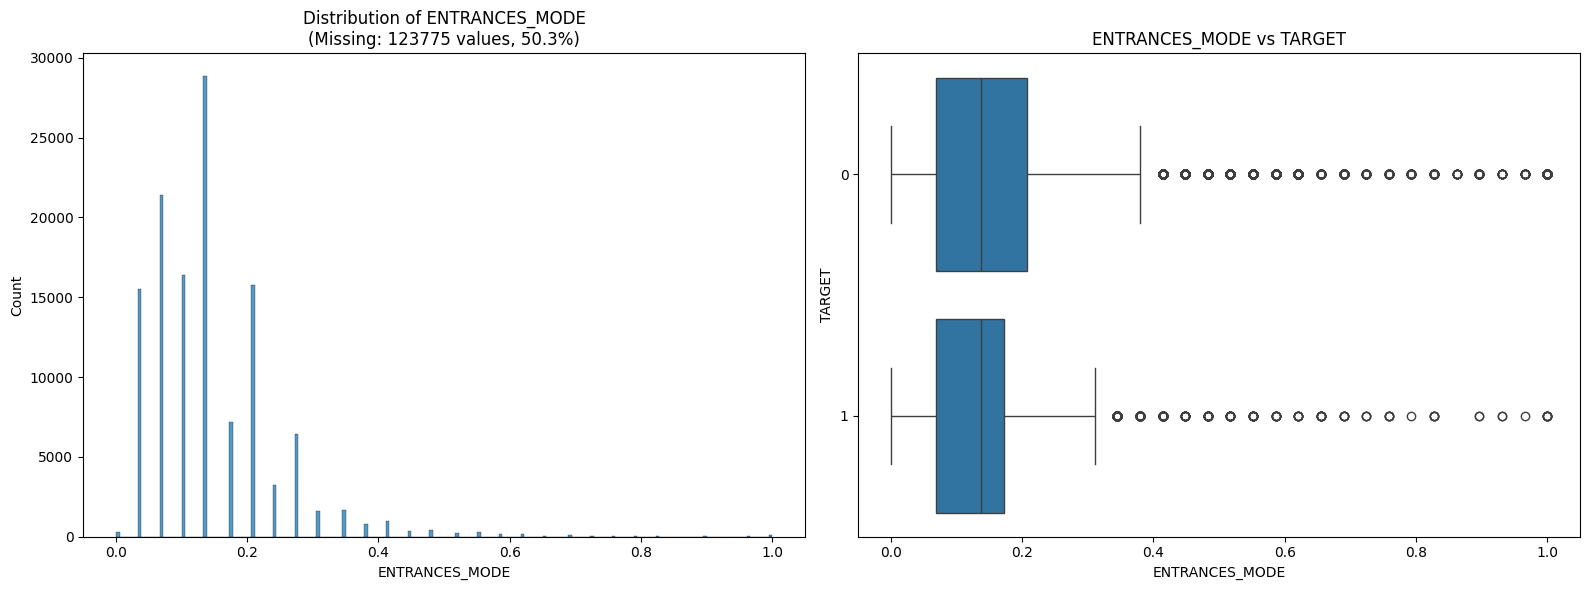

Graficos de la variable: FLOORSMAX_MODE


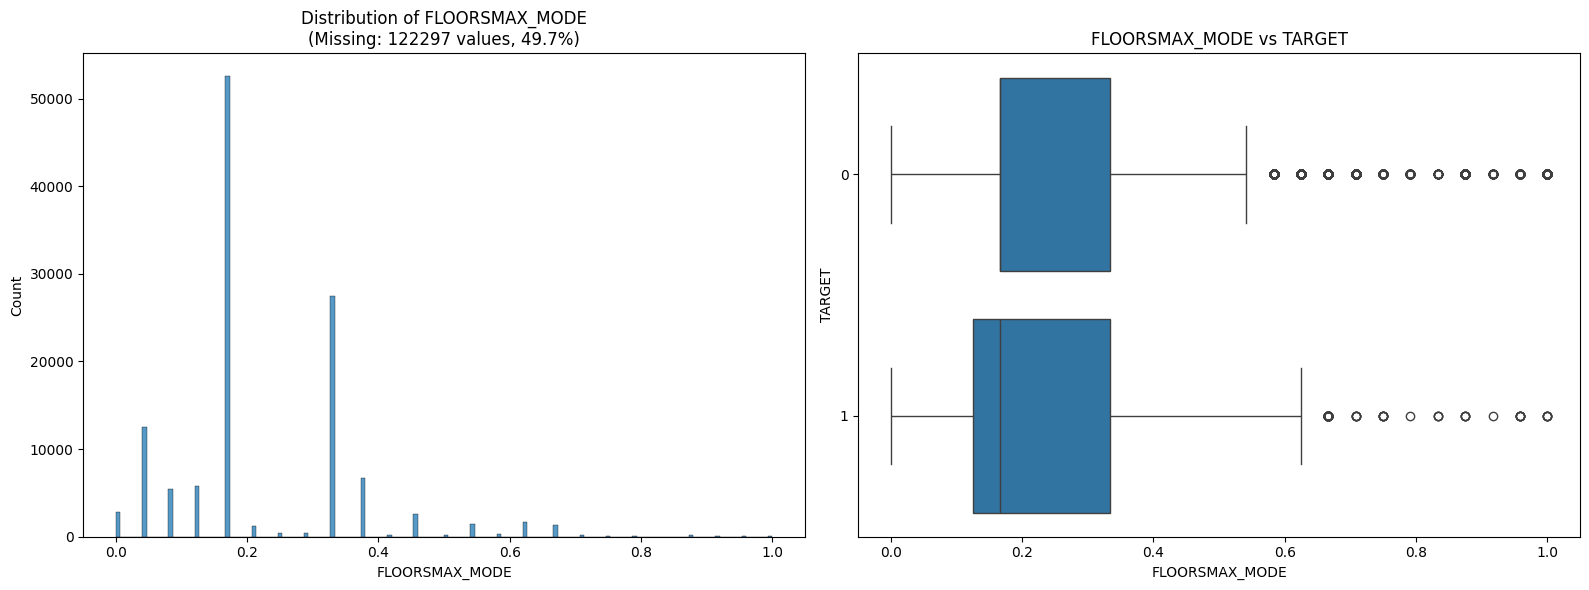

Graficos de la variable: FLOORSMIN_MODE


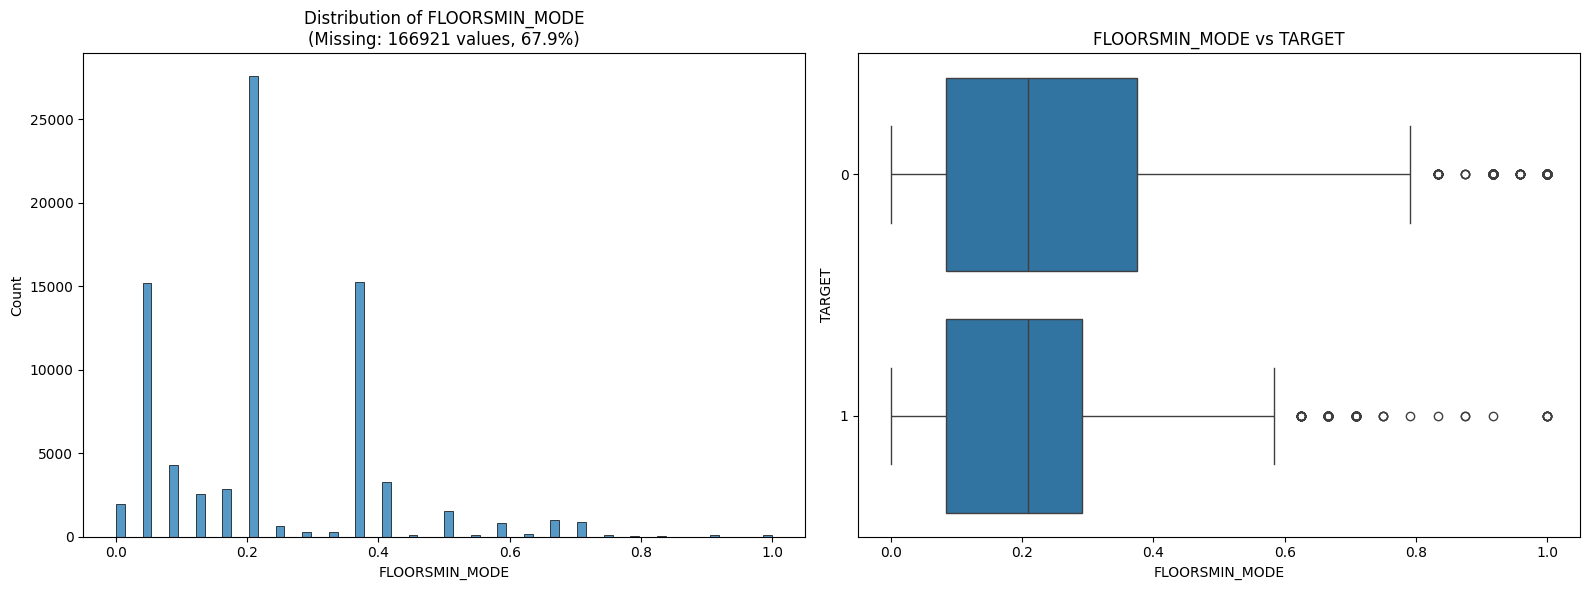

Graficos de la variable: LANDAREA_MODE


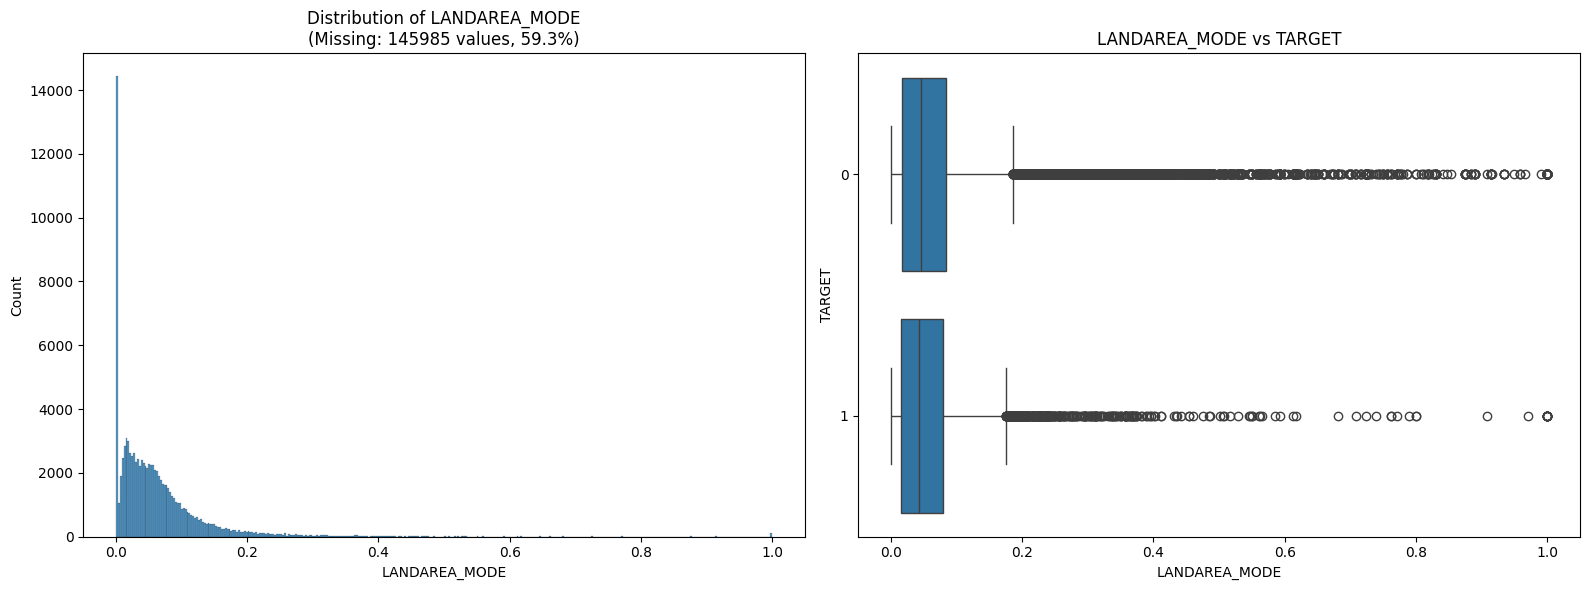

Graficos de la variable: LIVINGAPARTMENTS_MODE


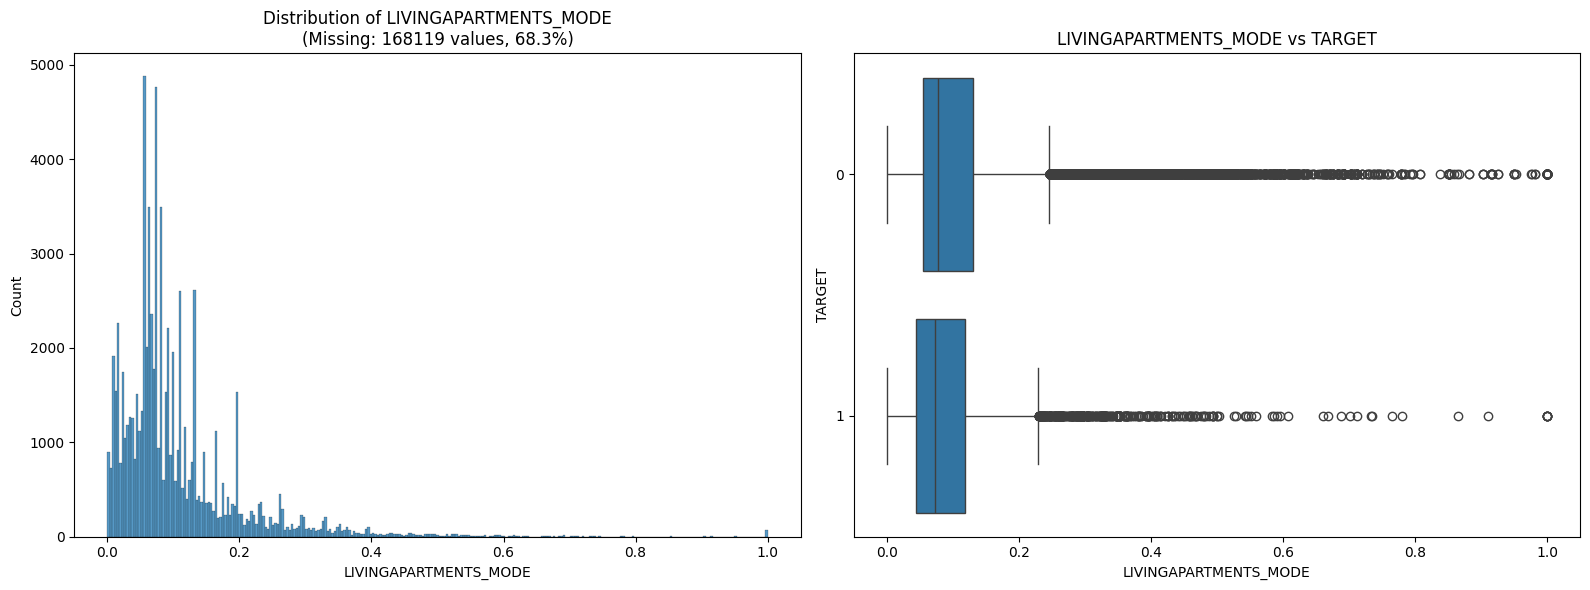

Graficos de la variable: LIVINGAREA_MODE


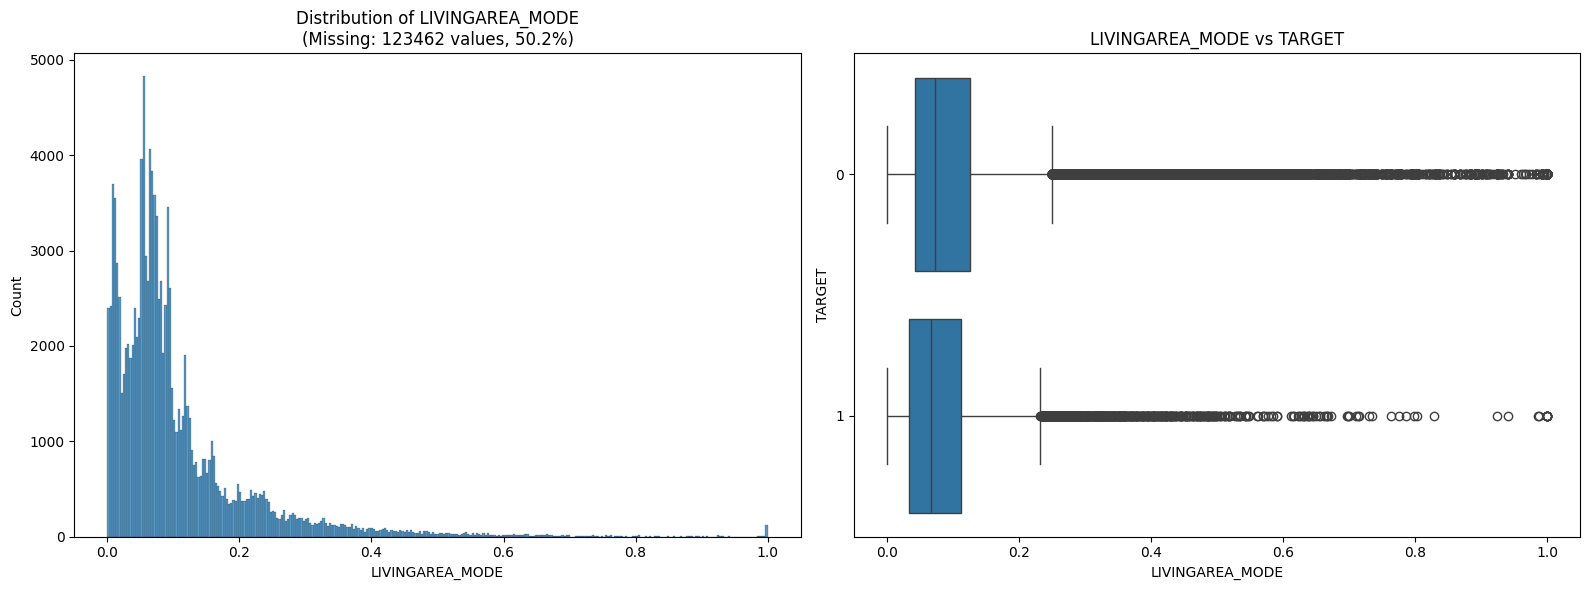

Graficos de la variable: NONLIVINGAPARTMENTS_MODE


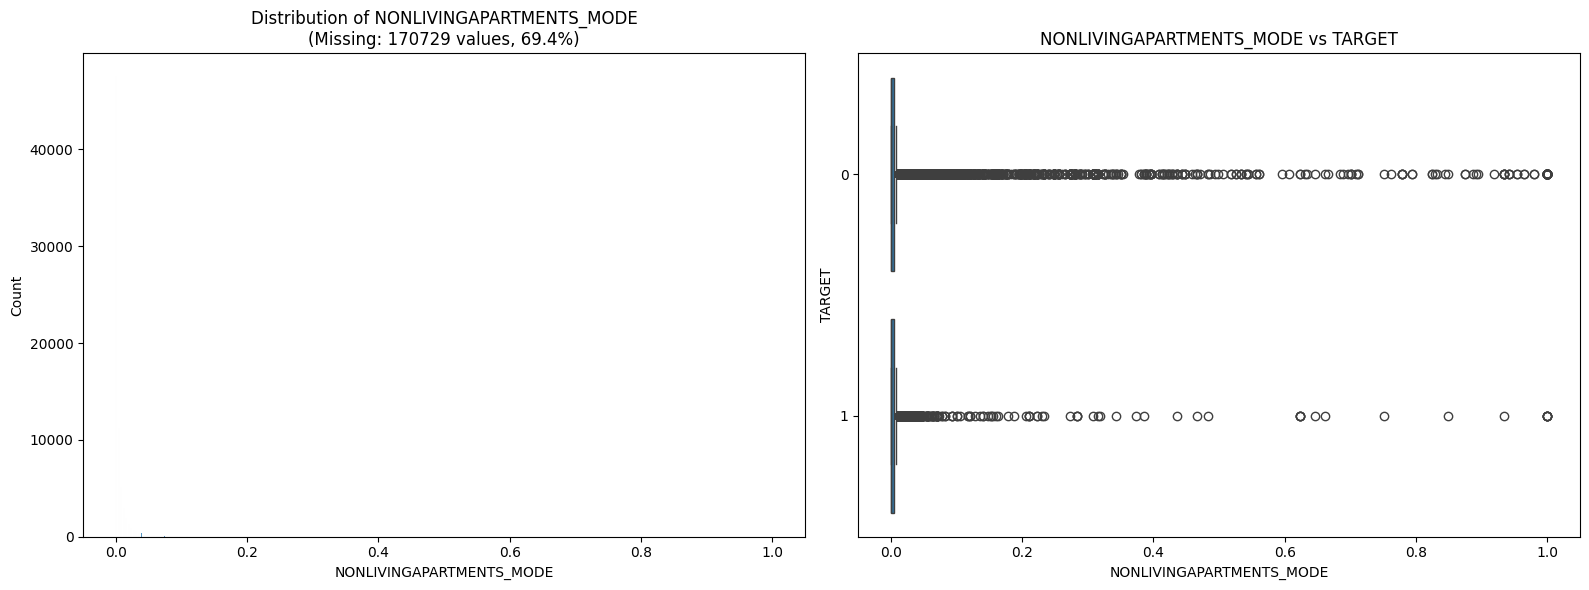

Graficos de la variable: NONLIVINGAREA_MODE


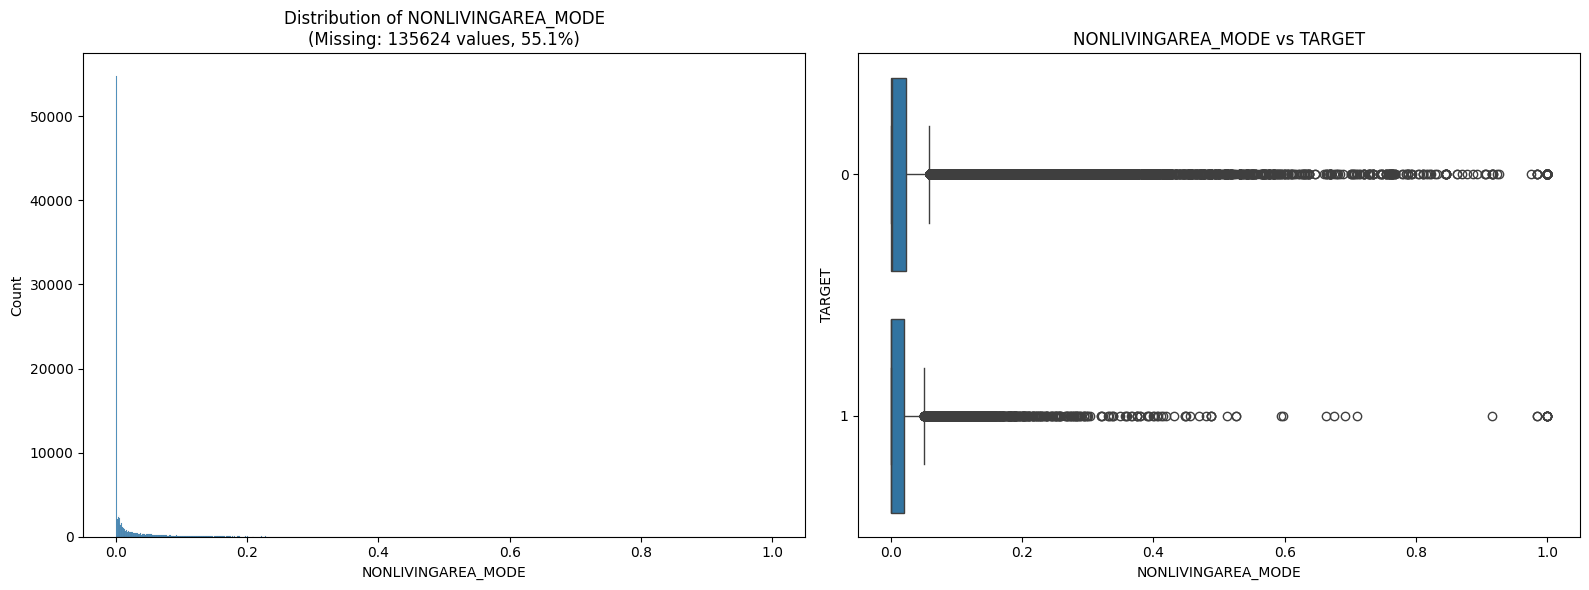

Graficos de la variable: APARTMENTS_MEDI


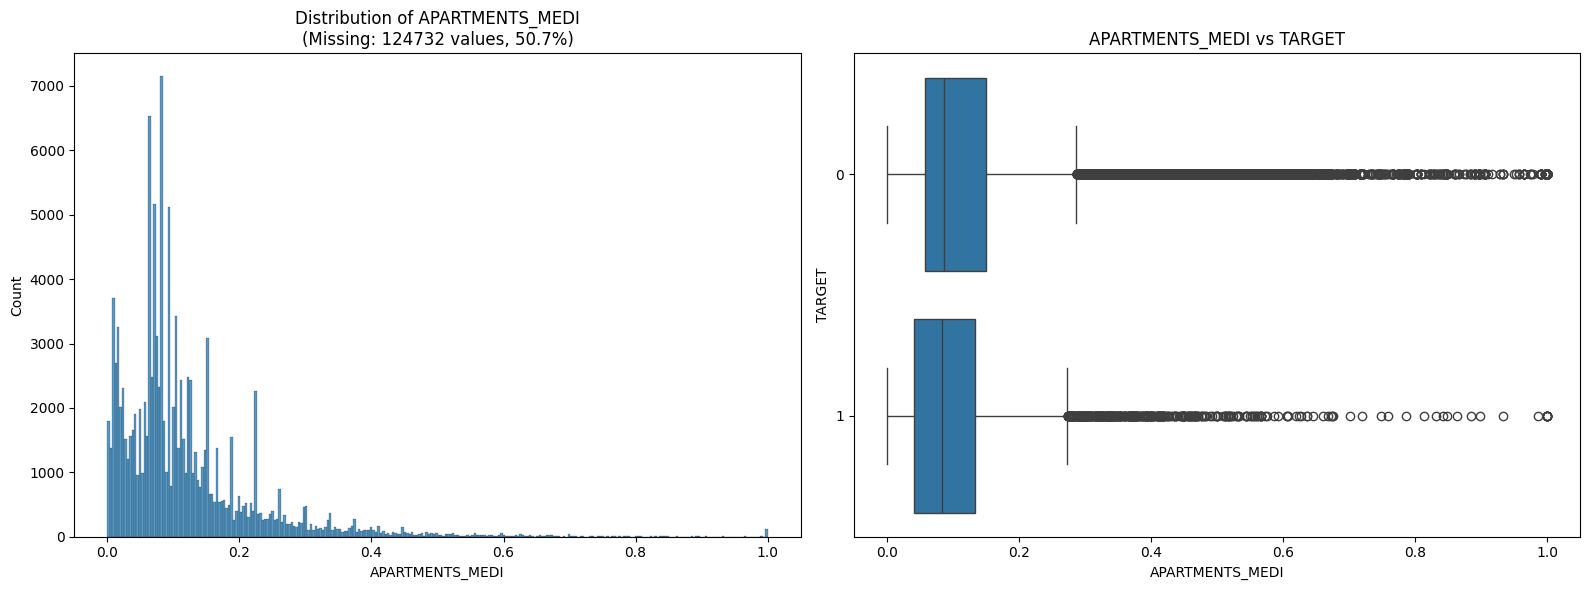

Graficos de la variable: BASEMENTAREA_MEDI


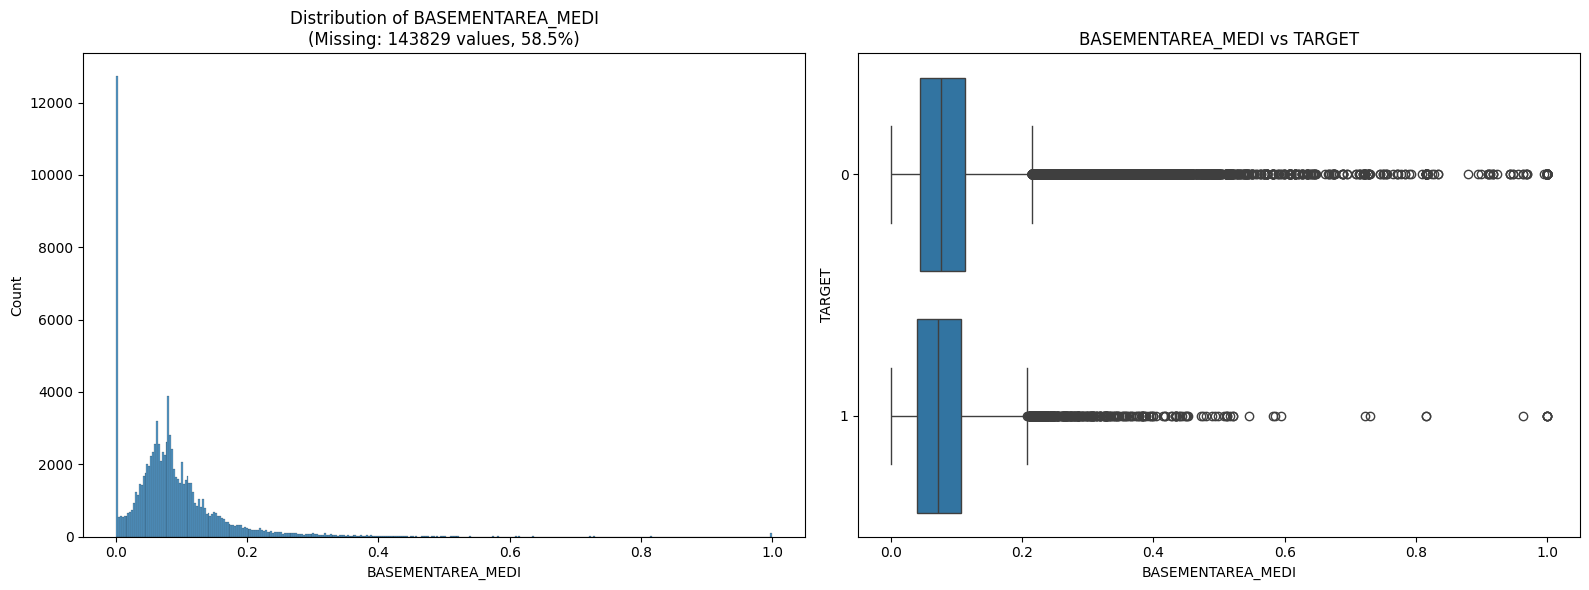

Graficos de la variable: YEARS_BEGINEXPLUATATION_MEDI


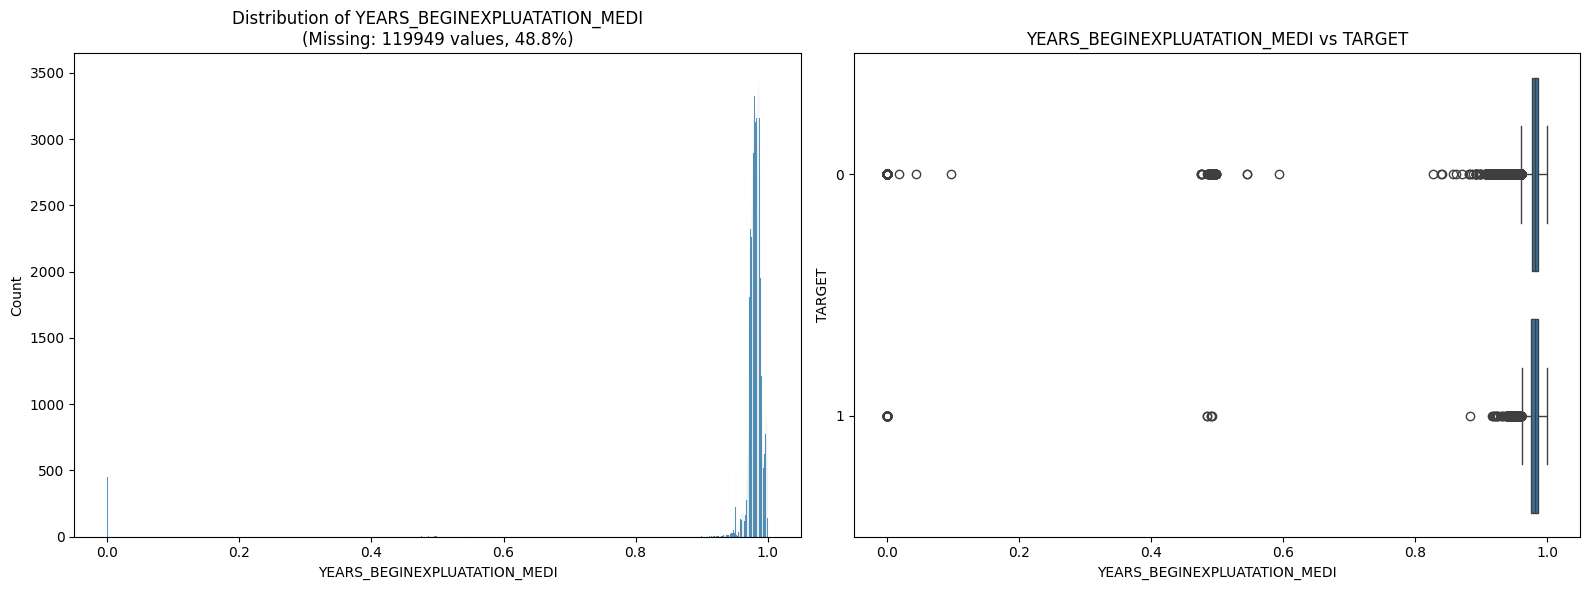

Graficos de la variable: YEARS_BUILD_MEDI


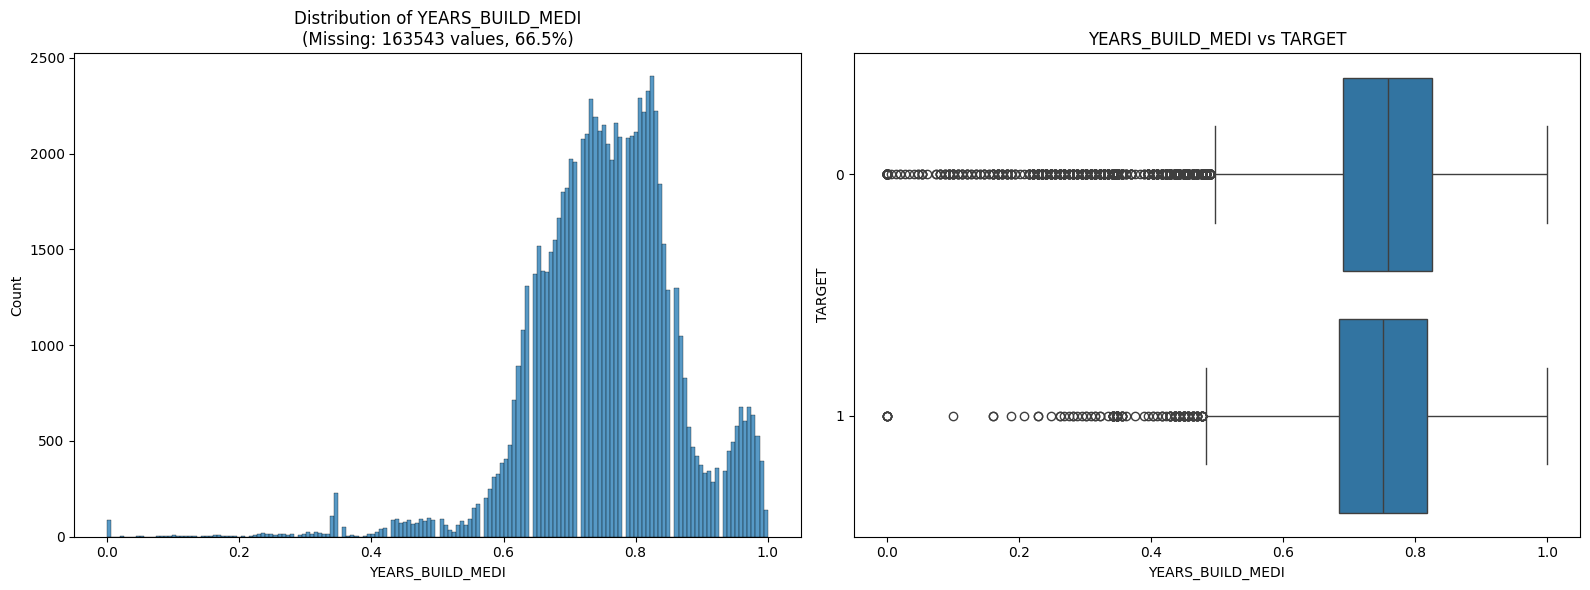

Graficos de la variable: COMMONAREA_MEDI


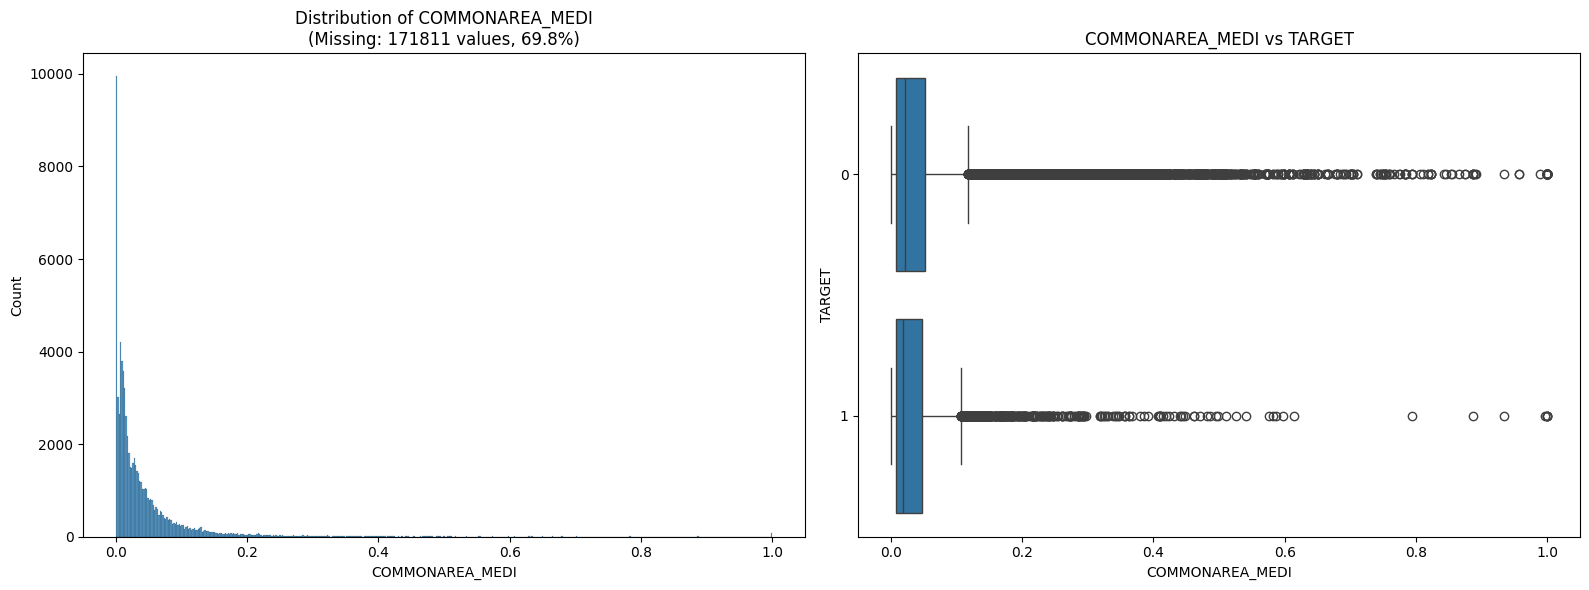

Graficos de la variable: ELEVATORS_MEDI


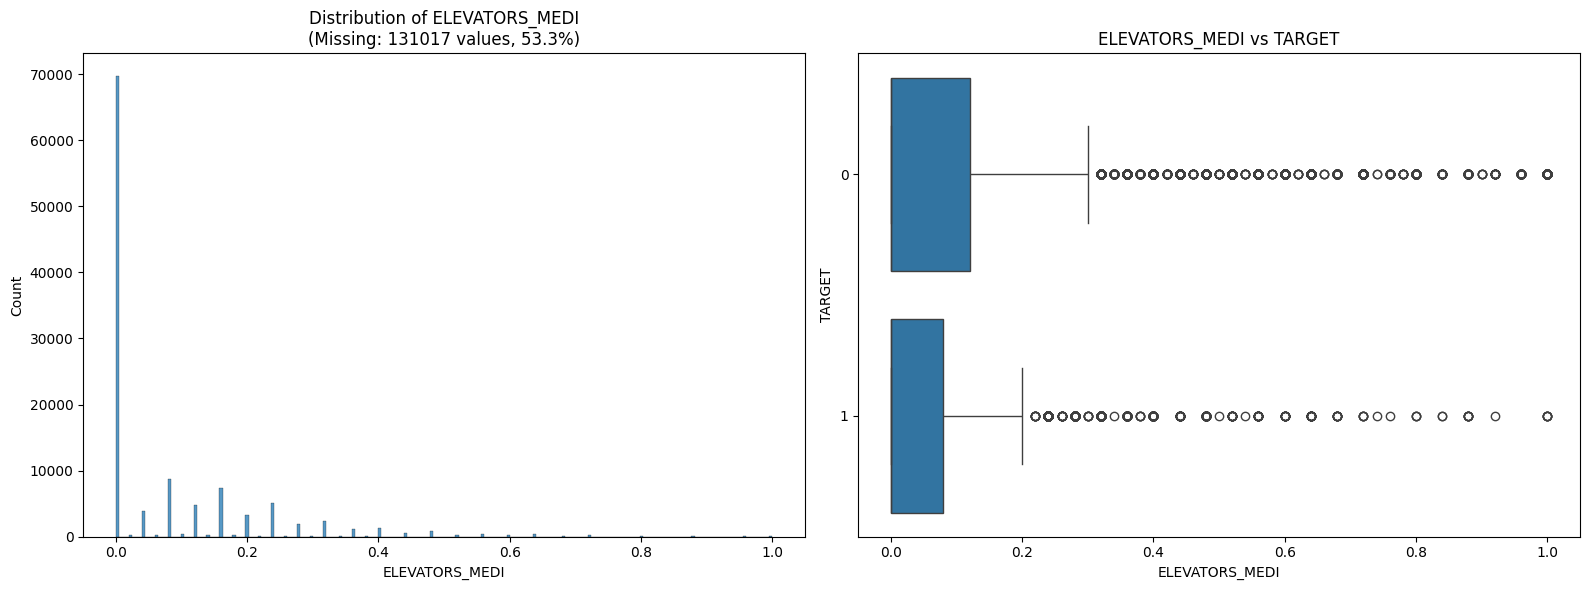

Graficos de la variable: ENTRANCES_MEDI


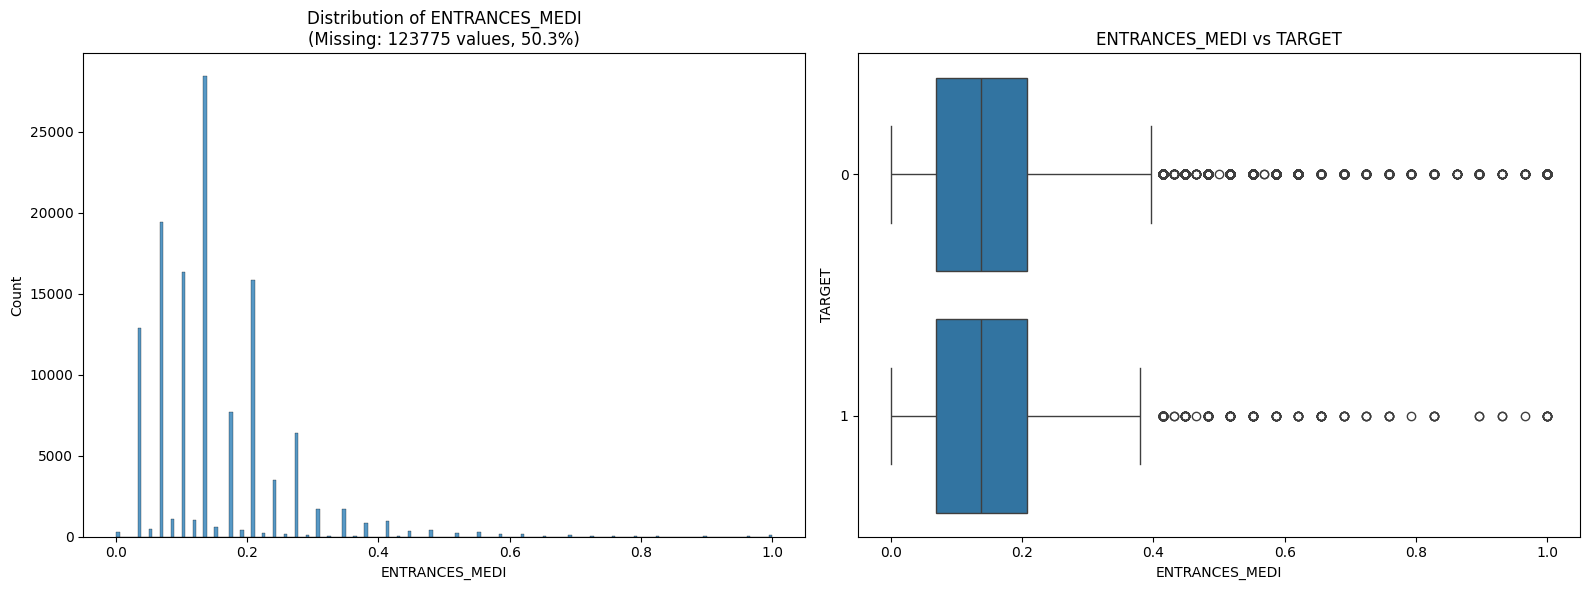

Graficos de la variable: FLOORSMAX_MEDI


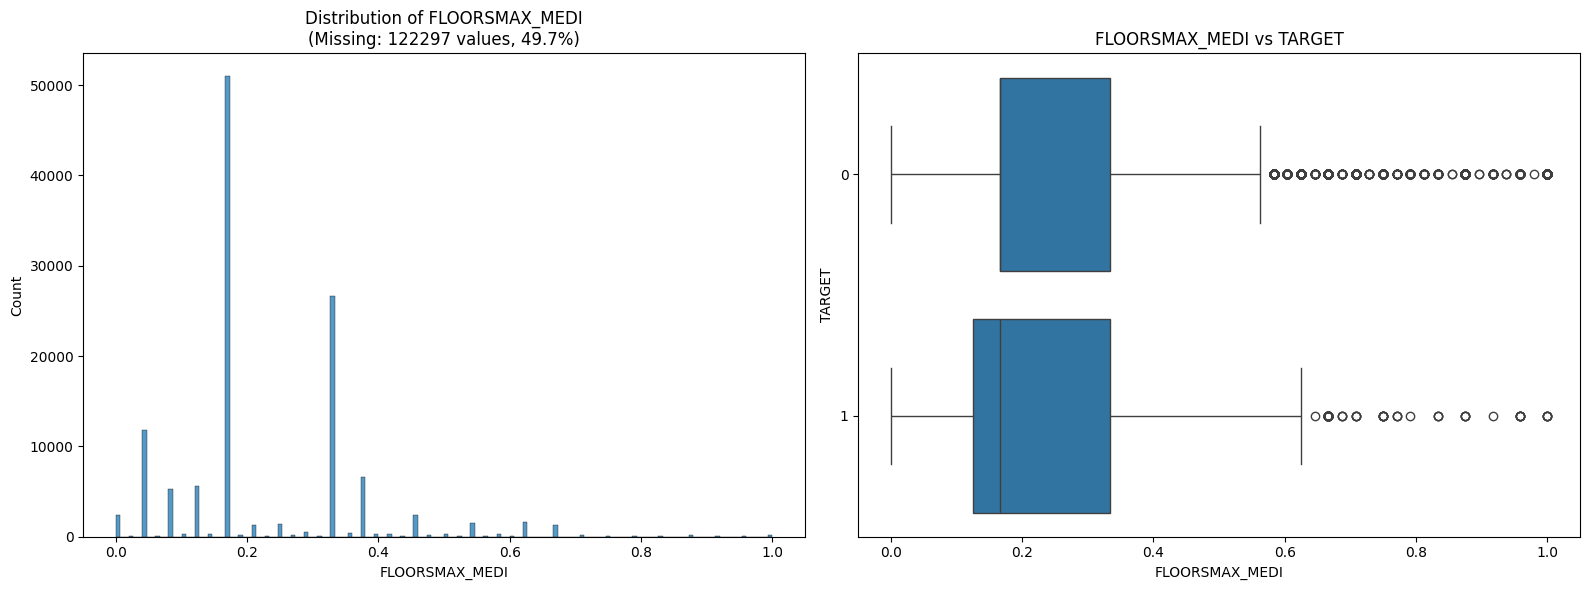

Graficos de la variable: FLOORSMIN_MEDI


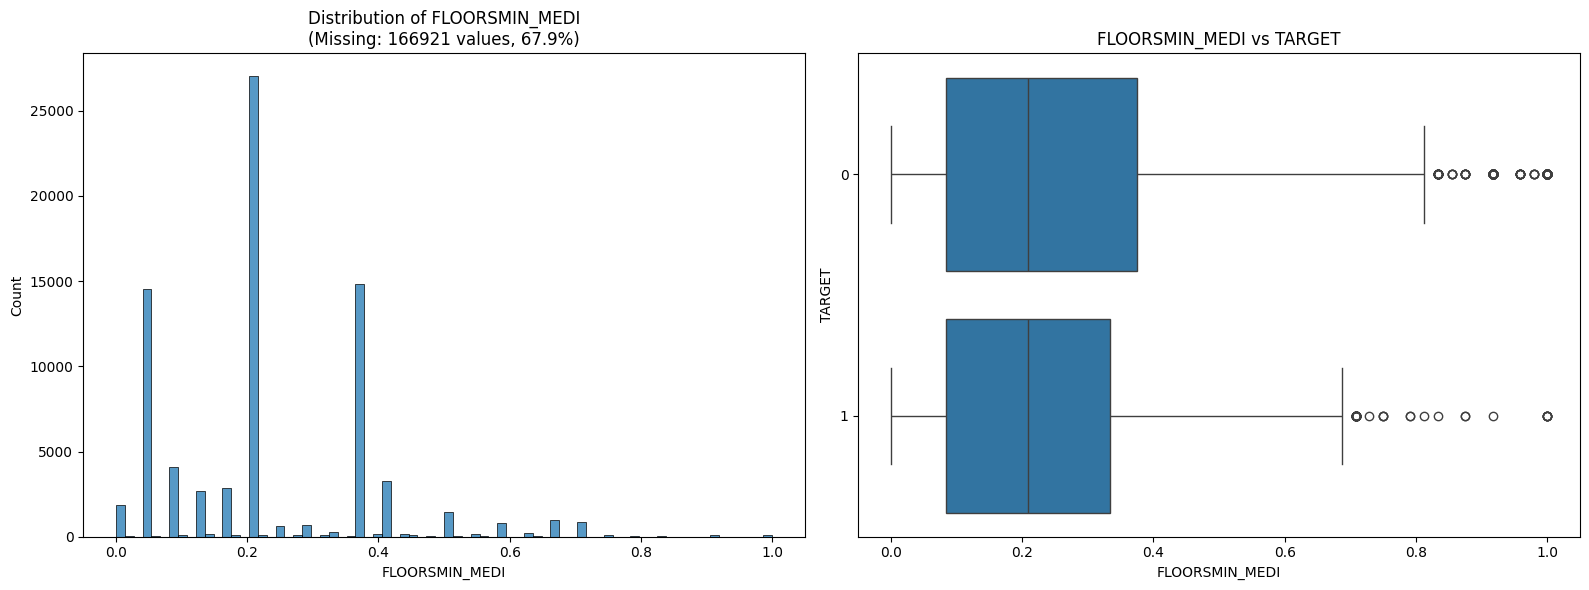

Graficos de la variable: LANDAREA_MEDI


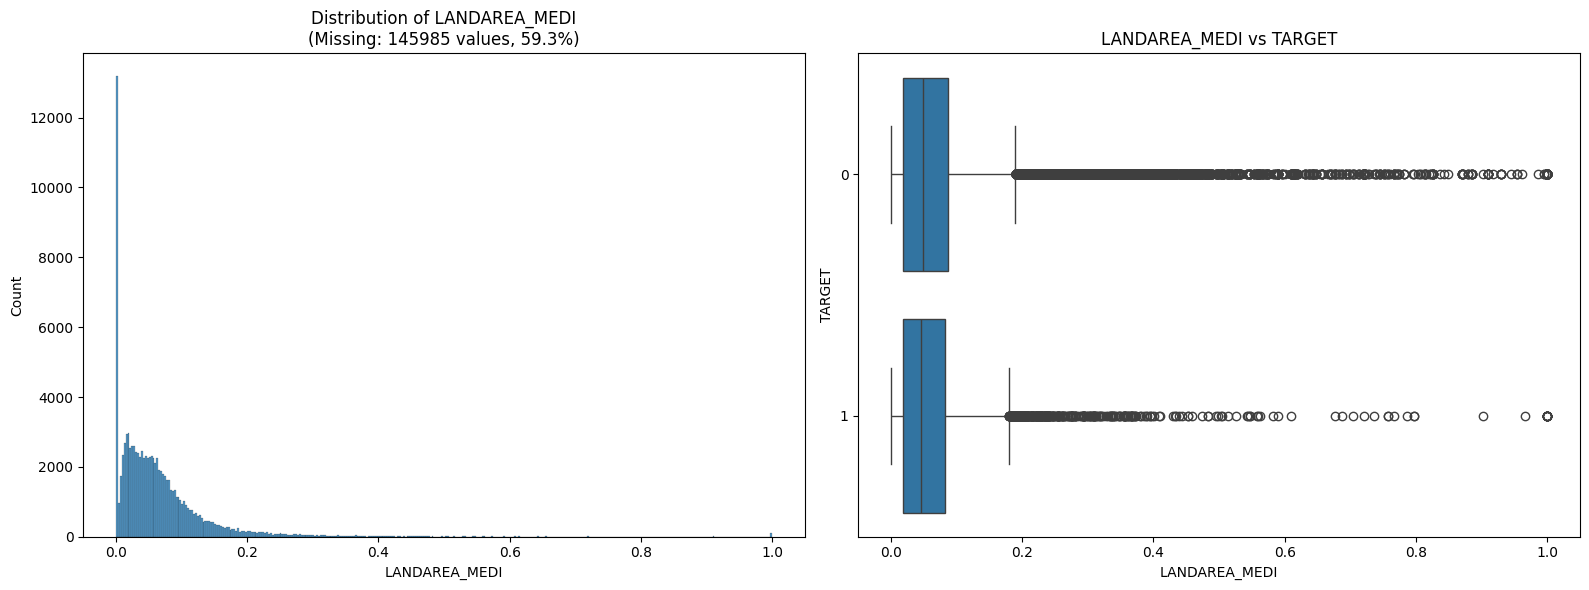

Graficos de la variable: LIVINGAPARTMENTS_MEDI


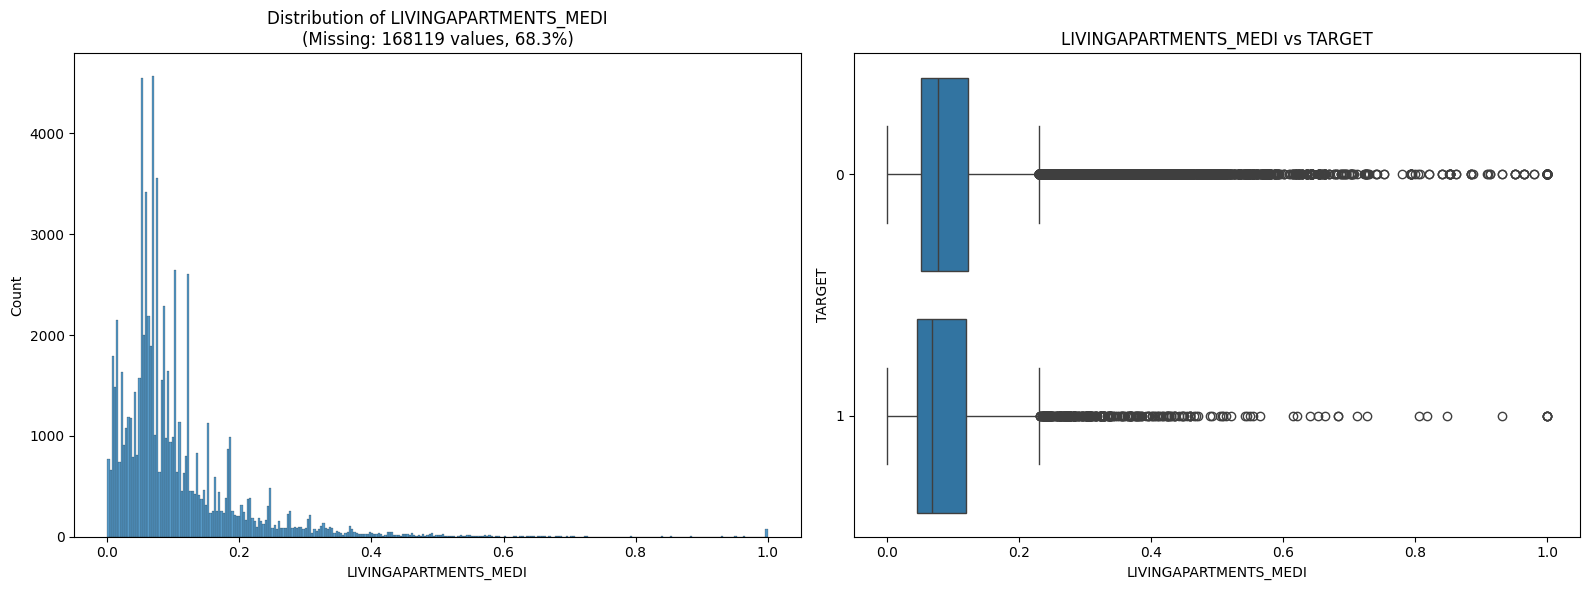

Graficos de la variable: LIVINGAREA_MEDI


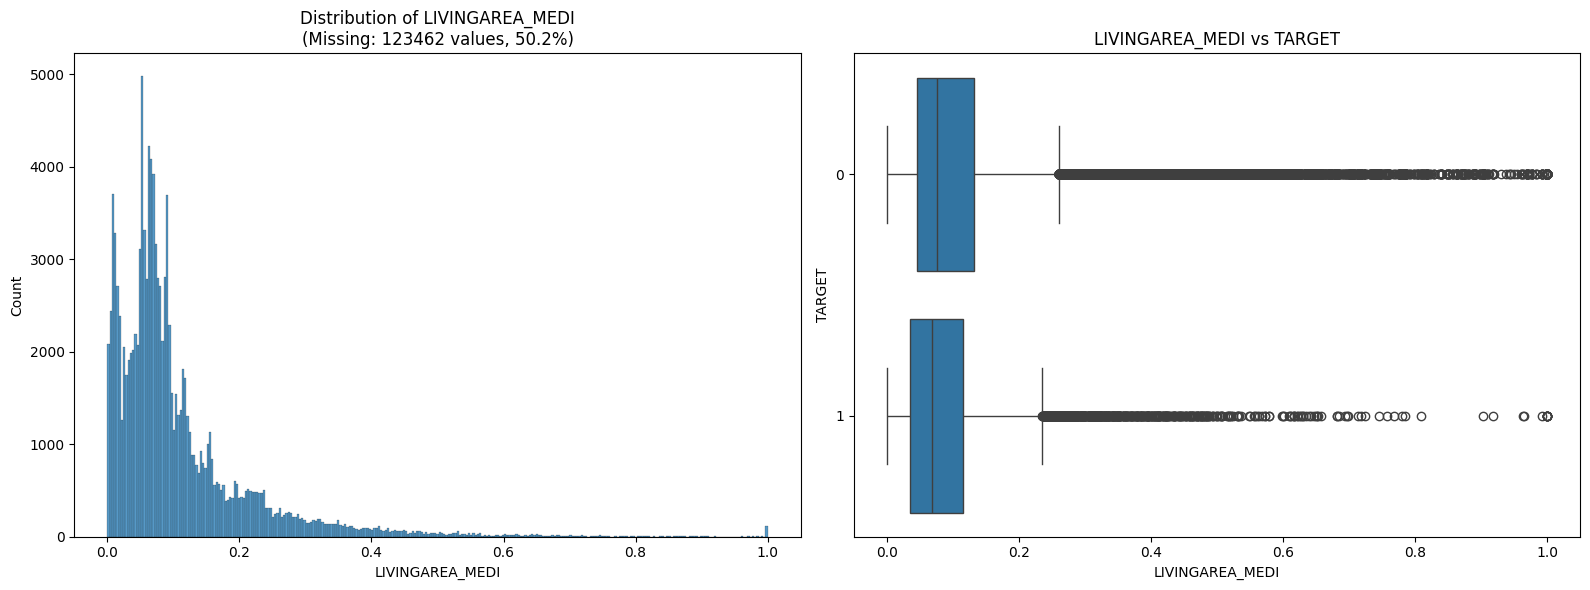

Graficos de la variable: NONLIVINGAPARTMENTS_MEDI


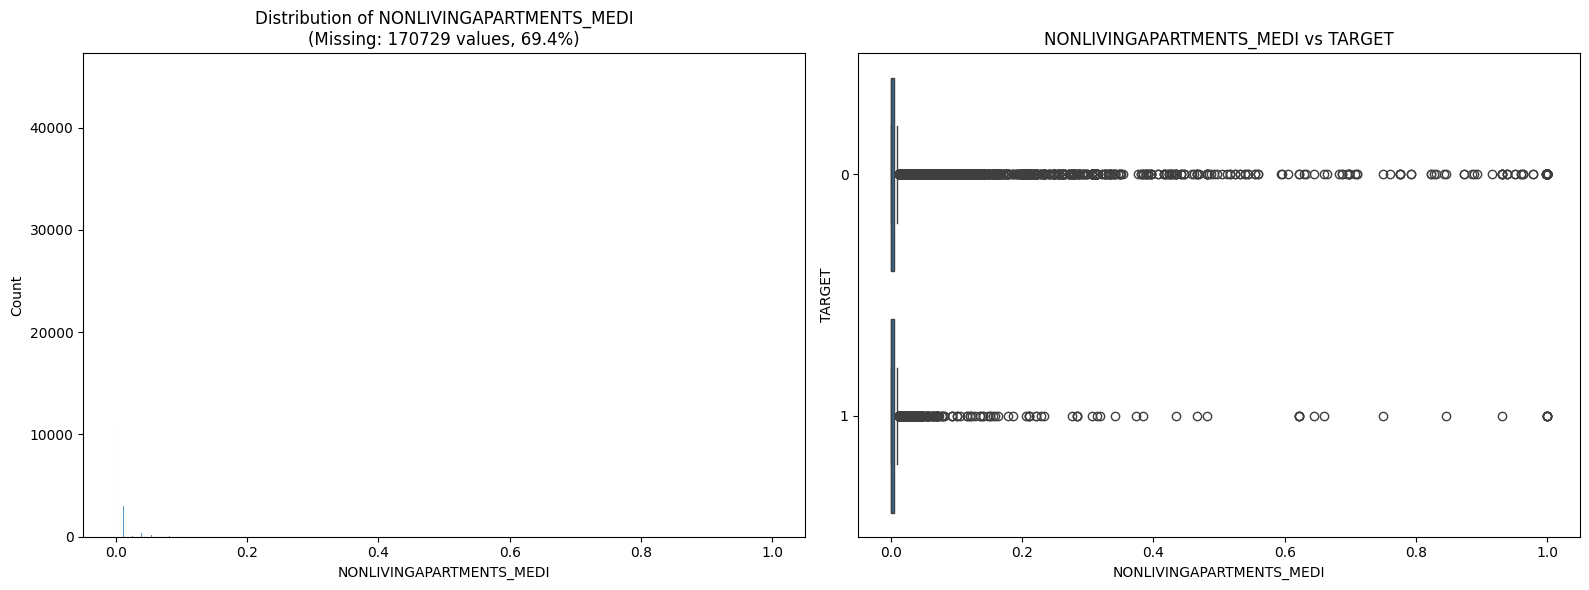

Graficos de la variable: NONLIVINGAREA_MEDI


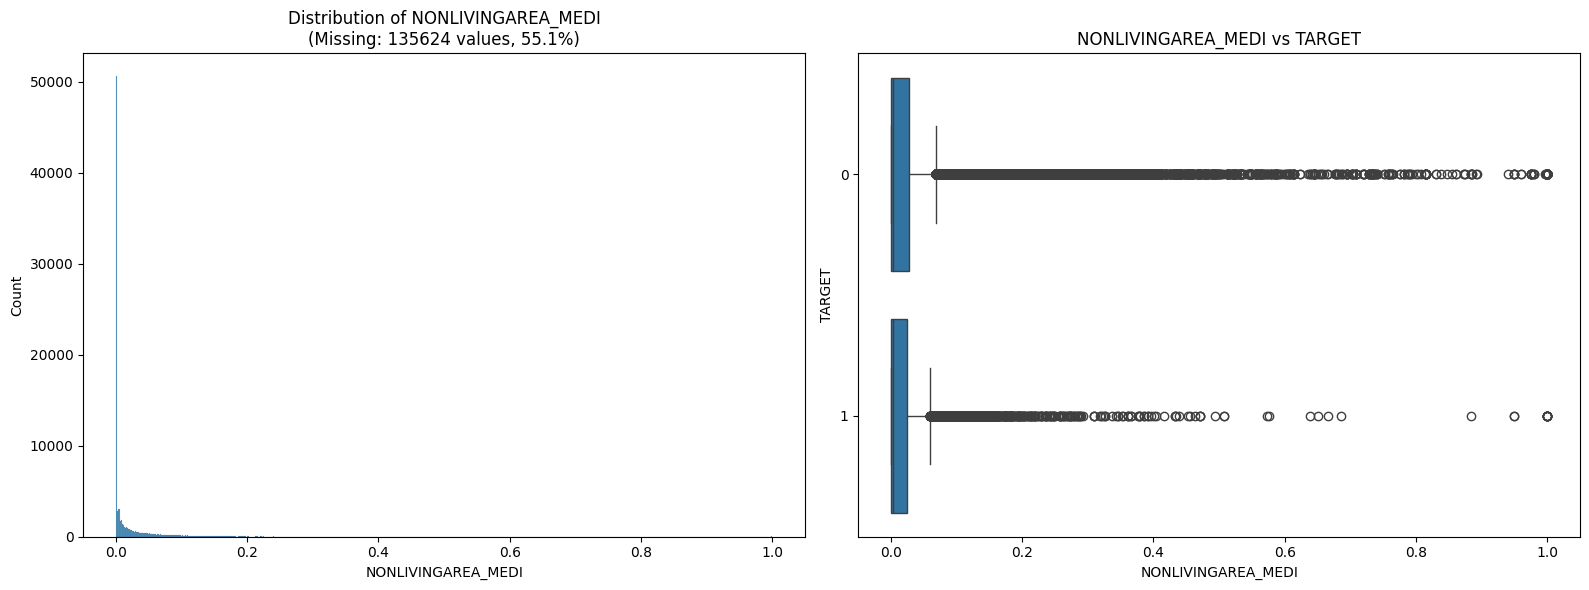

Graficos de la variable: FONDKAPREMONT_MODE


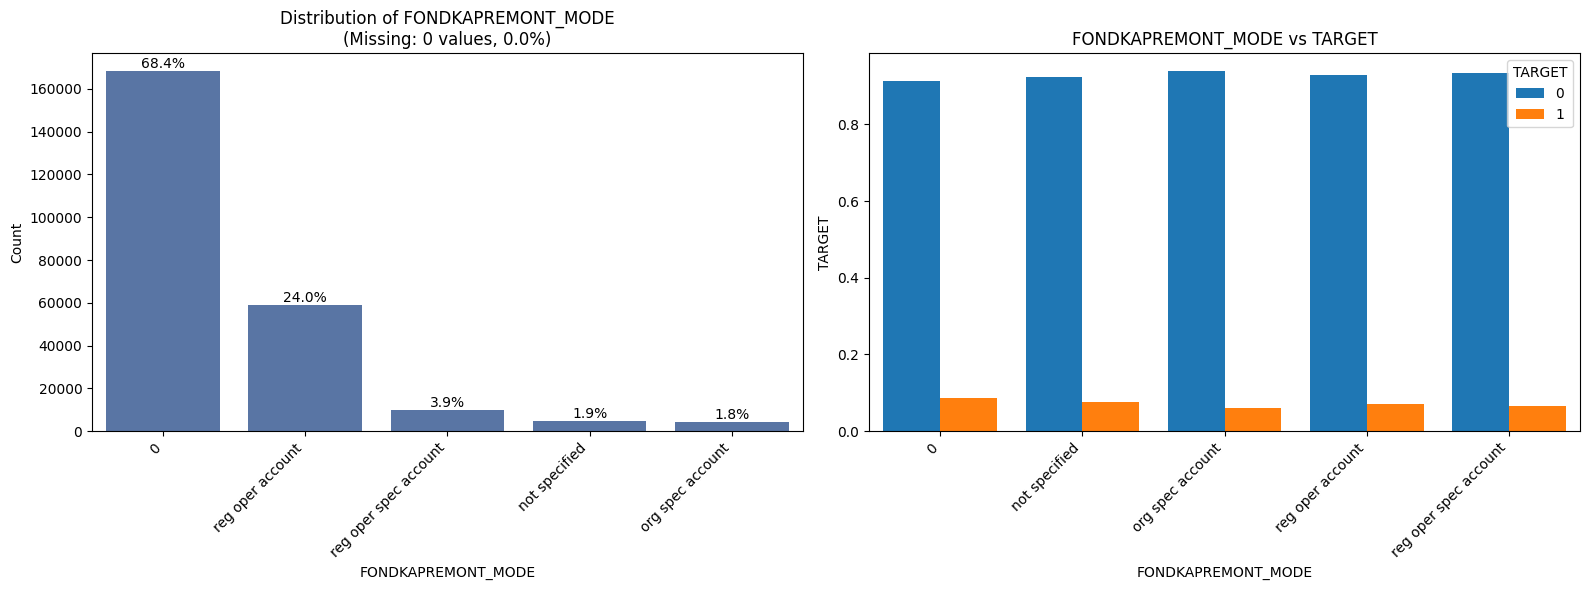

Graficos de la variable: HOUSETYPE_MODE


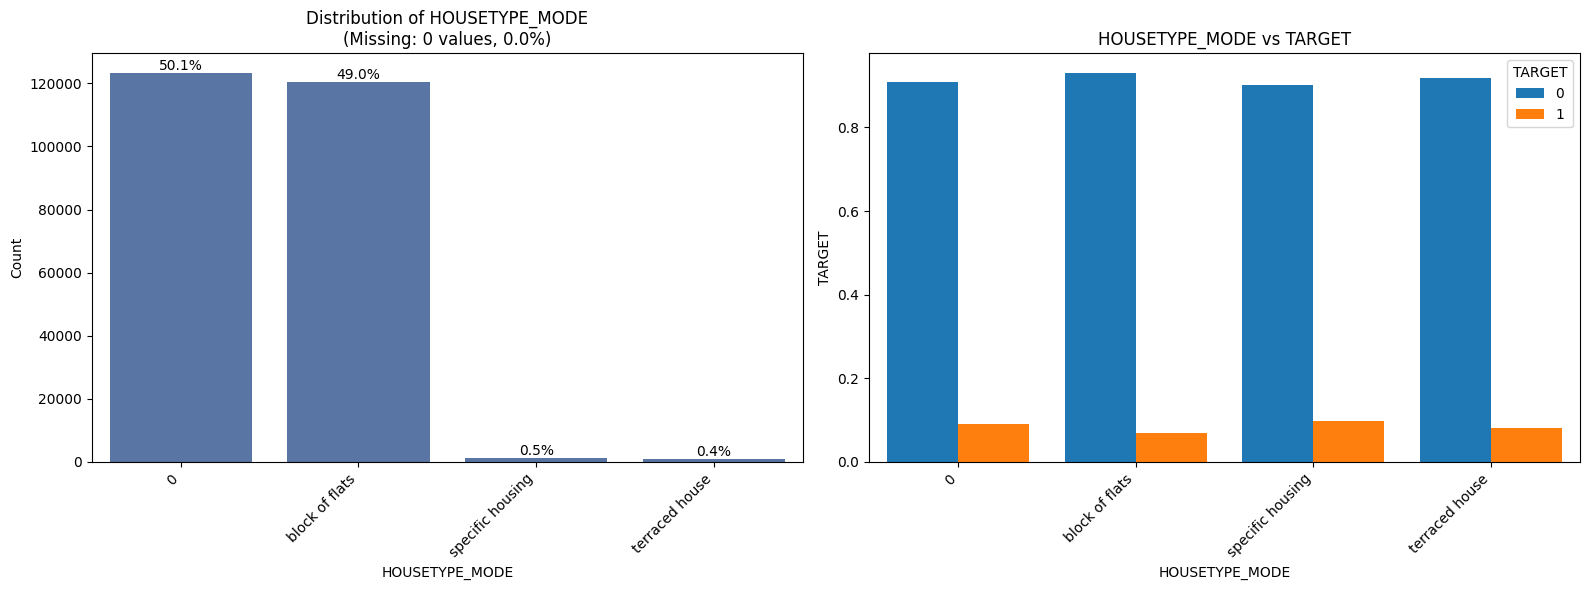

Graficos de la variable: TOTALAREA_MODE


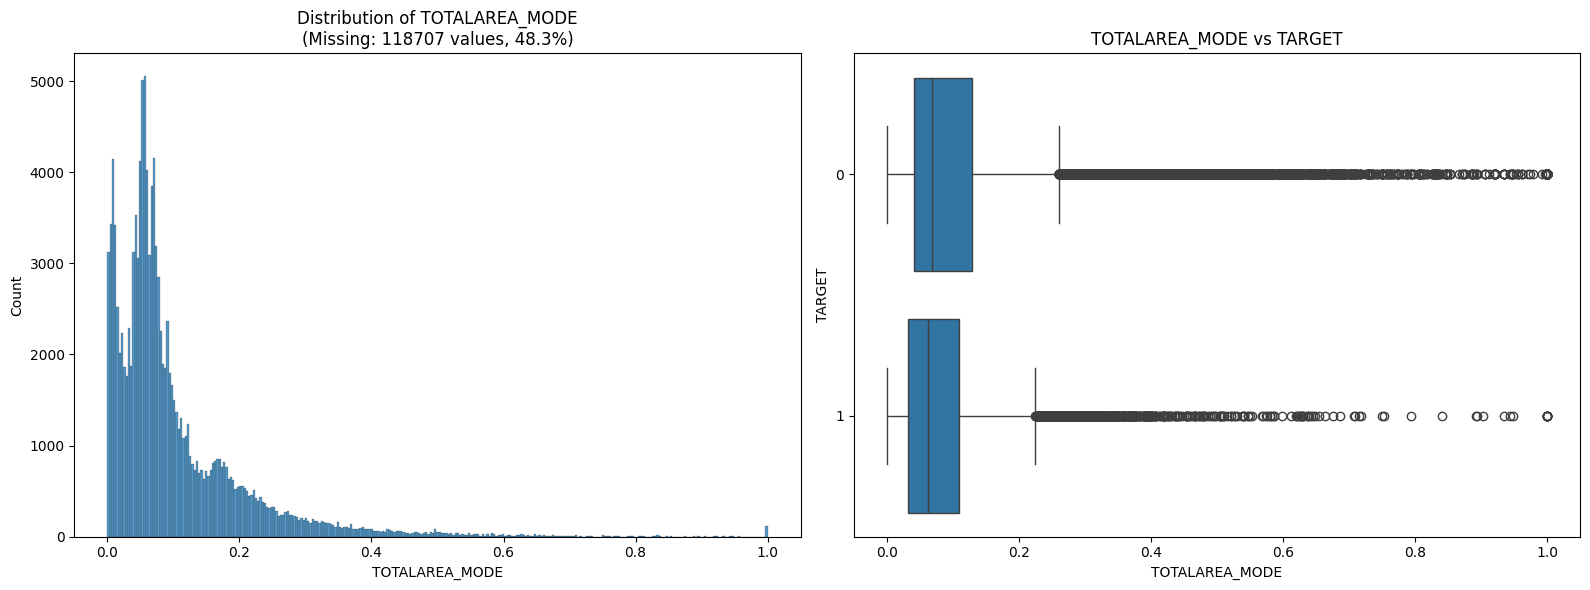

Graficos de la variable: WALLSMATERIAL_MODE


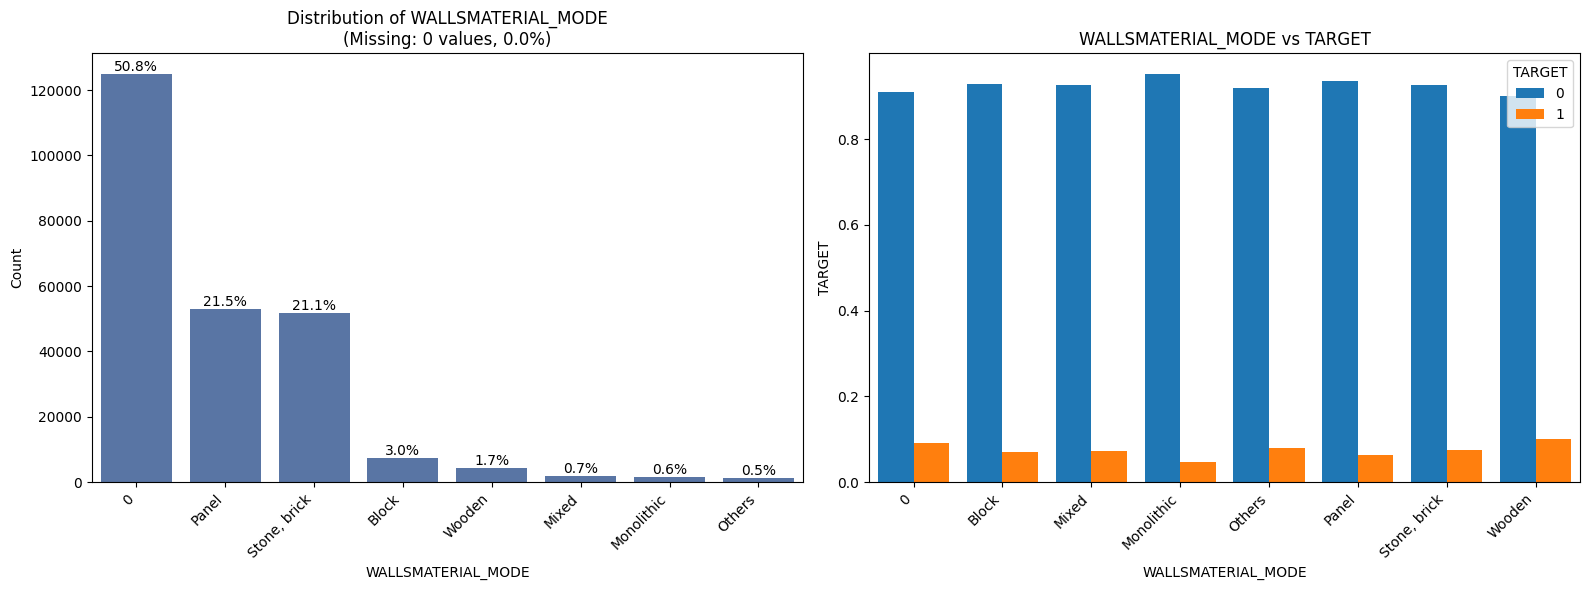

Graficos de la variable: EMERGENCYSTATE_MODE


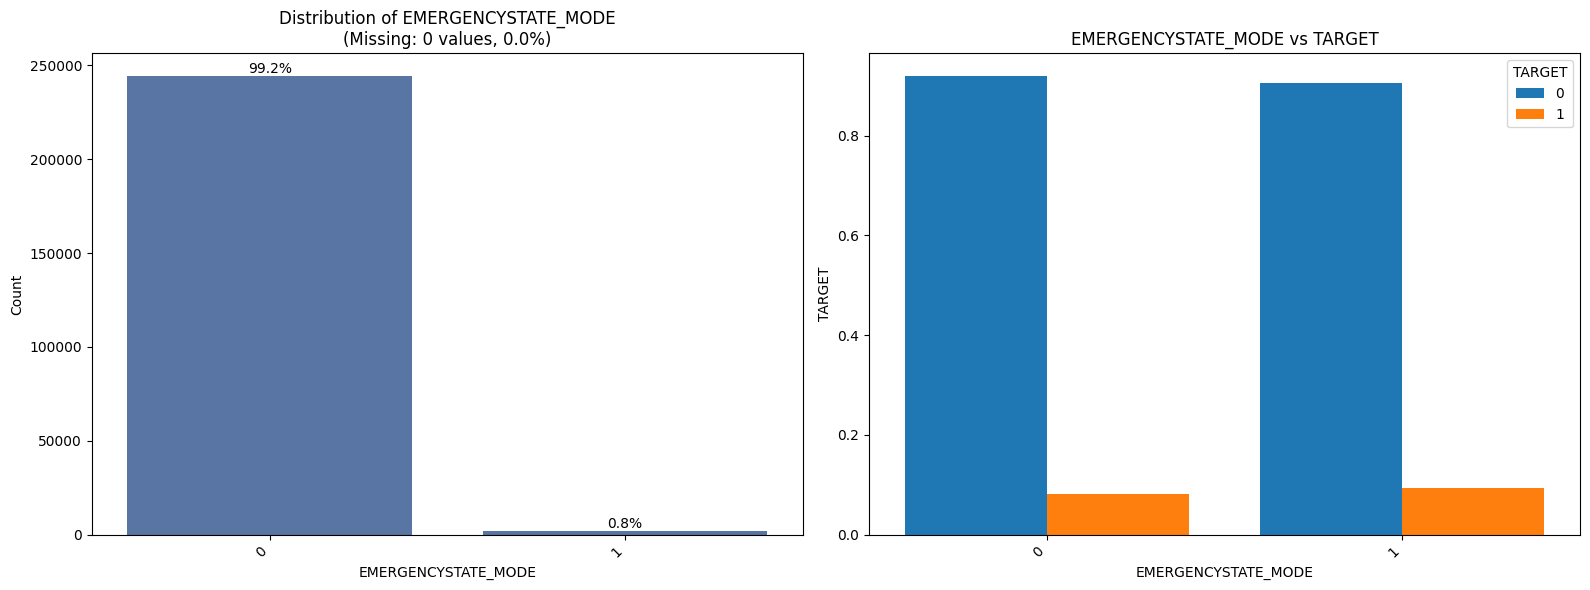

Graficos de la variable: OBS_30_CNT_SOCIAL_CIRCLE


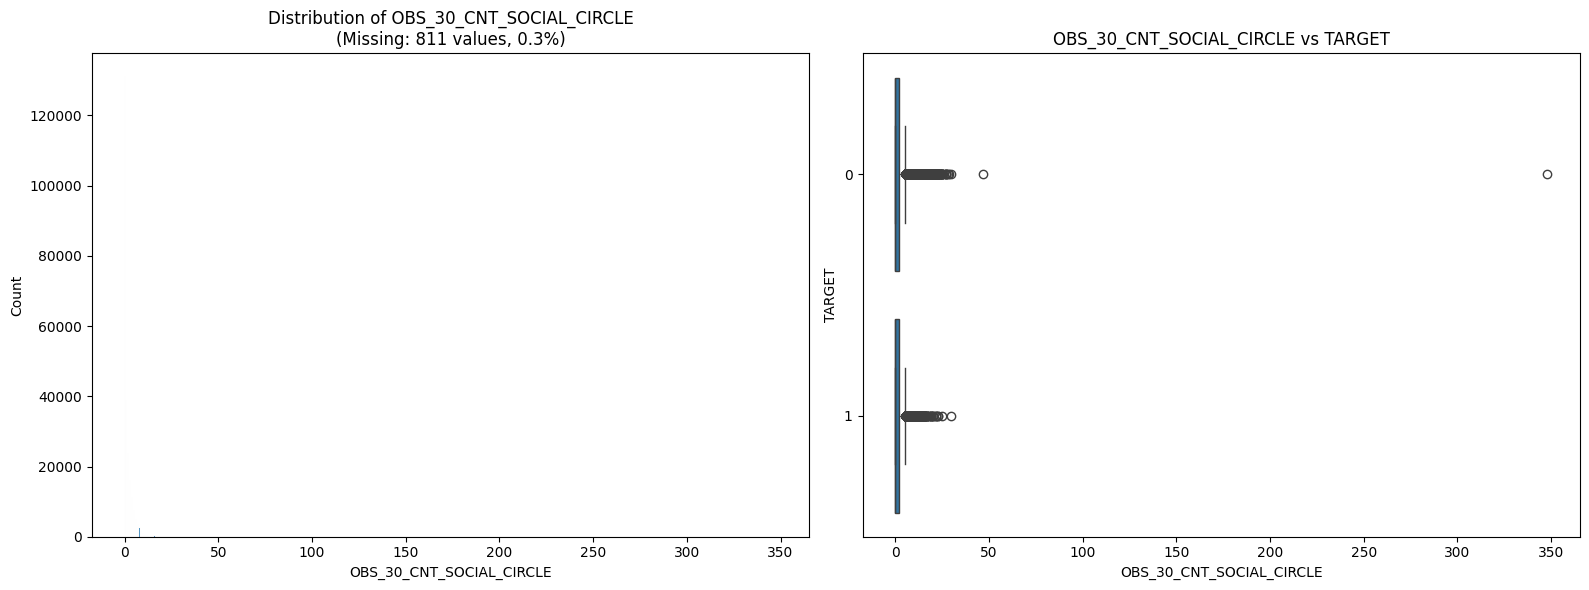

Graficos de la variable: DEF_30_CNT_SOCIAL_CIRCLE


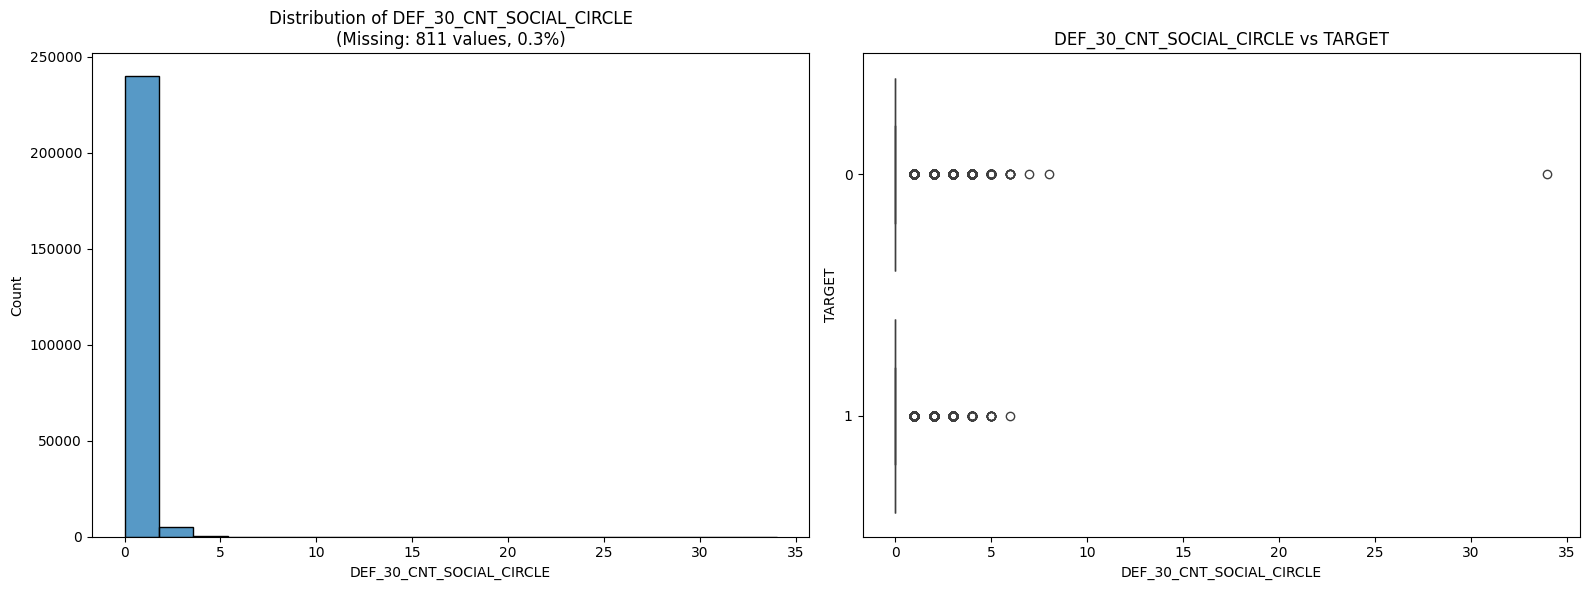

Graficos de la variable: OBS_60_CNT_SOCIAL_CIRCLE


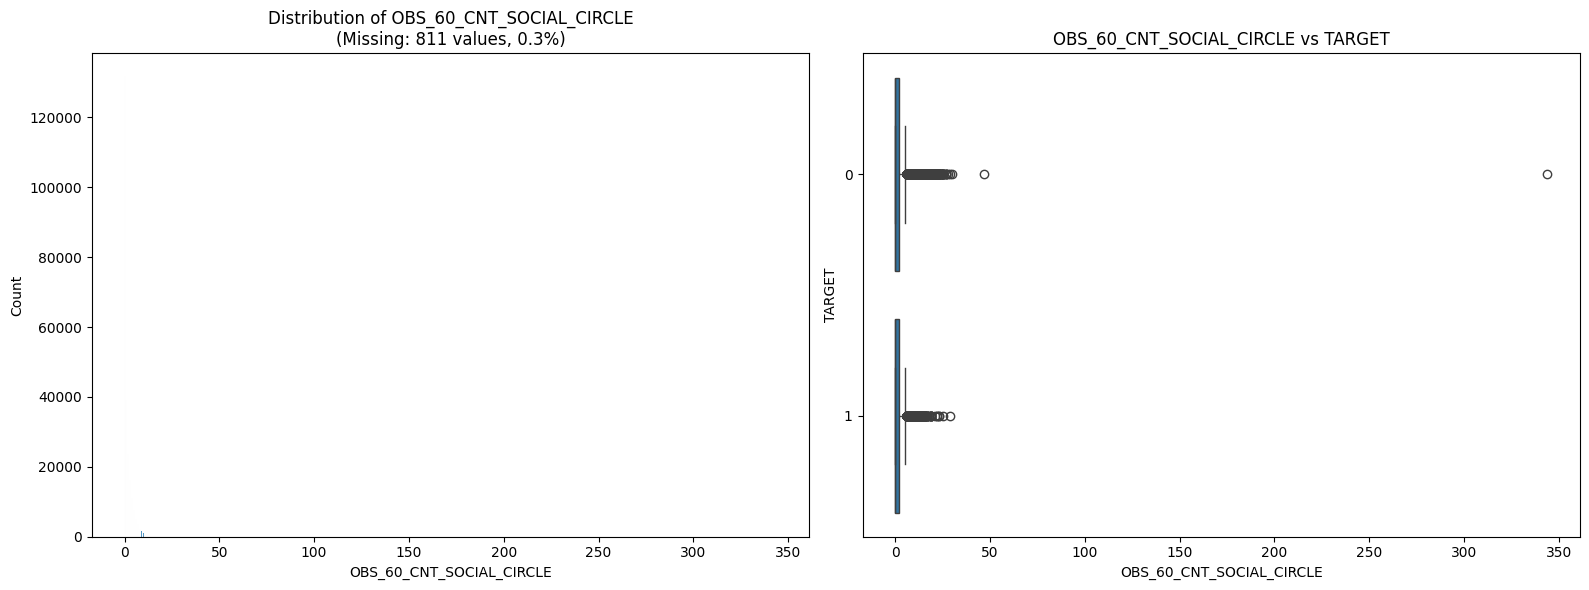

Graficos de la variable: DEF_60_CNT_SOCIAL_CIRCLE


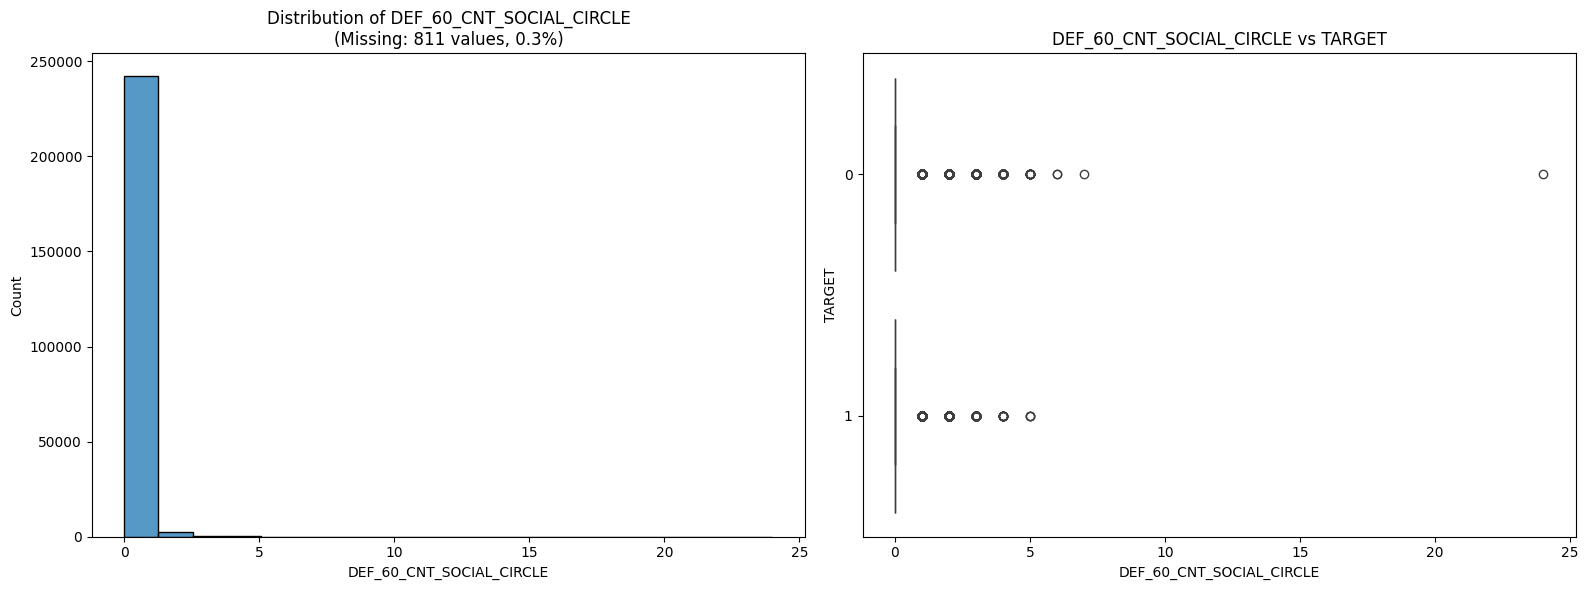

Graficos de la variable: DAYS_LAST_PHONE_CHANGE


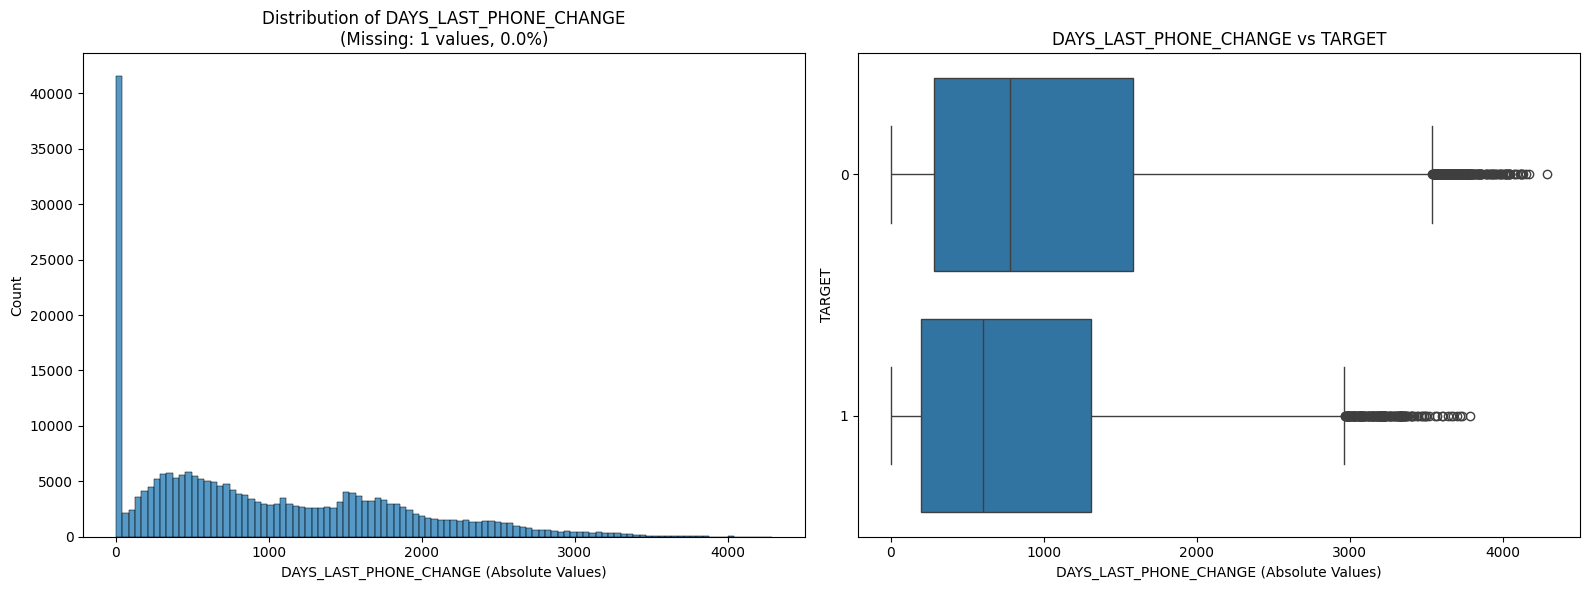

Graficos de la variable: FLAG_DOCUMENT_2


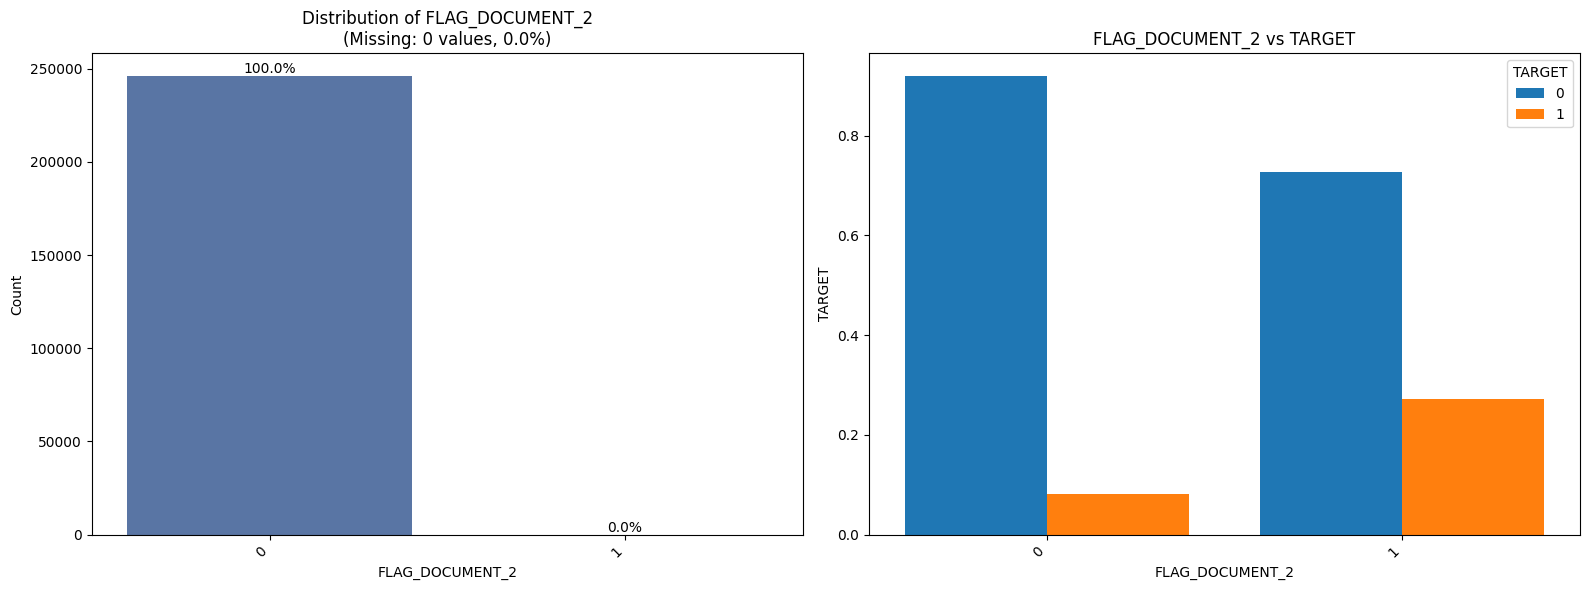

Graficos de la variable: FLAG_DOCUMENT_3


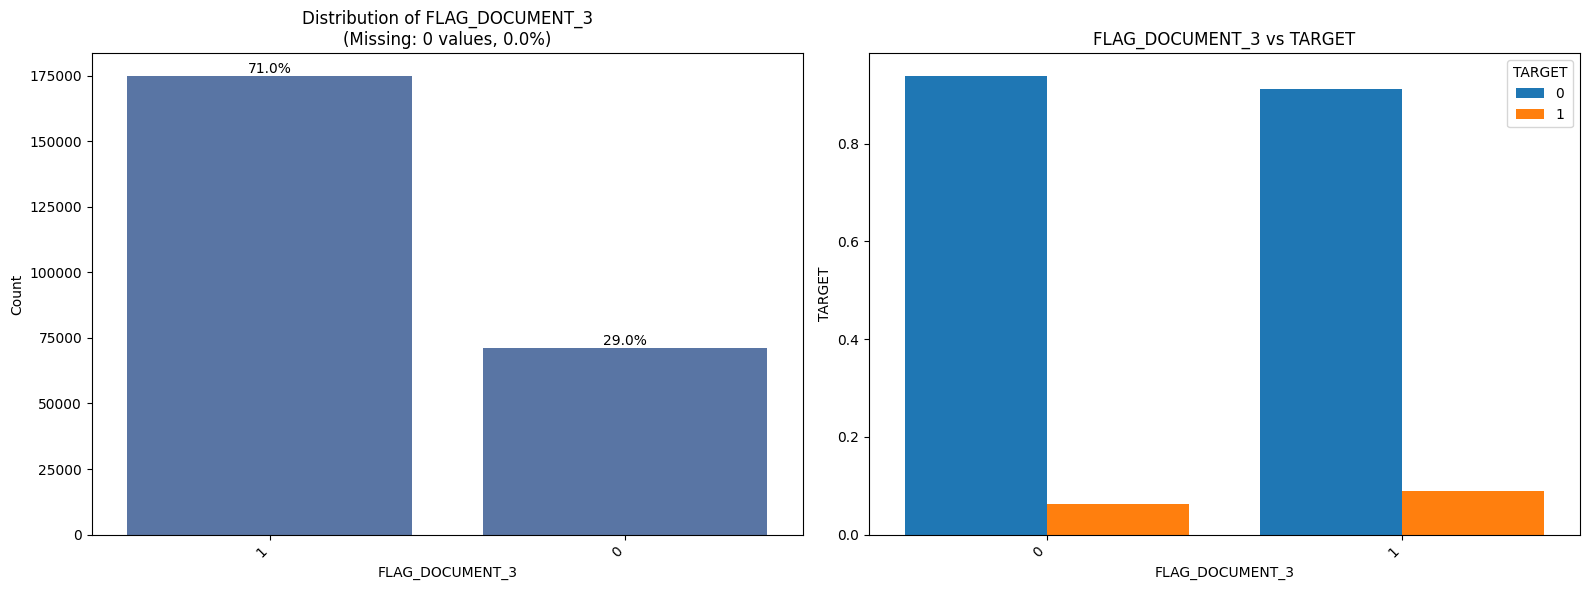

Graficos de la variable: FLAG_DOCUMENT_4


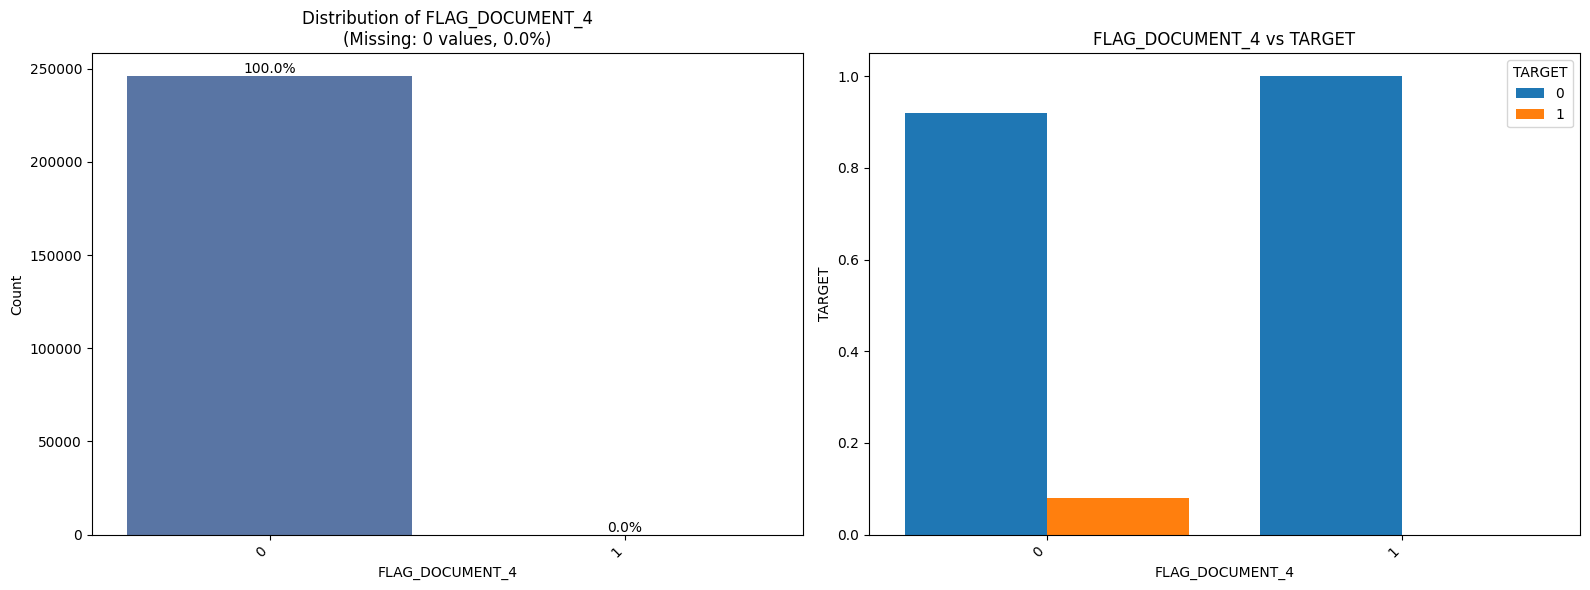

Graficos de la variable: FLAG_DOCUMENT_5


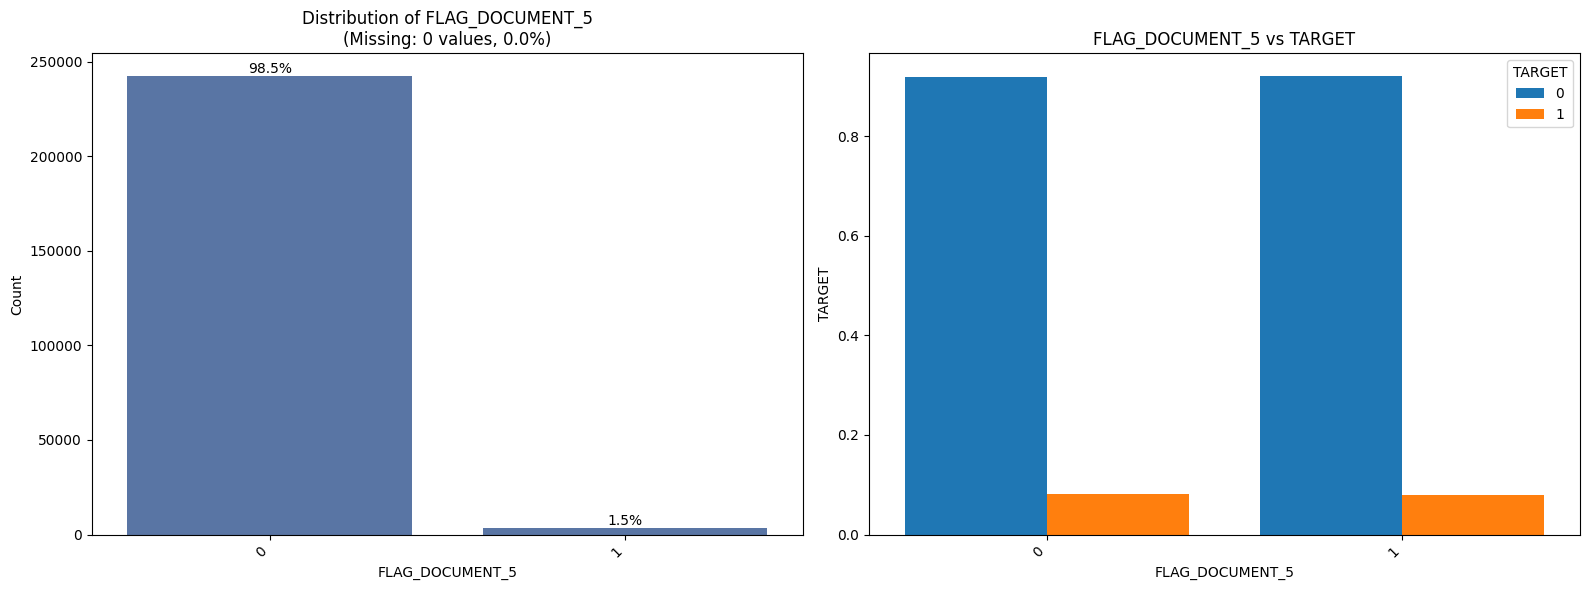

Graficos de la variable: FLAG_DOCUMENT_6


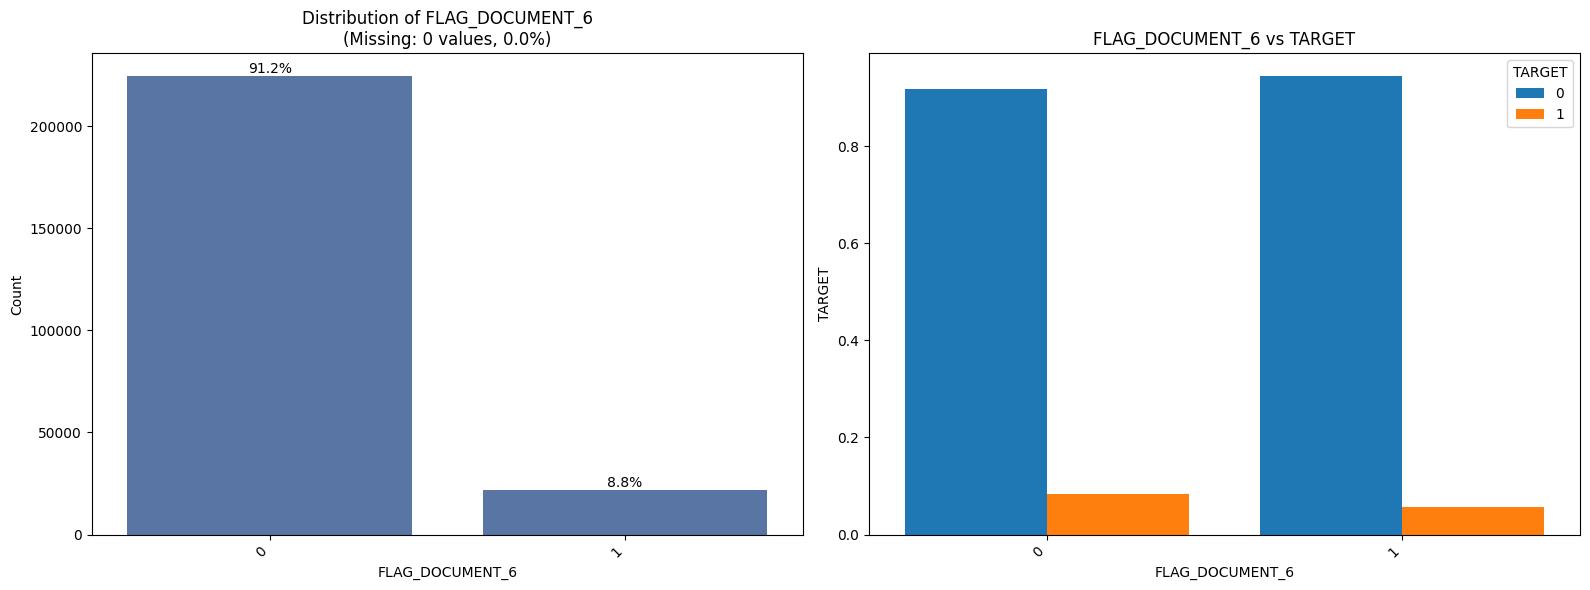

Graficos de la variable: FLAG_DOCUMENT_7


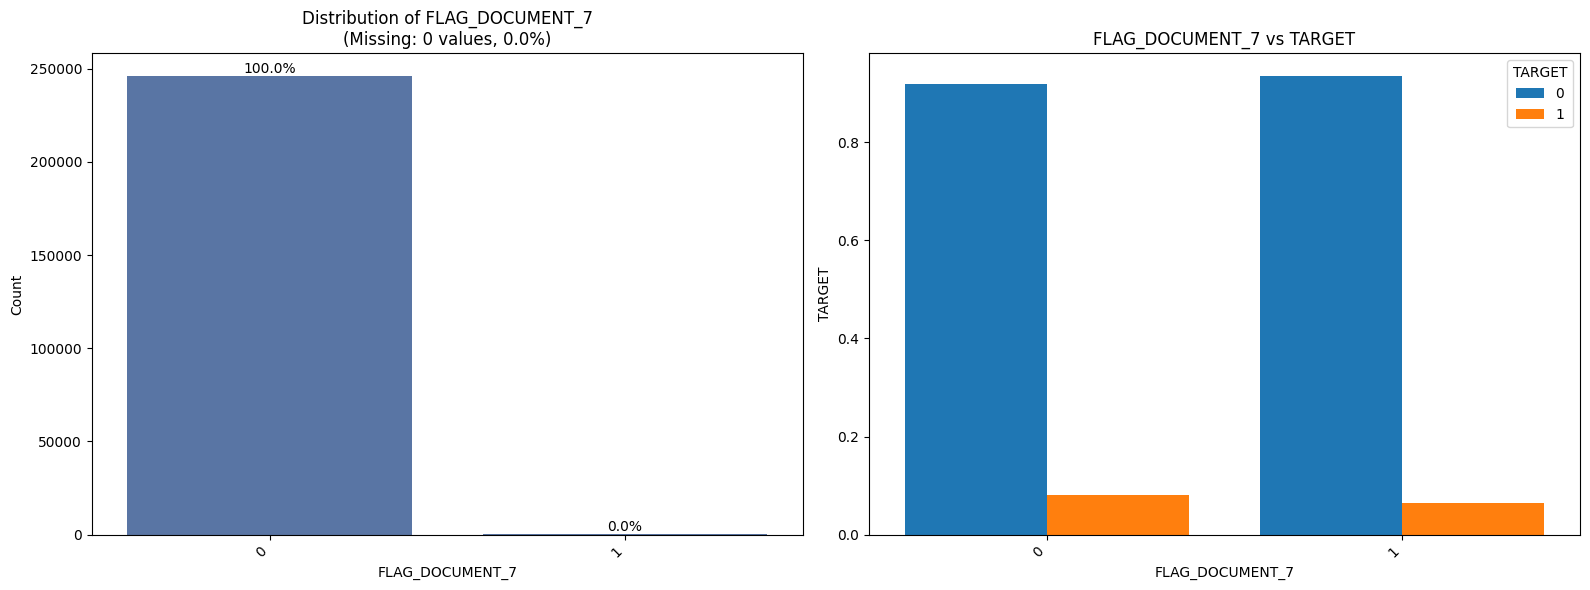

Graficos de la variable: FLAG_DOCUMENT_8


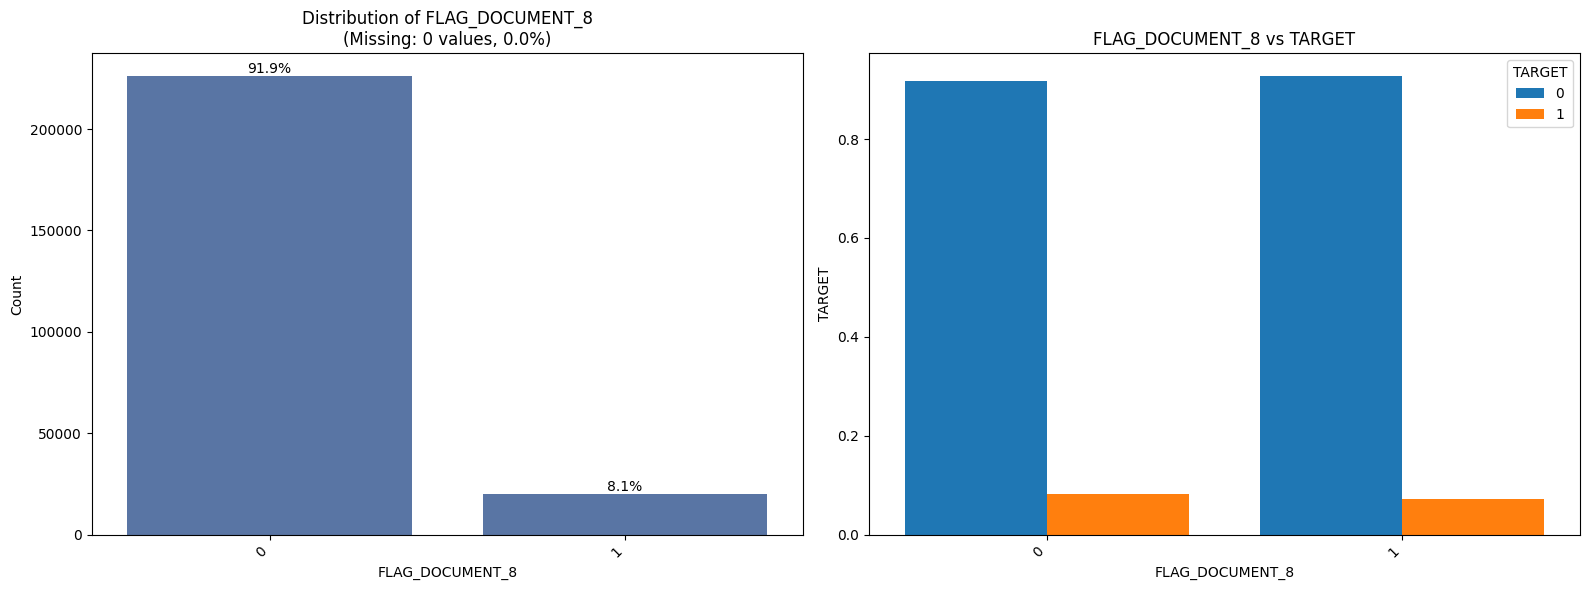

Graficos de la variable: FLAG_DOCUMENT_9


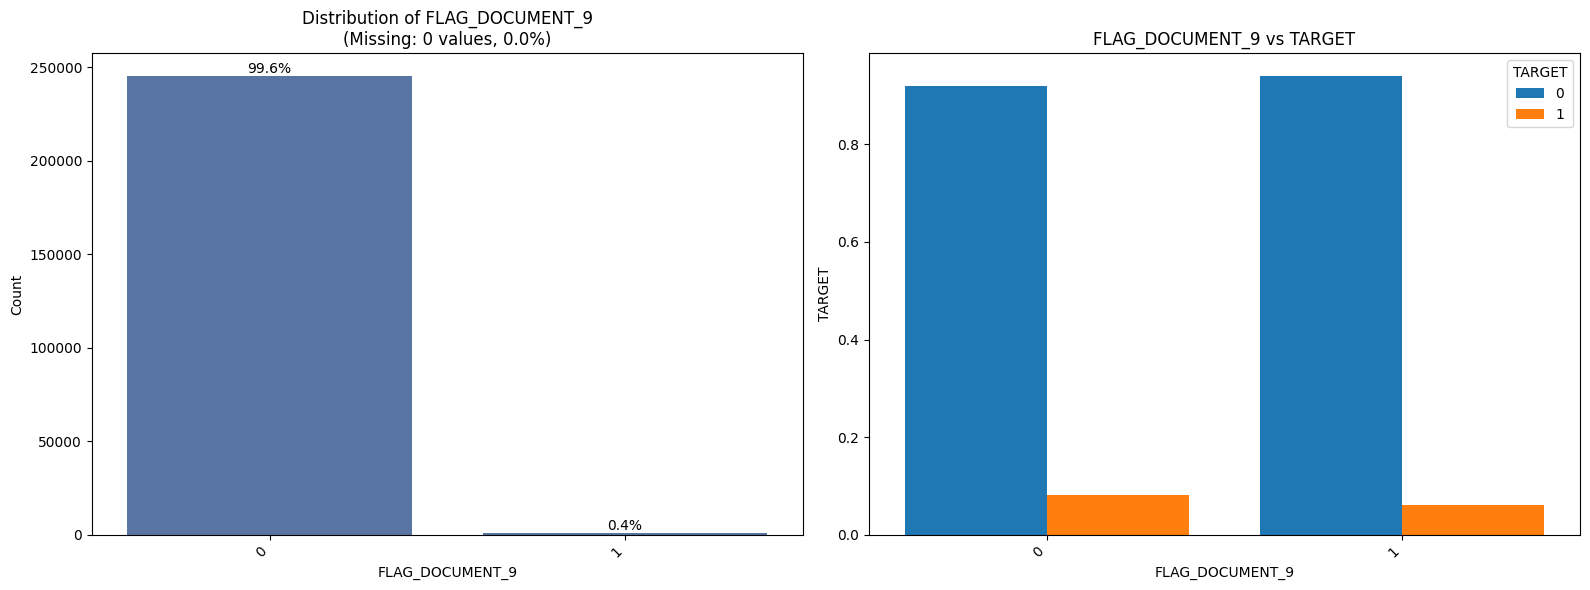

Graficos de la variable: FLAG_DOCUMENT_10


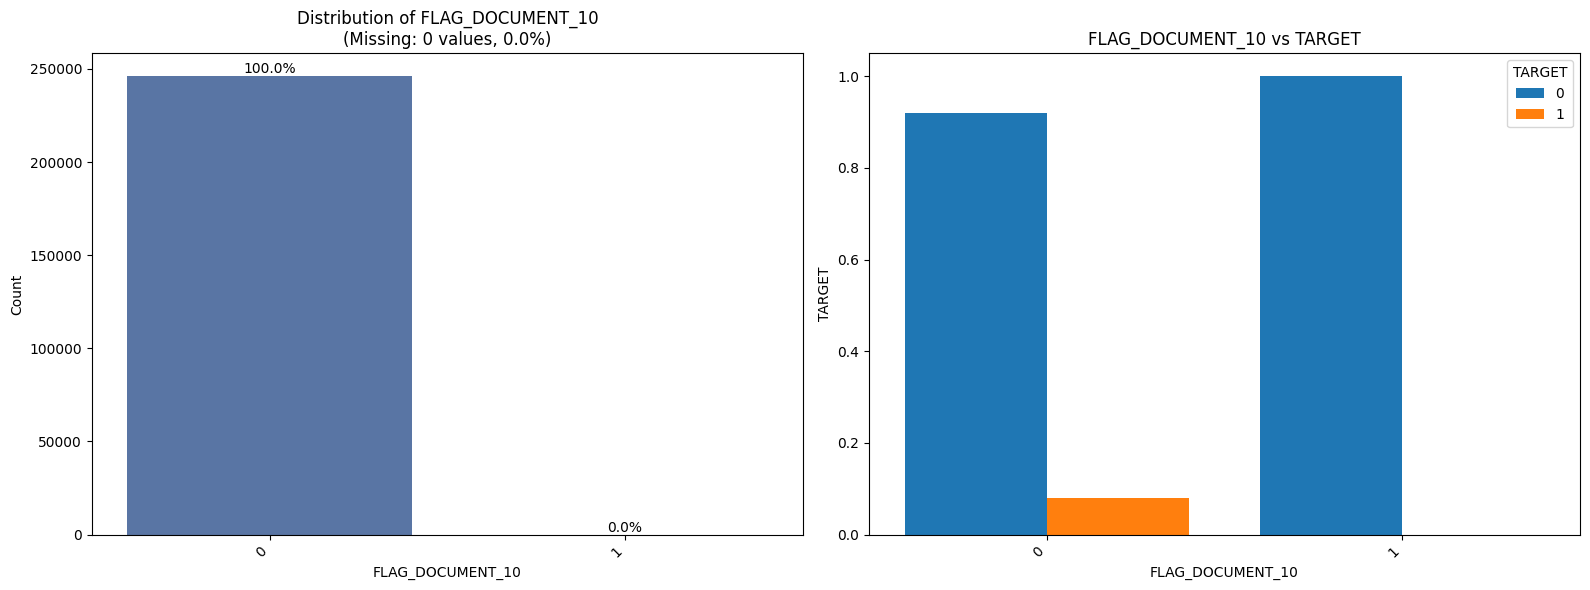

Graficos de la variable: FLAG_DOCUMENT_11


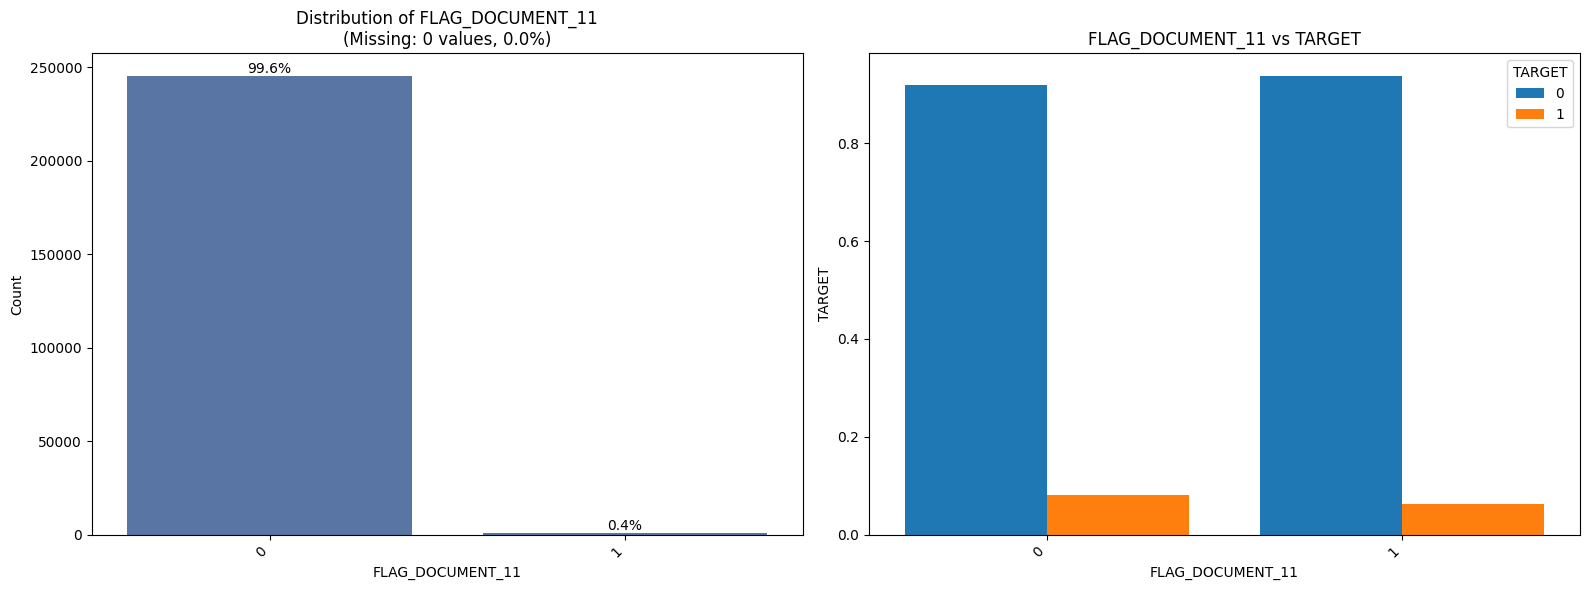

Graficos de la variable: FLAG_DOCUMENT_12


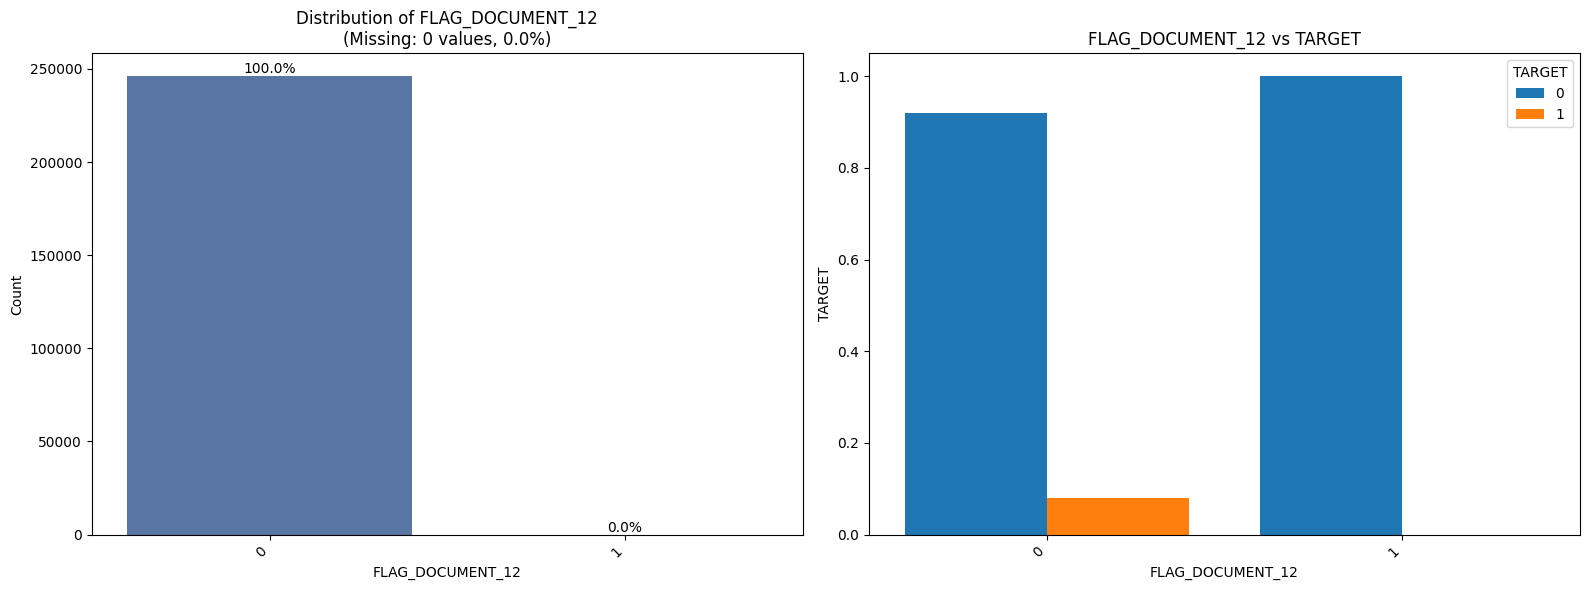

Graficos de la variable: FLAG_DOCUMENT_13


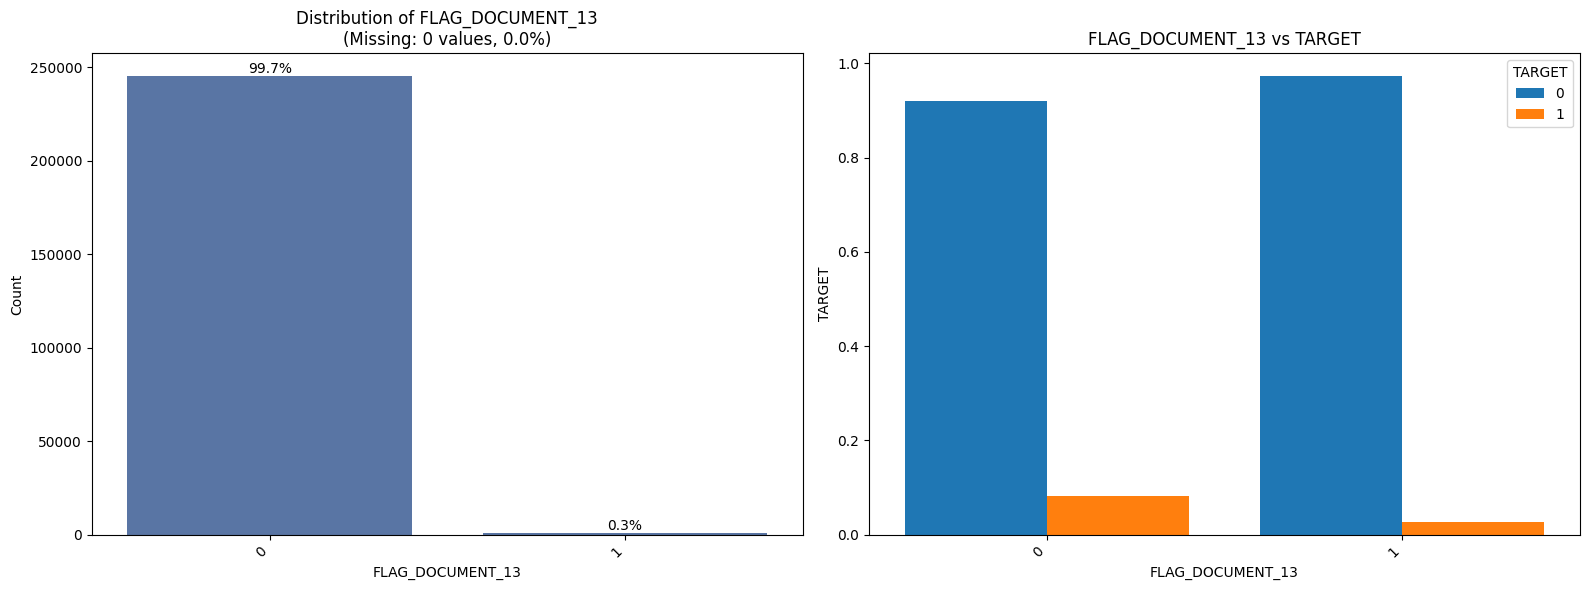

Graficos de la variable: FLAG_DOCUMENT_14


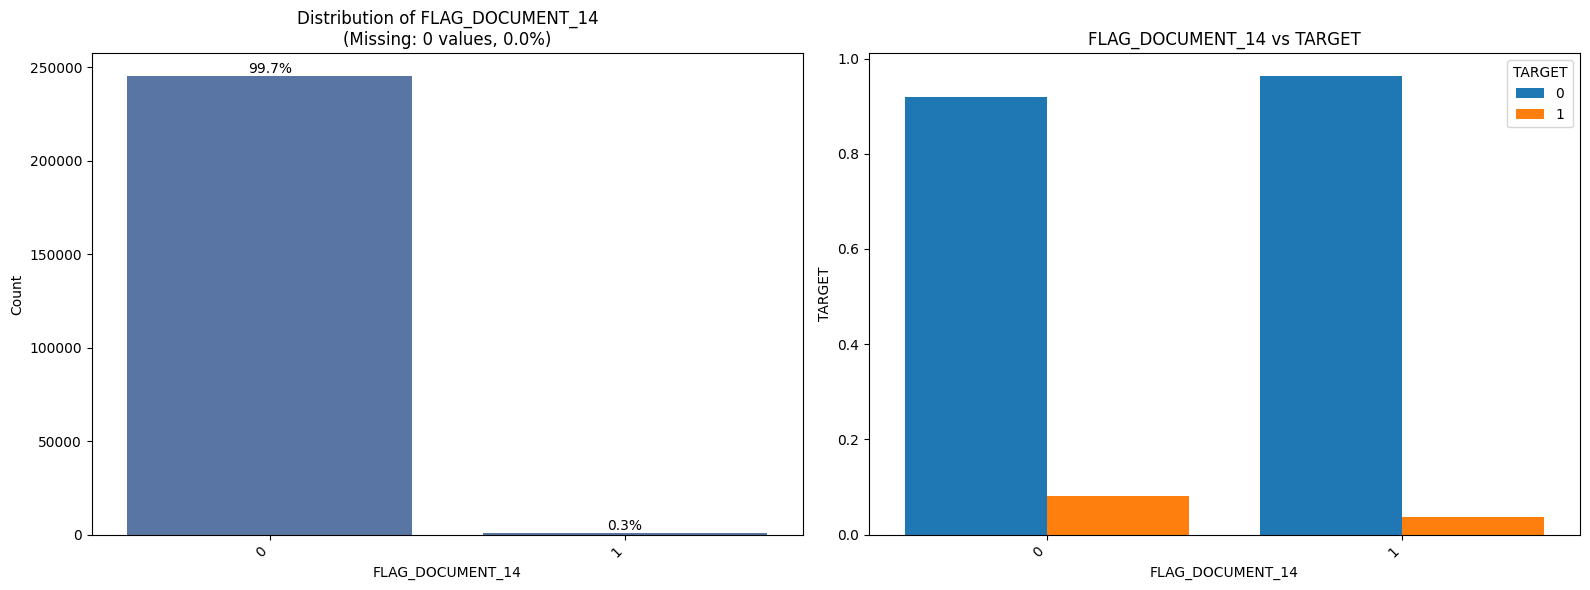

Graficos de la variable: FLAG_DOCUMENT_15


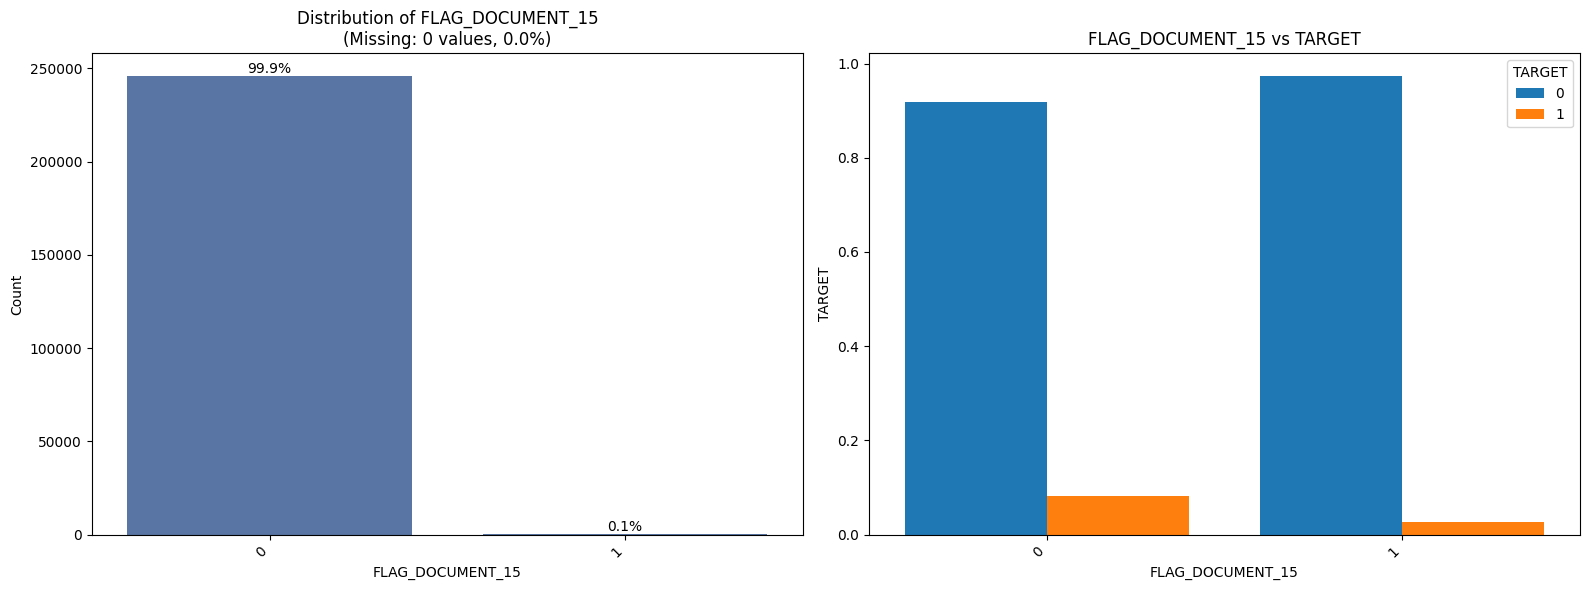

Graficos de la variable: FLAG_DOCUMENT_16


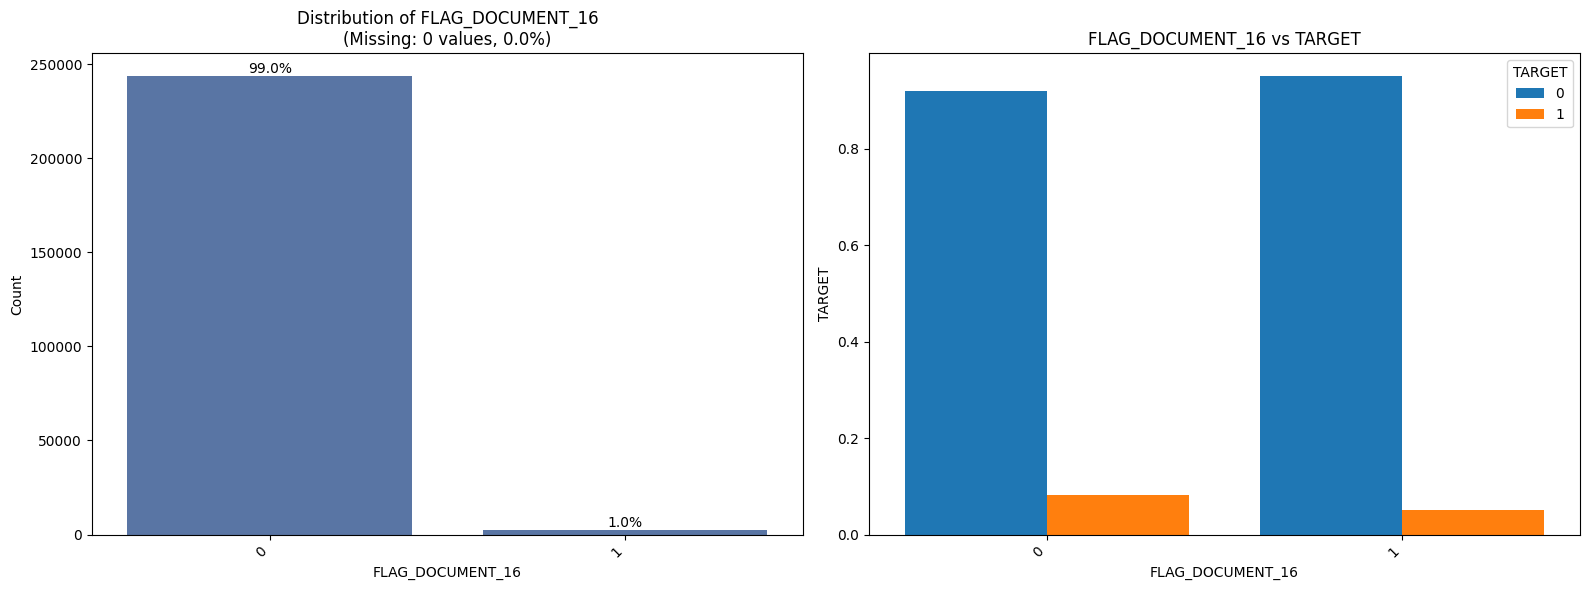

Graficos de la variable: FLAG_DOCUMENT_17


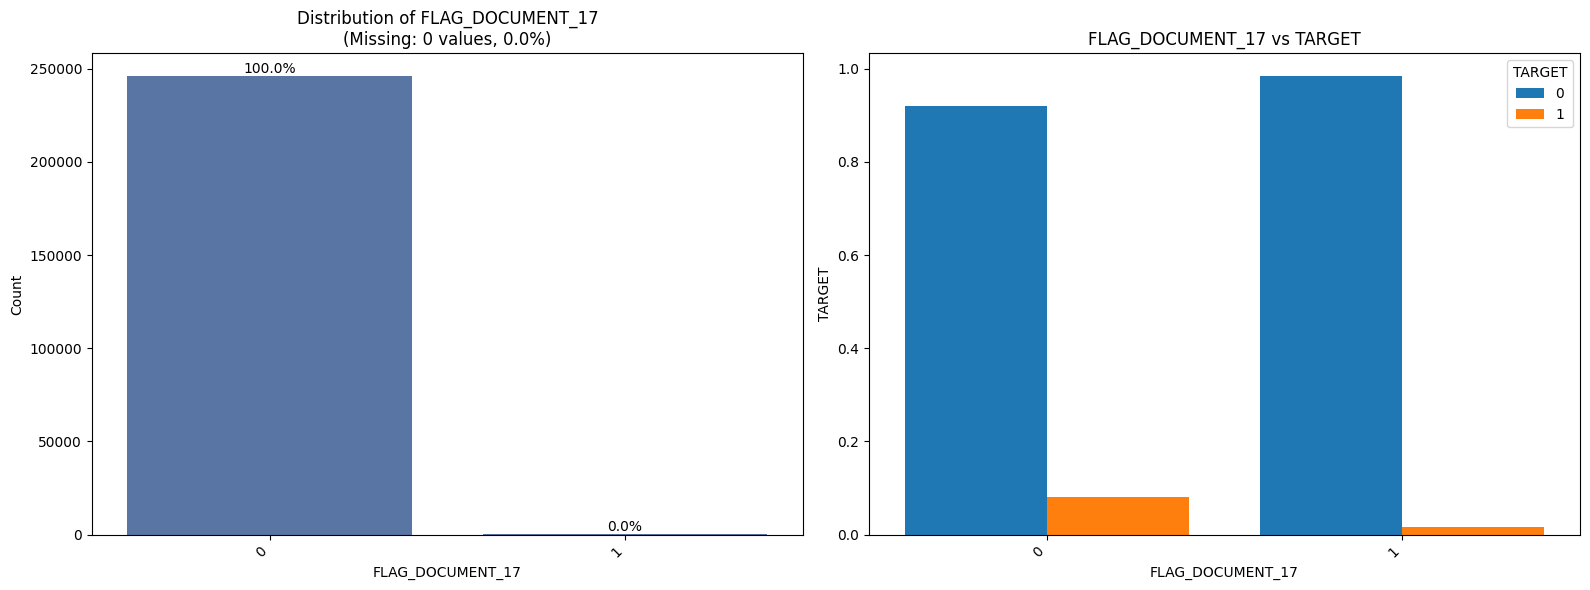

Graficos de la variable: FLAG_DOCUMENT_18


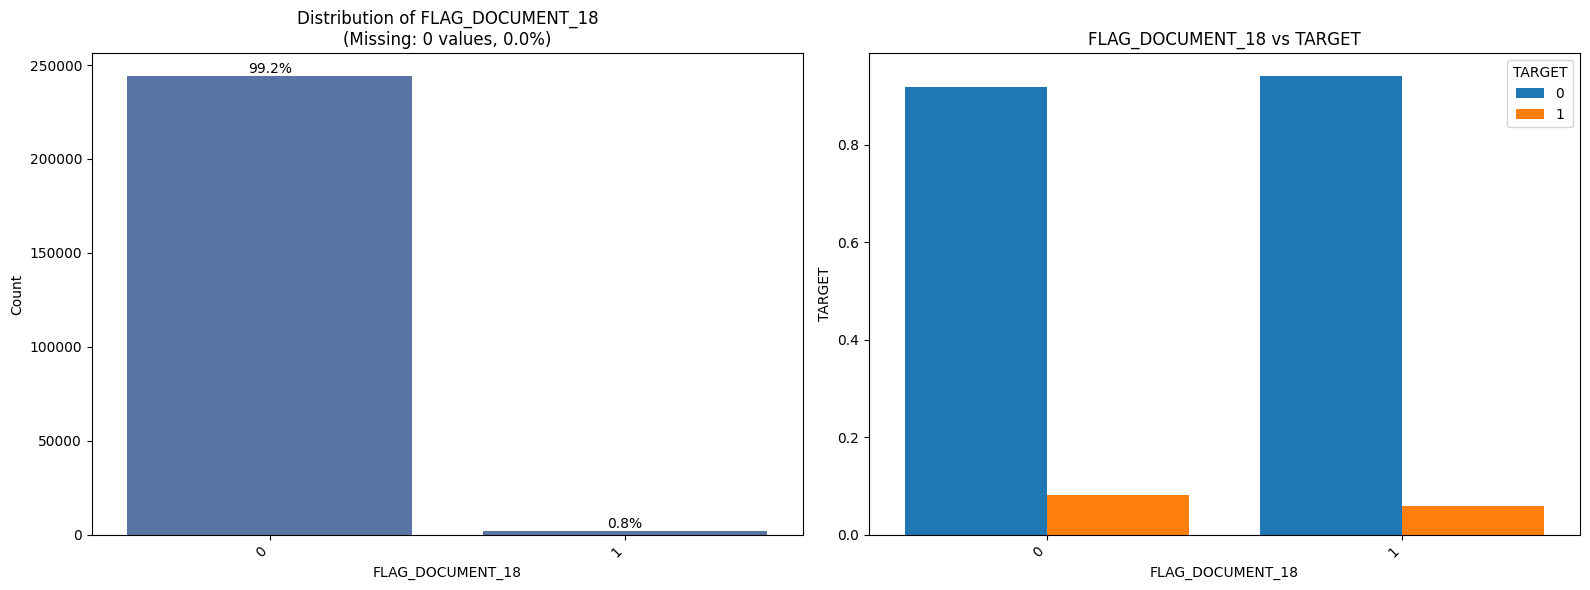

Graficos de la variable: FLAG_DOCUMENT_19


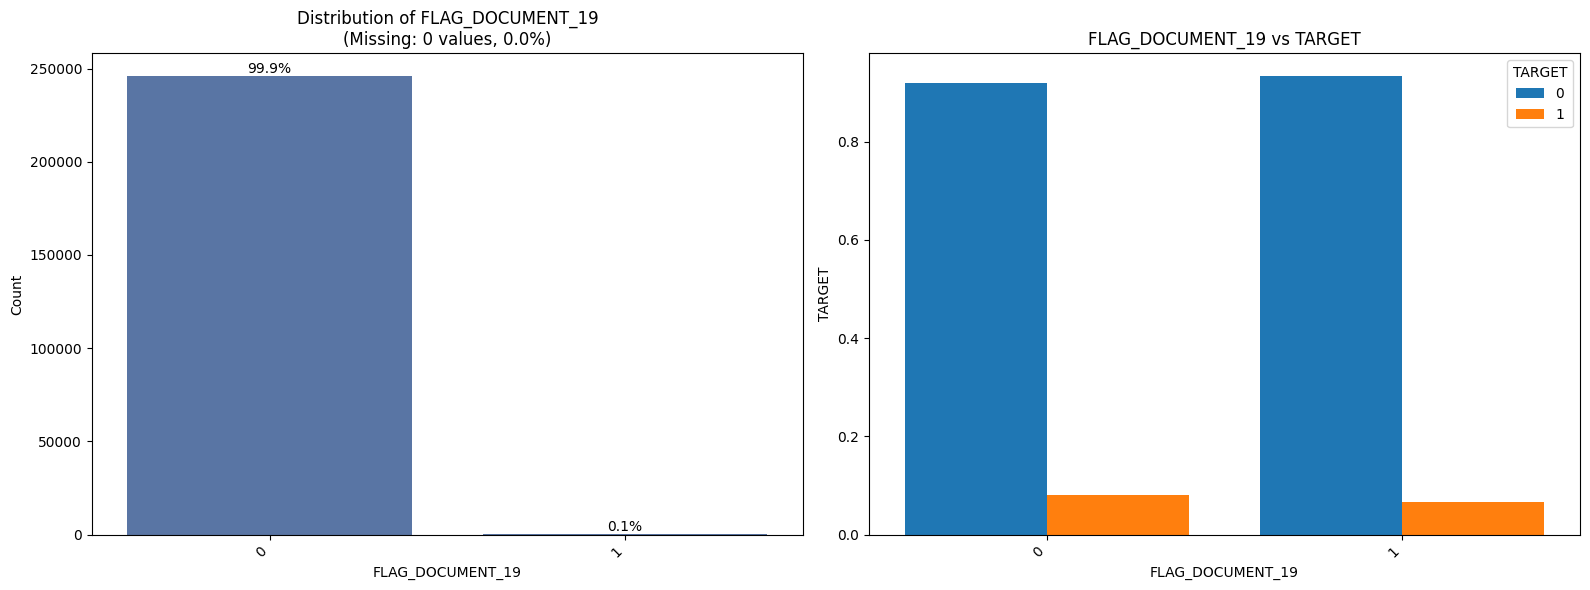

Graficos de la variable: FLAG_DOCUMENT_20


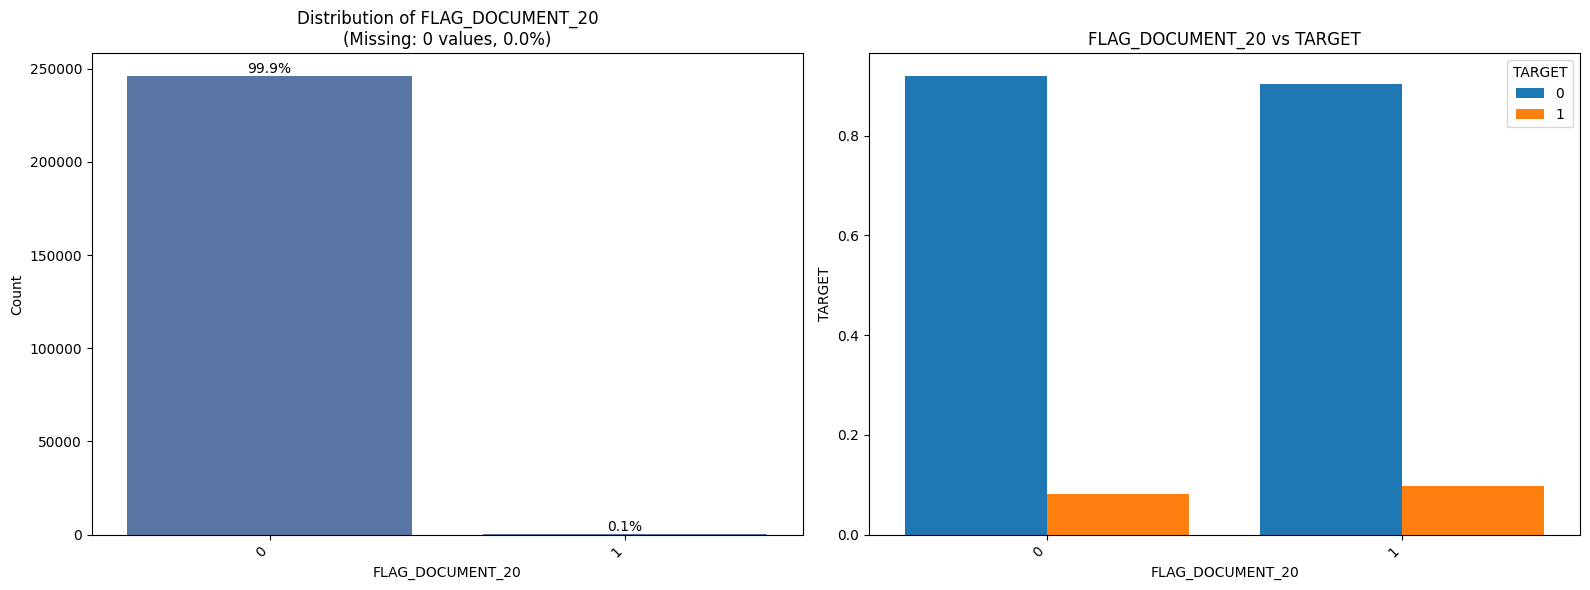

Graficos de la variable: FLAG_DOCUMENT_21


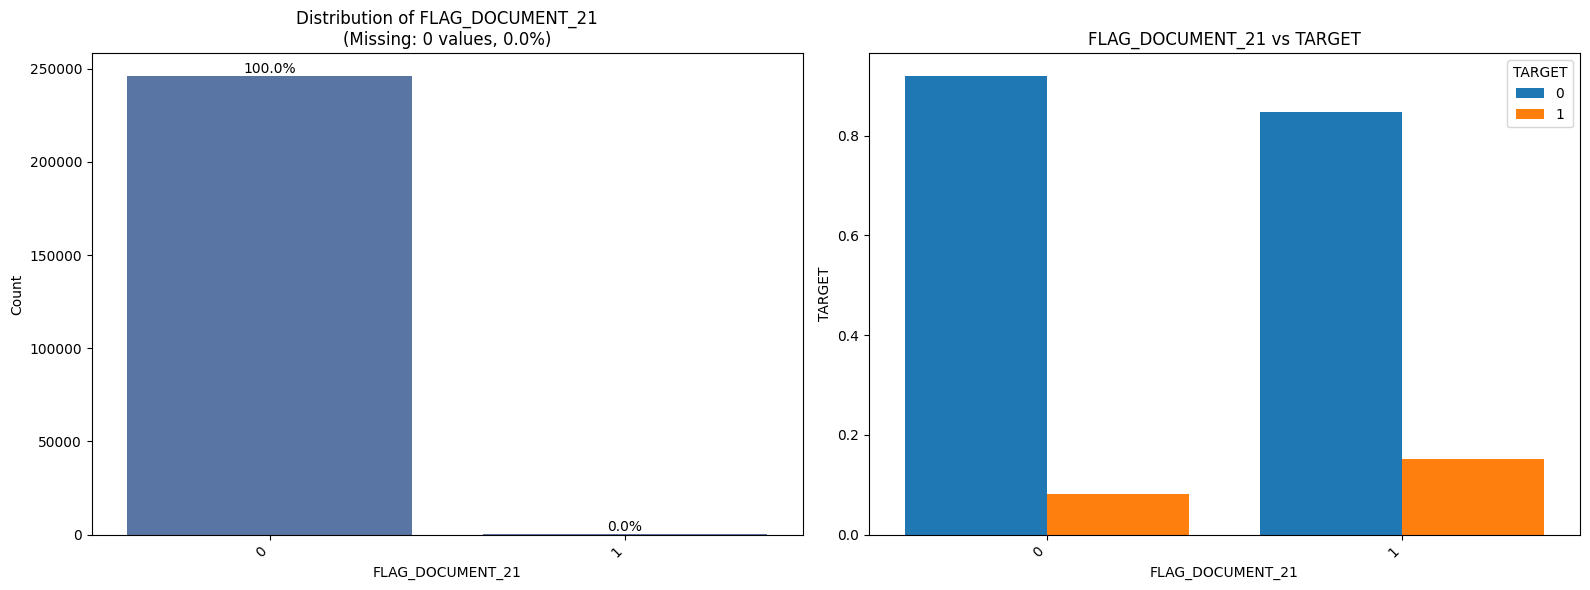

Graficos de la variable: AMT_REQ_CREDIT_BUREAU_HOUR


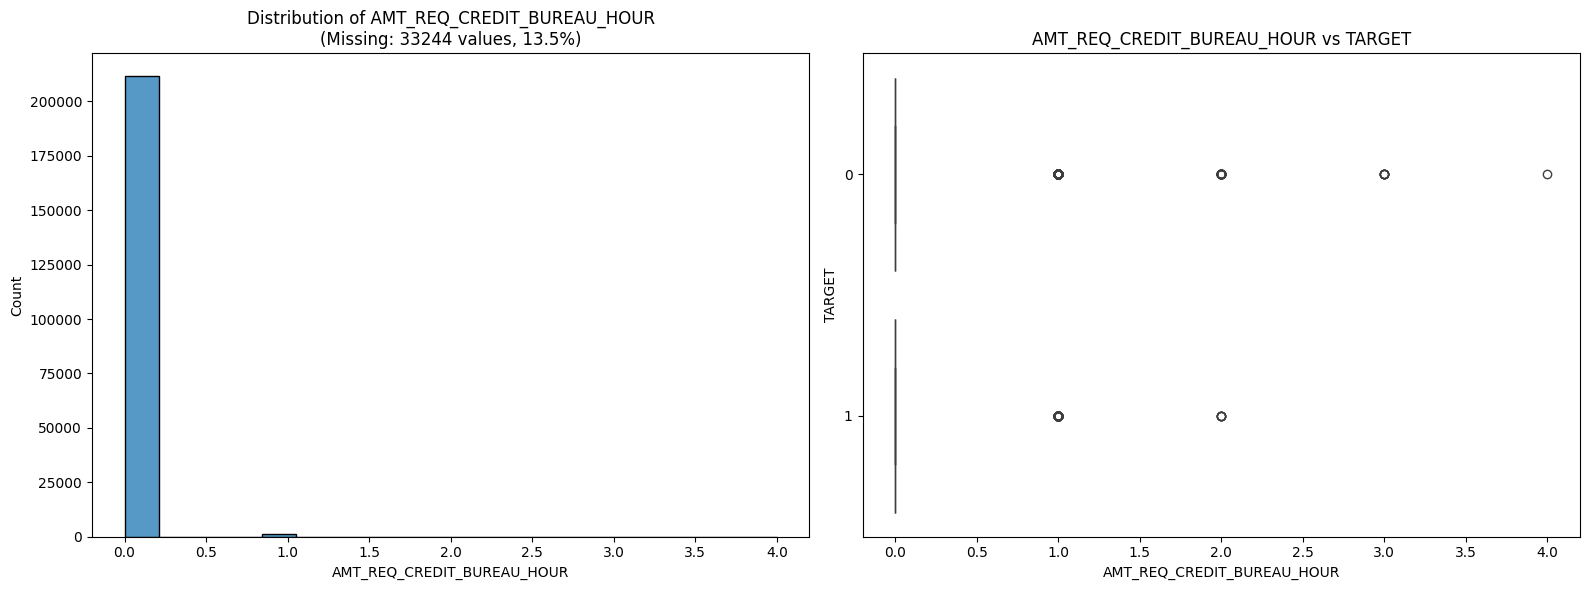

Graficos de la variable: AMT_REQ_CREDIT_BUREAU_DAY


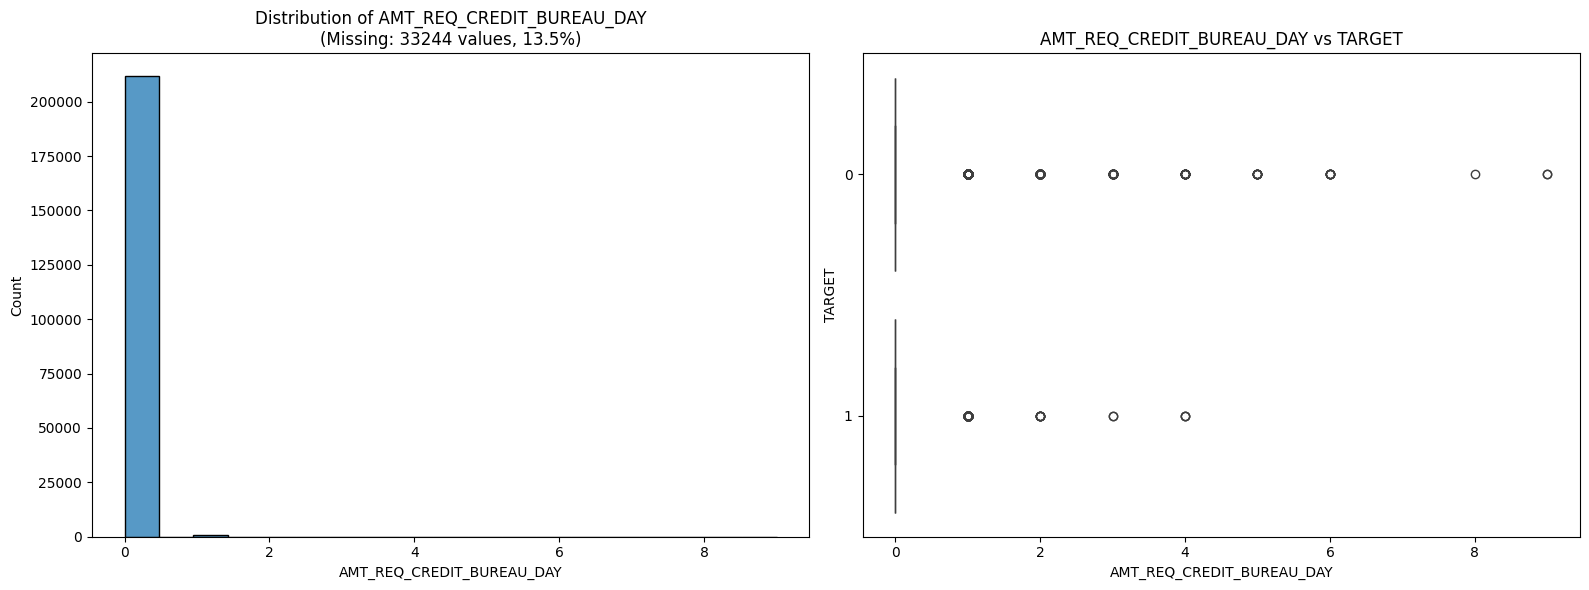

Graficos de la variable: AMT_REQ_CREDIT_BUREAU_WEEK


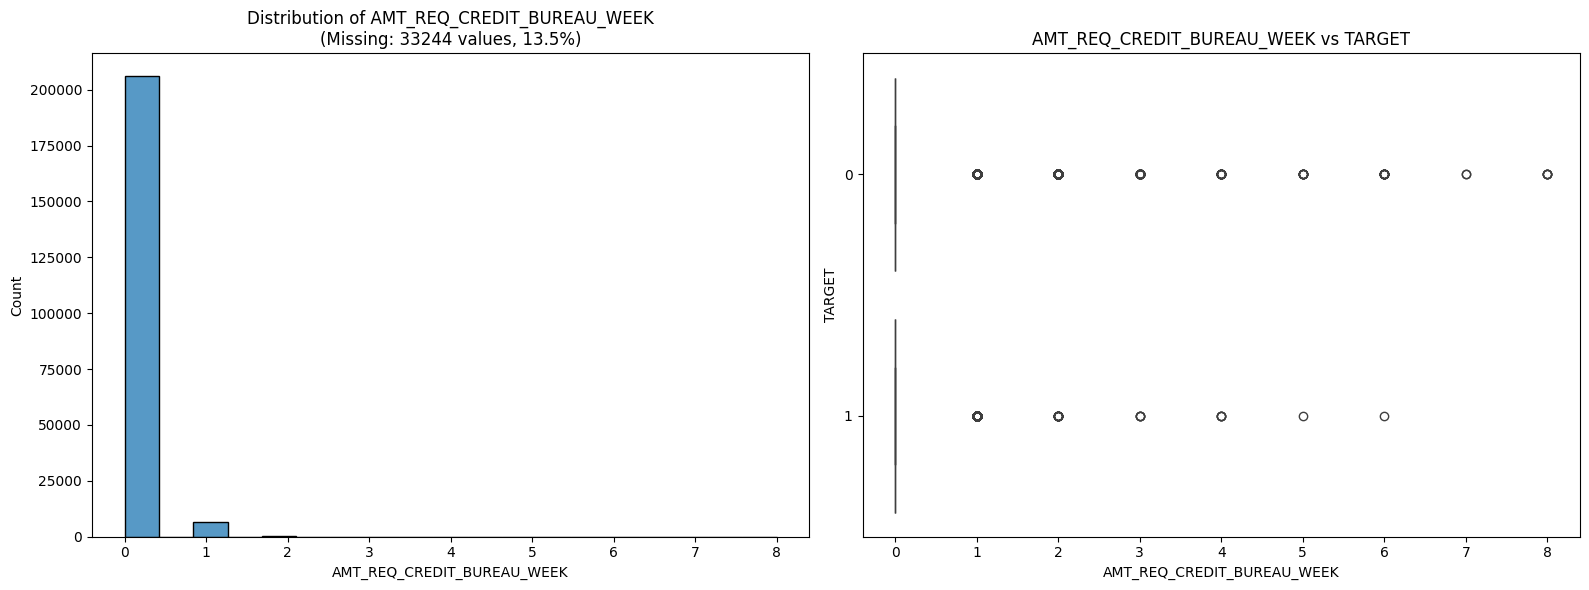

Graficos de la variable: AMT_REQ_CREDIT_BUREAU_MON


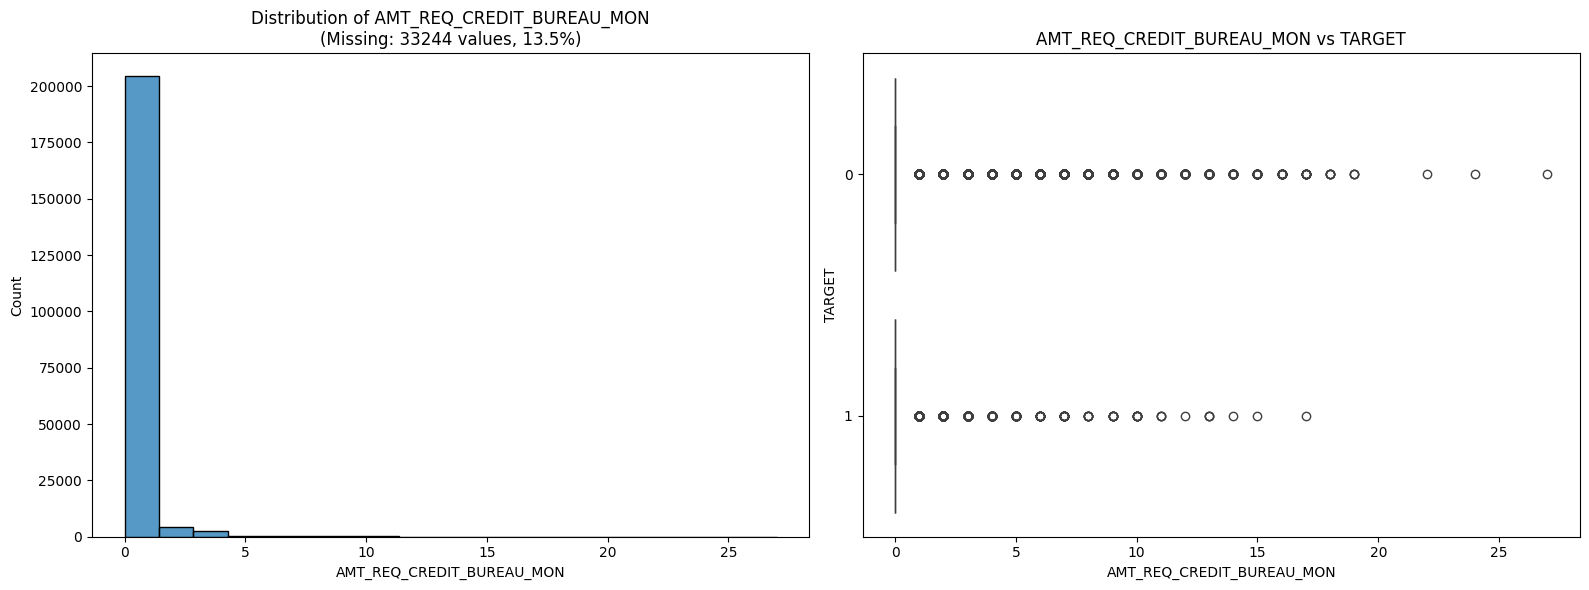

Graficos de la variable: AMT_REQ_CREDIT_BUREAU_QRT


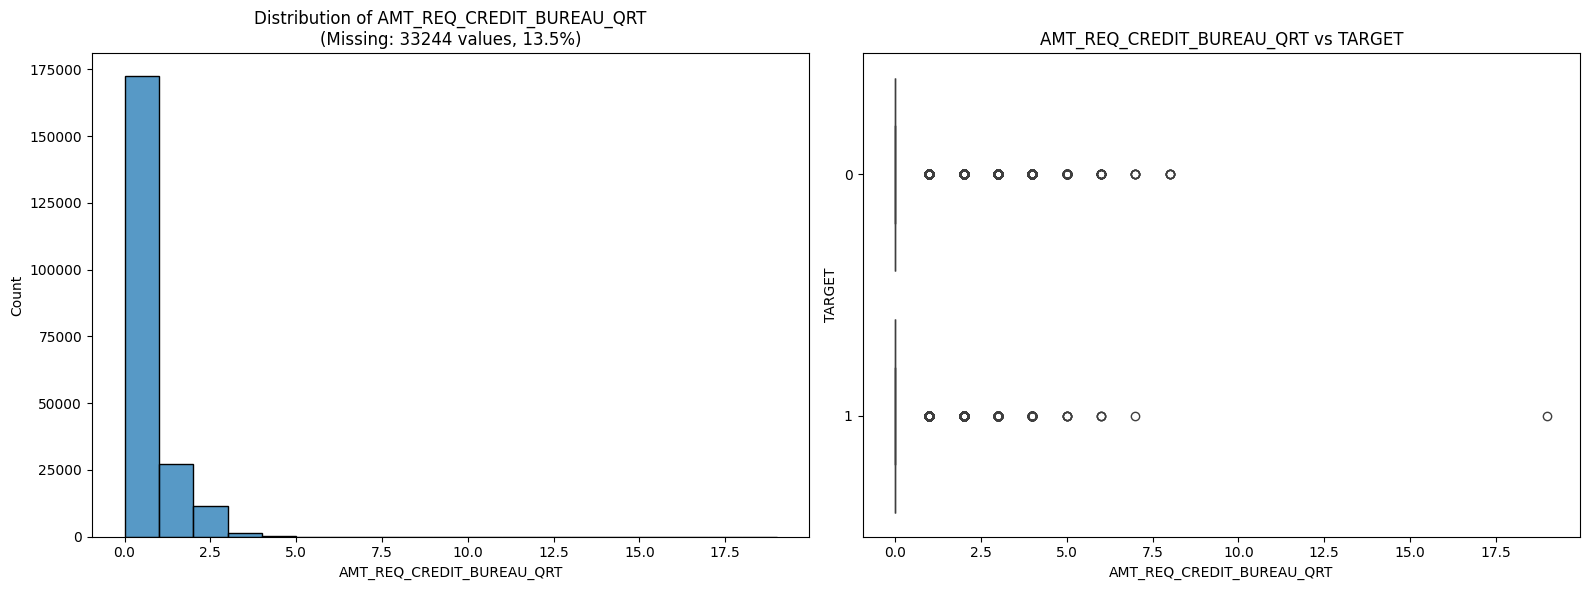

Graficos de la variable: AMT_REQ_CREDIT_BUREAU_YEAR


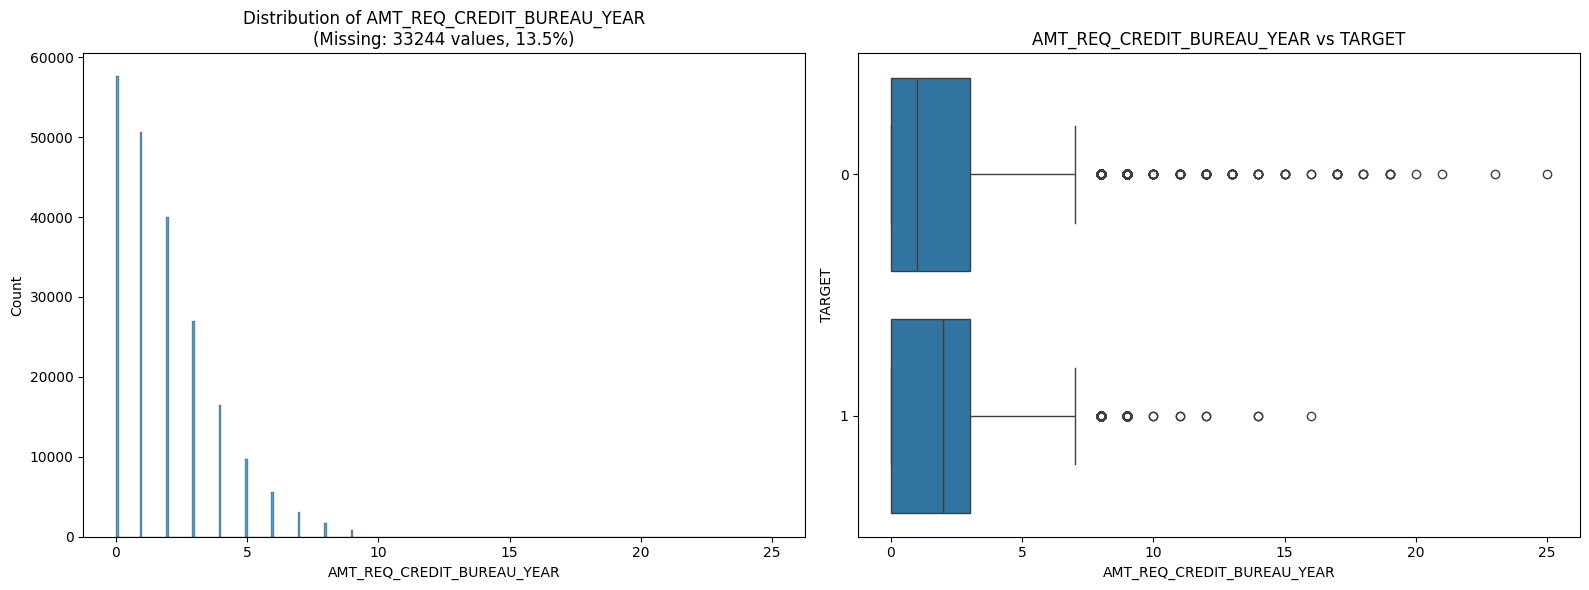

Graficos de la variable: NWEEKDAY_PROCESS_START


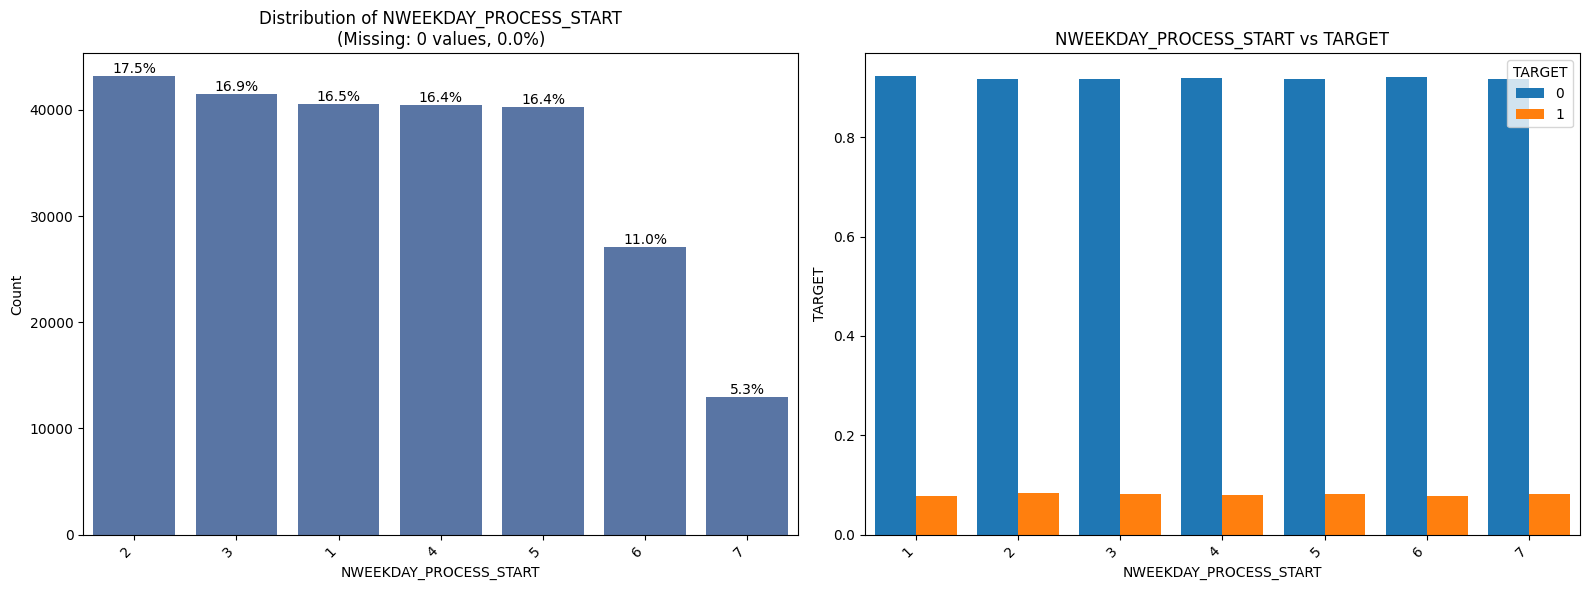

In [16]:
warnings.filterwarnings('ignore')
for i in list(df_train.columns):
    if (df_train[i].dtype==float) & (i!='TARGET'):
        print('Graficos de la variable: ' + i)
        f_aux.plot_feature(df_train, col_name=i, isContinuous=True, target='TARGET')
    elif  i!='TARGET':
        print('Graficos de la variable: ' + i)
        f_aux.plot_feature(df_train, col_name=i, isContinuous=False, target='TARGET')

## **Conclusiones de los gráficos**

#### En estas 121 gráficas, se pueden observar las variaciones tanto de manera individual como con respecto a la variable objetivo. Al plantear esta conclusión, es relevante comenzar desde lo particular hacia lo general. En un primer análisis, observamos aspectos individuales como el **género**, donde los hombres son quienes tienen una mayor tasa de pago del préstamo en comparación con las mujeres. En cuanto al **nivel educativo**, se evidencia que, a mayor nivel educativo, hay una mayor tendencia a saldar el préstamo (asociado con la variable 0). En términos de **edad**, las personas mayores tienen una mayor probabilidad de devolver el préstamo, lo que se refleja en las claras diferencias entre los rangos intercuartílicos del boxplot.

#### De manera más general, se destacan el **tipo de trabajo y la organización** en la que se labora. Se observa que las personas que trabajan en ambientes formales y bien establecidos, como grandes empresas, tienen mayores probabilidades de devolver el préstamo en tiempo y forma. En contraste, aquellos que desempeñan oficios o trabajos menos especializados, como los trabajadores de baja cualificación, personal de camareros y conductores, tienden a tener una menor tasa de pago puntual.

#### Finalmente, existen variables que resultan determinantes para el modelo, tales como el **ingreso, la referencia de otros bancos, la situación de tu círculo cercano y el lugar de residencia**. Estos factores son indicadores de la capacidad económica y la estabilidad de las personas, lo que afecta directamente su capacidad para afrontar pagos de préstamos.

## **Tratamiento de las variables continuas**

#### A continuación, se tratan los valores missing, las correlaciones de las variables continuas y los outliers.

In [17]:
lista_var_con

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_M

#### Por medio de la función de get_deviation_of_mean_perc( ), se determina que proporción de las variables continuas se situan fuera de un intervalo de confianza basado en la media y la desviación estándar, siendo multiplicada por el factor multiplier. En este caso la función nos da el número y porcentaje de valores fuera del rango, a la par de detertminar como se distribuyen estos valores extremos conforme a la variable objetivo. 

In [18]:
f_aux.get_deviation_of_mean_perc(df_train, lista_var_con, target = 'TARGET', multiplier = 3)

variable         0         1  sum_outlier_values  porcentaje_sum_null_values
0               AMT_INCOME_TOTAL  0.947115  0.052885                 208                    0.000846
1                     AMT_CREDIT  0.958763  0.041237                2619                    0.010646
2                    AMT_ANNUITY  0.963606  0.036394                2363                    0.009605
3                AMT_GOODS_PRICE  0.962963  0.037037                3321                    0.013500
4     REGION_POPULATION_RELATIVE  0.960321  0.039679                6729                    0.027353
5              DAYS_REGISTRATION  0.957586  0.042414                 613                    0.002492
6                    OWN_CAR_AGE  0.915541  0.084459                2664                    0.010829
7                CNT_FAM_MEMBERS  0.902377  0.097623                3155                    0.012825
8                 APARTMENTS_AVG  0.949831  0.050169                2372                    0.009642
9               BASEMENTAREA_AVG  0.948604  0.051396                1576                    0.006406
10   YEARS_BEGINEXPLUATATION_AVG  0.906526  0.093474                 567                    0.002305
11               YEARS_BUILD_AVG  0.927597  0.072403                 953                    0.003874
12                COMMONAREA_AVG  0.941691  0.058309                1372                    0.005577
13                 ELEVATORS_AVG  0.955647  0.044353                1939                    0.007882
14                 ENTRANCES_AVG  0.939684  0.060316                1774                    0.007211
15                 FLOORSMAX_AVG  0.957046  0.042954                2072                    0.008422
16                 FLOORSMIN_AVG  0.960870  0.039130                 460                    0.001870
17                  LANDAREA_AVG  0.933374  0.066626                1651                    0.006711
18          LIVINGAPARTMENTS_AVG  0.948958  0.051042                1391                    0.005654
19                LIVINGAREA_AVG  0.948134  0.051866                2545                    0.010345
20       NONLIVINGAPARTMENTS_AVG  0.929174  0.070826                 593                    0.002410
21             NONLIVINGAREA_AVG  0.946875  0.053125                1920                    0.007805
22               APARTMENTS_MODE  0.950021  0.049979                2401                    0.009760
23             BASEMENTAREA_MODE  0.946789  0.053211                1635                    0.006646
24  YEARS_BEGINEXPLUATATION_MODE  0.904676  0.095324                 556                    0.002260
25              YEARS_BUILD_MODE  0.928423  0.071577                 964                    0.003919
26               COMMONAREA_MODE  0.938462  0.061538                1365                    0.005549
27                ELEVATORS_MODE  0.952078  0.047922                2671                    0.010857
28                ENTRANCES_MODE  0.938601  0.061399                1759                    0.007150
29                FLOORSMAX_MODE  0.958591  0.041409                2101                    0.008540
30                FLOORSMIN_MODE  0.963061  0.036939                 379                    0.001541
31                 LANDAREA_MODE  0.932749  0.067251                1710                    0.006951
32         LIVINGAPARTMENTS_MODE  0.946191  0.053809                1431                    0.005817
33               LIVINGAREA_MODE  0.948134  0.051866                2680                    0.010894
34      NONLIVINGAPARTMENTS_MODE  0.921429  0.078571                 560                    0.002276
35            NONLIVINGAREA_MODE  0.947773  0.052227                1953                    0.007939
36               APARTMENTS_MEDI  0.949938  0.050062                2417                    0.009825
37             BASEMENTAREA_MEDI  0.949057  0.050943                1590                    0.006463
38  YEARS_BEGINEXPLUATATION_MEDI  0.902985  0.097015                 536             

## **Conclusiones del impacto de las variables continuas con respecto a la variable objetivo**

#### Cuando una variable presenta un mayor número de valores fuera del intervalo de confianza, nos indica una alta dispersión en los datos. Por lo que son más relevantes en la evaluación de riesgos por parte del banco, ya que van relacionadas a perfiles más diversos en los solicitantes, un ejemplo es la variable CNT_FAM_MEMBERS, que presenta 3,155 valores fuera del intervalo de confianza, indicando una mayor heterogeneidad en los tamaños de las familias, lo cual es relevante para la evaluar riesgos, asociandolo con el cumplimiento del préstamo.

#### Por otro lado, variables con un menor número de valores fuera del intervalo, un ejemplo es AMT_INCOME_TOTAL con solo 208 valores atípicos, sugiere que los solicitantes tienen ingresos similares. Indicando un perfil más homogéneo entre ellos en cuestión de esta variable. A partir de este análisis, es posible identificar variables clave para establecer perfiles generales de los solicitantes.


## **Gráfica de correlación**

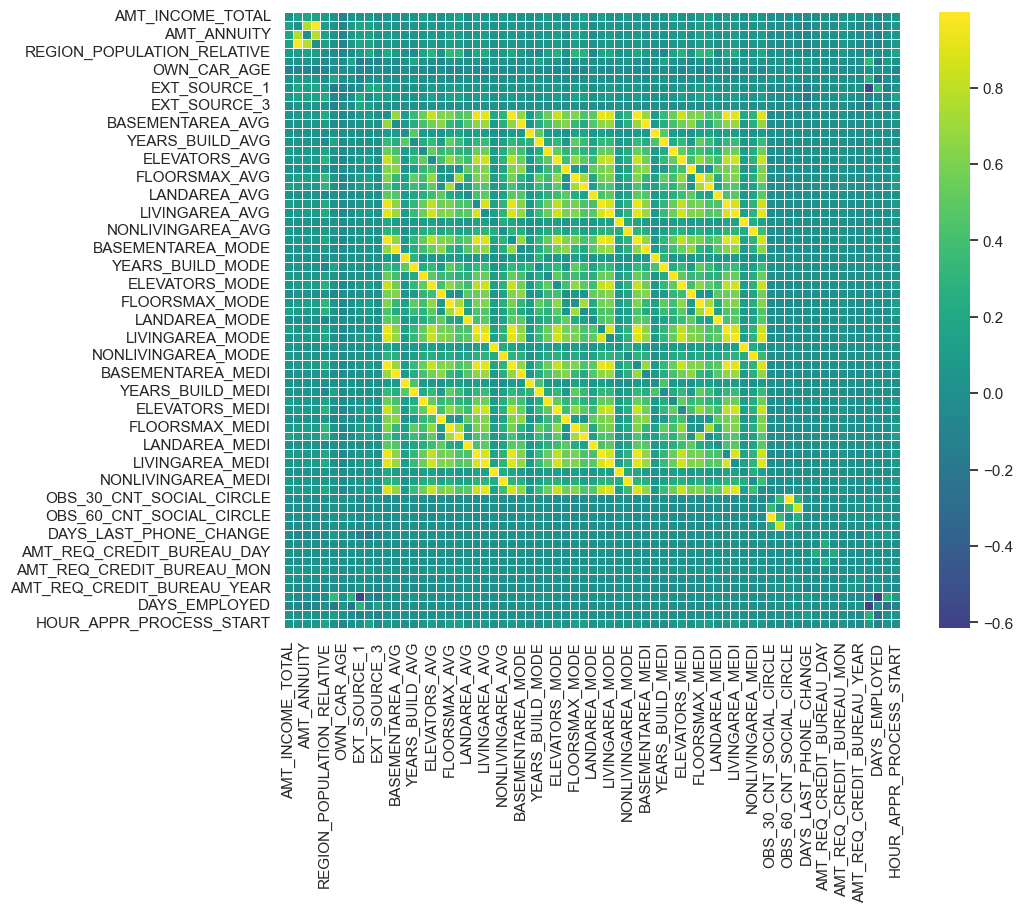

0

In [19]:
f_aux.get_corr_matrix(dataset = df_train[lista_var_con], metodo = 'pearson', size_figure = [10,8])

In [20]:
corr = df_train[lista_var_con].corr('pearson')
new_corr = corr.abs()
new_corr.loc[:,:] = np.tril(new_corr, k=-1) # below main lower triangle of an array
new_corr = new_corr.stack().to_frame('correlation').reset_index().sort_values(by='correlation', ascending=False)
new_corr[new_corr['correlation']> 0.6]

level_0                       level_1  correlation
3918      OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE     0.998514
2912              YEARS_BUILD_MEDI               YEARS_BUILD_AVG     0.998391
3262                FLOORSMIN_MEDI                 FLOORSMIN_AVG     0.997322
3192                FLOORSMAX_MEDI                 FLOORSMAX_AVG     0.996983
3122                ENTRANCES_MEDI                 ENTRANCES_AVG     0.996911
3052                ELEVATORS_MEDI                 ELEVATORS_AVG     0.996319
2982               COMMONAREA_MEDI                COMMONAREA_AVG     0.995660
3472               LIVINGAREA_MEDI                LIVINGAREA_AVG     0.995472
2702               APARTMENTS_MEDI                APARTMENTS_AVG     0.995430
2772             BASEMENTAREA_MEDI              BASEMENTAREA_AVG     0.994335
2842  YEARS_BEGINEXPLUATATION_MEDI   YEARS_BEGINEXPLUATATION_AVG     0.994314
3402         LIVINGAPARTMENTS_MEDI          LIVINGAPARTMENTS_AVG     0.993621
3612            NONLIVINGAREA_MEDI             NONLIVINGAREA_AVG     0.991197
3332                 LANDAREA_MEDI                  LANDAREA_AVG     0.991056
1946              YEARS_BUILD_MODE               YEARS_BUILD_AVG     0.989372
2926              YEARS_BUILD_MEDI              YEARS_BUILD_MODE     0.989272
3542      NONLIVINGAPARTMENTS_MEDI       NONLIVINGAPARTMENTS_AVG     0.989047
3276                FLOORSMIN_MEDI                FLOORSMIN_MODE     0.988735
3206                FLOORSMAX_MEDI                FLOORSMAX_MODE     0.988205
208                AMT_GOODS_PRICE                    AMT_CREDIT     0.987000
2296                FLOORSMIN_MODE                 FLOORSMIN_AVG     0.986250
2226                FLOORSMAX_MODE                 FLOORSMAX_AVG     0.985561
3066                ELEVATORS_MEDI                ELEVATORS_MODE     0.982819
3346                 LANDAREA_MEDI                 LANDAREA_MODE     0.981517
3556      NONLIVINGAPARTMENTS_MEDI      NONLIVINGAPARTMENTS_MODE     0.981259
3136                ENTRANCES_MEDI                ENTRANCES_MODE     0.981012
2086                ELEVATORS_MODE                 ELEVATORS_AVG     0.979161
2996               COMMONAREA_MEDI               COMMONAREA_MODE     0.978934
2156                ENTRANCES_MODE                 ENTRANCES_AVG     0.978034
2786             BASEMENTAREA_MEDI             BASEMENTAREA_MODE     0.977787
2716               APARTMENTS_MEDI               APARTMENTS_MODE     0.977514
3626            NONLIVINGAREA_MEDI            NONLIVINGAREA_MODE     0.976066
2016               COMMONAREA_MODE                COMMONAREA_AVG     0.975988
3486               LIVINGAREA_MEDI               LIVINGAREA_MODE     0.975391
3416         LIVINGAPARTMENTS_MEDI         LIVINGAPARTMENTS_MODE     0.975138
1736               APARTMENTS_MODE                APARTMENTS_AVG     0.974062
1806             BASEMENTAREA_MODE              BASEMENTAREA_AVG     0.973389
1876  YEARS_BEGINEXPLUATATION_MODE   YEARS_BEGINEXPLUATATION_AVG     0.973181
2366                 LANDAREA_MODE                  LANDAREA_AVG     0.973105
2506               LIVINGAREA_MODE                LIVINGAREA_AVG     0.972434
2576      NONLIVINGAPARTMENTS_MODE       NONLIVINGAPARTMENTS_AVG     0.970068
2436         LIVINGAPARTMENTS_MODE          LIVINGAPARTMENTS_AVG     0.969449
2646            NONLIVINGAREA_MODE             NONLIVINGAREA_AVG     0.967162
2856  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MODE     0.966567
1460          LIVINGAPARTMENTS_AVG                APARTMENTS_AVG     0.945033
3420         LIVINGAPARTMENTS_MEDI               APARTMENTS_MEDI     0.943933
3392         LIVINGAPARTMENTS_MEDI                APARTMENTS_AVG     0.943237
2440         LIVINGAPARTMENTS_MODE               APARTMENTS_MODE     0.940871
2712               APARTMENTS_MEDI          LIVINGAPARTMENTS_AVG     0.936922
2726               APARTMENTS_MEDI         LIVINGAPARTMENTS_MODE     0.934145
2426         LIVINGAPARTMENTS_MODE               

## **Conclusiones correlación entre variables**

#### Existen valores extremadamente altos en la correlación entre ciertas variables, estas llegan a presentar el mismo tipo de variable, unicamente cambia el valor estadístico, un ejemplo es YEARS_BUILD_MEDI	 y YEARS_BUILD_AVG. La presencia de variables redundantes en un modelo predictivo afecta la estabilidad y la interpretrabilidad del modelo, por lo que es necesario identificarlas para sacarlas del modelo.

#### Asimismo, en las variables relacionadas con ingresos, crédito y situación laboral, generan casos con una relación proporcional directa, como lo es AMT_ANNUITY y AMT_CREDIT. Con el cual se puede establecer que si uno aumenta el otro lo hará a la par, es decir, si la cantidad de crédito requerido aumenta, la anualidad lo hará también. Esto de igual manera que la anterior sección, donde se establecen los valores dentro de un intervalo de confianza, nos ayuda a identificar patrones más complejos en los perfiles de los solicitantes.

## **Tratamiento valores nulos (Variables Continuas)**

In [21]:
lista_var_con

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_M

In [22]:
f_aux.get_percent_null_values_target(pd_loan = df_train, list_var_continuous = lista_var_con, target = 'TARGET')

Category_0                      variable  sum_null_values  porcentaje_sum_null_values  Category_1
0     1.000000                   AMT_ANNUITY               10                    0.000041         NaN
1     0.923077               AMT_GOODS_PRICE              221                    0.000898    0.076923
2     0.915163                   OWN_CAR_AGE           162418                    0.660214    0.084837
3     1.000000               CNT_FAM_MEMBERS                2                    0.000008         NaN
4     0.914752                  EXT_SOURCE_1           138595                    0.563376    0.085248
5     0.922787                  EXT_SOURCE_2              531                    0.002158    0.077213
6     0.907223                  EXT_SOURCE_3            48805                    0.198388    0.092777
7     0.908612                APARTMENTS_AVG           124732                    0.507024    0.091388
8     0.911054              BASEMENTAREA_AVG           143829                    0.584652    0.088946
9     0.908069   YEARS_BEGINEXPLUATATION_AVG           119949                    0.487582    0.091931
10    0.913381               YEARS_BUILD_AVG           163543                    0.664787    0.086619
11    0.914441                COMMONAREA_AVG           171811                    0.698396    0.085559
12    0.909309                 ELEVATORS_AVG           131017                    0.532572    0.090691
13    0.908366                 ENTRANCES_AVG           123775                    0.503134    0.091634
14    0.908191                 FLOORSMAX_AVG           122297                    0.497126    0.091809
15    0.913863                 FLOORSMIN_AVG           166921                    0.678519    0.086137
16    0.912066                  LANDAREA_AVG           145985                    0.593416    0.087934
17    0.913972          LIVINGAPARTMENTS_AVG           168119                    0.683388    0.086028
18    0.908725                LIVINGAREA_AVG           123462                    0.501862    0.091275
19    0.914273       NONLIVINGAPARTMENTS_AVG           170729                    0.693998    0.085727
20    0.909750             NONLIVINGAREA_AVG           135624                    0.551299    0.090250
21    0.908612               APARTMENTS_MODE           124732                    0.507024    0.091388
22    0.911054             BASEMENTAREA_MODE           143829                    0.584652    0.088946
23    0.908069  YEARS_BEGINEXPLUATATION_MODE           119949                    0.487582    0.091931
24    0.913381              YEARS_BUILD_MODE           163543                    0.664787    0.086619
25    0.914441               COMMONAREA_MODE           171811                    0.698396    0.085559
26    0.909309                ELEVATORS_MODE           131017                    0.532572    0.090691
27    0.908366                ENTRANCES_MODE           123775                    0.503134    0.091634
28    0.908191                FLOORSMAX_MODE           122297                    0.497126    0.091809
29    0.913863                FLOORSMIN_MODE           166921                    0.678519    0.086137
30    0.912066                 LANDAREA_MODE           145985                    0.593416    0.087934
31    0.913972         LIVINGAPARTMENTS_MODE           168119                    0.683388    0.086028
32    0.908725               LIVINGAREA_MODE           123462                    0.501862    0.091275
33    0.914273      NONLIVINGAPARTMENTS_MODE           170729                    0.693998    0.085727
34    0.909750            NONLIVINGAREA_MODE           135624                    0.551299    0.090250
35    0.908612               APARTMENTS_MEDI           124732                    0.507024    0.091388
36    0.911054             BASEMENTAREA_MEDI           143829                    0.584652    0.088946
37    0.908069  YEARS_BEGINEXPLUATATION_MEDI           119949                    0.487582    0.091931
38    0.913381            

## **Conclusiones de porcentaje de valores nulos**

#### Por medio del anterior análisis, es posible clasificar las variables en dos grupos: **variables a imputar y variables a eliminar.** Con esta categorización, se optimiza la calidad del conjunot de datos para los modelos predictivos. Sin embargo, es importante considerar también el significado detrás de los valores nulos. En este caso, los valores nulos pueden reflejar que el cliente no proporcionó ciertos documentos o información requerida. Por lo que dependiendo de la variable, puede llegar a ser un indicador de mayor riesgo.

## **Imputar valores nulos (Variables Continuas)**

#### A continuación, se generaron dos listas para imputar los valores faltantes en el conjunto de datos, una para la imputación con la media y otra para la imputación con la mediana.

#### La decisión de utilizar estos métodos se basó en el porcentaje de valores faltantes en cada variable. Las que presentaban un porcentaje de valores nulos menor o igual al 30% se imputaron con la media, ya que se asumió que estos valores presentaban una distribución relativamente uniforme y no afectarían significativamente las relaciones entre las variables. Sustituir por la media es apropiado cuando los datos no contienen outliers representativos y presentan una distribución simétrica o normal.

#### Por otro lado, las variables con un porcentaje de valores nulos superior al 30% fueron imputadas con la mediana, debido a que esta es más robusta frente a los outliers y las distribuciones segmentadas. En el caso de que se hubieran imputado estos datos con la media, podría distorsionar el análisis debido a los valores atípicos o una distribución sesgada.

In [23]:
lista_imputar_media = []
lista_imputar_mediana = []

for variable in df_train[lista_var_con]:
    if variable in ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 
    'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE']:
        lista_imputar_media.append(variable)
    else:
        lista_imputar_mediana.append(variable)
        
print("Lista Imputar Media:", lista_imputar_media)
print("Lista Imputar Mediana:", lista_imputar_mediana)

Lista Imputar Media: ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE']
Lista Imputar Mediana: ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE', 'EXT_SOURCE_1', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', '

#### En la siguiente seccion, generamos una copia de la base de datos para así mantener la integridad de estos y facilitar la gestión a lo largo de las etapas del proceso de análisis.

In [24]:
copia_df_train = df_train.copy()
copia_df_test = df_test.copy()

In [25]:
# Imputar con Media
copia_df_train[lista_imputar_media] = copia_df_train[lista_imputar_media].apply(lambda x: x.fillna(x.mean()))
copia_df_test[lista_imputar_media] = copia_df_test[lista_imputar_media].apply(lambda x: x.fillna(x.mean()))

# Imputar con Mediana
copia_df_train[lista_imputar_mediana] = copia_df_train[lista_imputar_mediana].apply(lambda x: x.fillna(x.median()))
copia_df_test[lista_imputar_mediana] = copia_df_test[lista_imputar_mediana].apply(lambda x: x.fillna(x.median()))

#### Rectificamos que ya no se presentan valores nulos en este tipo de variable

In [26]:
# Filtrar los valores nulos solo para las variables de lista_var_con
nulos_train_con = copia_df_train[lista_var_con].isnull().sum()
nulos_test_con = copia_df_test[lista_var_con].isnull().sum()

# Imprimir los valores nulos por variable en los dos DataFrames
print("Valores nulos por variable (copia_df_train) :")
print(nulos_train_con)

print("\nValores nulos por variable (copia_df_test) :")
print(nulos_test_con)


Valores nulos por variable (copia_df_train) :
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
REGION_POPULATION_RELATIVE      0
DAYS_REGISTRATION               0
OWN_CAR_AGE                     0
CNT_FAM_MEMBERS                 0
EXT_SOURCE_1                    0
EXT_SOURCE_2                    0
EXT_SOURCE_3                    0
APARTMENTS_AVG                  0
BASEMENTAREA_AVG                0
YEARS_BEGINEXPLUATATION_AVG     0
YEARS_BUILD_AVG                 0
COMMONAREA_AVG                  0
ELEVATORS_AVG                   0
ENTRANCES_AVG                   0
FLOORSMAX_AVG                   0
FLOORSMIN_AVG                   0
LANDAREA_AVG                    0
LIVINGAPARTMENTS_AVG            0
LIVINGAREA_AVG                  0
NONLIVINGAPARTMENTS_AVG         0
NONLIVINGAREA_AVG               0
APARTMENTS_MODE                 0
BASEMENTAREA_MODE               0
YEARS_BEGINEXPLUATATION_MODE    0
YE

## **Tratamiento valores nulos (Variables Categóricas y Variables Booleanas)**

In [27]:
lista_var_cat

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'CNT_CHILDREN',
 'NWEEKDAY_PROCESS_START']

In [28]:
lista_var_bool

['TARGET',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EMERGENCYSTATE_MODE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

#### En cada lista de tipo de variable, generamos un bucle para que itere sobre ella y obtenemos las variables con valores nulos. Es importante mencionar que, de manera previa, se visualizó que la categoría de variables booleanas no presentaba valores nulos. Por esta razón, se genera el mensaje en el bucle. 

In [29]:
col_cat = df_train.select_dtypes(include=['category']).columns.tolist()

for col in col_cat:
    valores_nulos = df_train[col].isnull().sum()
    tipo_variable = df_train[col].dtype
    valores_unicos = df_train[col].unique()
    if valores_nulos > 0:
        print(f"Variable: {col}")
        print(f"  - Valores faltantes: {valores_nulos}")
        print(f"  - Tipo de variable: {tipo_variable}")
        print(f"  - Valores únicos: {valores_unicos}")
        print("-" * 90)

In [30]:
col_bool = df_train.select_dtypes(include=[bool]).columns.tolist()

# Determinar que no existen valores nulos
hay_valores_nulos = False

for col in col_bool:
    valores_nulos = df_train[col].isnull().sum()
    tipo_variable = df_train[col].dtype
    valores_unicos = df_train[col].unique()
    
    if valores_nulos > 0:
        hay_valores_nulos = True
        print(f"Variable: {col}")
        print(f"  - Valores faltantes: {valores_nulos}")
        print(f"  - Tipo de variable: {tipo_variable}")
        print(f"  - Valores únicos: {valores_unicos}")
        print("-" * 90)
    else:
        print(f"Variable: {col} - No tiene valores nulos")

# En el caso de que no se encuentren valores nulos
if not hay_valores_nulos:
    print("Ninguna variable tiene valores nulos.")


Ninguna variable tiene valores nulos.


## **Valor de Cramérs V.**

#### El proósito de calcular este valor, es medir la fuerza de asociación entre dos variables categóricas, indicando que tan relacionados están. El rango de este valor va de 0 a 1, donde entre más cercano sea a uno, mayor es la fuerza de asociación. A pesar de que mide la relación entre variables, no nos determina la causalidad entre estas, debido a que no infiere en que una genere a la otra. 

In [31]:
for variable in lista_var_cat:
    print('-'*90)
    print('Matriz de confusión {variiable} con respecto a TARGET:')
    confusion_matriz = pd.crosstab(df_train['TARGET'], df_train[variable])
    print(confusion_matriz)
    valor_cramer = f_aux.cramers_v(confusion_matrix = confusion_matriz.values)
    print('Valor de Cramers:', valor_cramer )

------------------------------------------------------------------------------------------
Matriz de confusión {variiable} con respecto a TARGET:
NAME_CONTRACT_TYPE  Cash loans  Revolving loans
TARGET                                         
0                       203988            22160
1                        18572             1288
Valor de Cramers: 0.030647843080174268
------------------------------------------------------------------------------------------
Matriz de confusión {variiable} con respecto a TARGET:
CODE_GENDER       F      M  XNA
TARGET                         
0            150553  75593    2
1             11334   8526    0
Valor de Cramers: 0.05451190495295015
------------------------------------------------------------------------------------------
Matriz de confusión {variiable} con respecto a TARGET:
NAME_TYPE_SUITE    0  Children  Family  Group of people  Other_A  Other_B  Spouse, partner  Unaccompanied
TARGET                                                     

In [32]:
for variable in lista_var_bool:
    print('-'*90)
    print('Matriz de confusión {variiable} con respecto a TARGET:')
    confusion_matriz = pd.crosstab(df_train['TARGET'], df_train[variable])
    print(confusion_matriz)
    valor_cramer = f_aux.cramers_v(confusion_matrix = confusion_matriz.values)
    print('Valor de Cramers:', valor_cramer )

------------------------------------------------------------------------------------------
Matriz de confusión {variiable} con respecto a TARGET:
TARGET       0      1
TARGET               
0       226148      0
1            0  19860
Valor de Cramers: 0.9999726127135284
------------------------------------------------------------------------------------------
Matriz de confusión {variiable} con respecto a TARGET:
FLAG_OWN_CAR       0      1
TARGET                     
0             148634  77514
1              13779   6081
Valor de Cramers: 0.020917624000671178
------------------------------------------------------------------------------------------
Matriz de confusión {variiable} con respecto a TARGET:
FLAG_OWN_REALTY      0       1
TARGET                        
0                69058  157090
1                 6260   13600
Valor de Cramers: 0.005438185035782544
------------------------------------------------------------------------------------------
Matriz de confusión {variiable} 

## **Conclusión sobre valor de Cramérs v.**

#### A lo largo de los resultados obtenidos de los valores de Cramérs, obtenemos valores reducidos o débiles, donde donde los valores de Cramérs de las variables FLAG_MOBIL, FLAG_CONT_MOBILE, FLAG_EMAIL, FLAG_DOCUMENT_4, FLAG_DOCUMENT_7, FLAG_DOCUMENT_10, FLAG_DOCUMENT_12, FLAG_DOCUMENT_19, FLAG_DOCUMENT_20 y otras variables, tienen valores cercanos a 0, por lo que podemos empezar a establecer que estas variables las podemos considerar como irrelevantes para el modelado. 

#### Es importante el no menospreciar variables con valores pequeños, más no cercanos a ceros, debido a que estos sumados nos podrían dar un impacto acumulativo al combinarlo con otras características. Algunas de las variables que presentan estos valores son FLAG_OWN_CAR, FLAG_PHONE, FLAG_DOCUMENT_3, REG_CITY_NOT_WORK_CITY, NAME_HOUSING_TYPE, y REG_CITY_NOT_LIVE_CITY

#### De igual manera tenemos una muestra de variables con mayor relevancia a las anteriores, como lo es CODE_GENDER (0.0545), indicando que el género esta relacionado con la variable objetivo, NAME_EDUCATION_TYPE (0.0566) representando el nivel educativo, OCCUPATION_TYPE (0.0811) tomando en cuenta la ocupación del solicitante y el ORGANIZATION_TYPE (0.0718), simbolizando el tipo de organización donde labora el solicitante. Estas variables de manera lógica aportan más que las anteriores, debido a que son aspectos que puedes escalar. 

## **Imputar valores nulos (Variables Categóricas)**

In [33]:
copia_df_train[lista_var_cat] = copia_df_train[lista_var_cat].astype("object").fillna("SIN VALOR").astype("category")
copia_df_test[lista_var_cat] = copia_df_test[lista_var_cat].astype("object").fillna("SIN VALOR").astype("category")

## **Guardar CSV**

In [35]:
copia_df_train.to_csv('/Users/nicolasantondelavilla/Desktop/data_practica_EDA/train_df_preprocessing_missing_outlier.csv')
copia_df_test.to_csv('/Users/nicolasantondelavilla/Desktop/data_practica_EDA/test_df_preprocessing_missing_outlier.csv')